# ***CLASSIFICATION RECURRENT NEURAL NETWORK***

# ***IMPORT LIBRARY***

In [ ]:
import pandas as pd
import math
import numpy as np
import scipy as sp
import tensorflow as tf
import keras

from sklearn.model_selection import train_test_split
from keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Activation, SimpleRNN

from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD, Nadam, RMSprop, Adamax

from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, classification_report

import matplotlib.pyplot as plt
from google.colab import drive

# ***DATASET***

In [ ]:
# Mount (hubungkan) Google Drive
drive.mount('/content/drive')

df = pd.read_excel("/content/drive/MyDrive/Tes TA/ResultWHF_Final.xlsx")
df = df.drop('Unnamed: 0', axis=1)
df

Mounted at /content/drive


nama film  AnakNonton       BFI  CenayangFilm  Elbert_Reyner  \
0            14 Cameras    0.008607  0.007897      0.039544       0.048679   
1              17 Again    0.016367  0.009451      0.031694       0.450000   
2                   1BR    0.011248  0.009059      0.034382       0.048536   
3        3 Days to Kill    0.568000  0.011520      0.042966       0.500000   
4              3 Idiots    0.014656  0.011121      0.450000       0.051974   
..                  ...         ...       ...           ...            ...   
547          You People    0.035655  0.572000      0.085759       0.070119   
548         Young Adult    0.550000  0.008806      0.534000       0.598000   
549  Your Place or Mine    0.016310  0.608000      0.500000       0.043629   
550              Zodiac    0.009480  0.011303      0.642000       0.048294   
551          Zombieland    0.020335  0.006647      0.656000       0.644000   

     ErikDavis  GilaFilmID  HabisNontonFilm      IMDB  KermodeMovie  ...  \
0     0.009459    0.073796         0.021936  0.479167      0.004787  ...   
1     0.013552    0.082375         0.024298  0.666667      0.007769  ...   
2     0.008593    0.063243         0.026599  0.604167      0.006286  ...   
3     0.015118    0.578431         0.024501  0.645833      0.010896  ...   
4     0.015630    0.076338         0.026803  0.875000      0.011154  ...   
..         ...         ...              ...       ...           ...  ...   
547   0.662037    0.077515         0.515294  0.572917      0.670000  ...   
548   0.013247    0.531863         0.642353  0.656250      0.006481  ...   
549   0.678241    0.066019         0.027110  0.593750      0.634000  ...   
550   0.006798    0.919118         0.026150  0.802083      0.004912  ...   
551   0.010947    0.612745         0.039028  0.791667      0.005303  ...   

     ngobrolinpilem  paradigmafilm   rayculz  sinema911  sinemagerbanget  \
0          0.001108       0.014243  0.012598   0.012243         0.016880   
1          0.003718       0.025693  0.008218   0.018990         0.015203   
2          0.002345       0.021759  0.014287   0.012539         0.021034   
3          0.002912       0.026005  0.016983   0.015907         0.025683   
4          0.001957       0.019309  0.488000   0.011210         0.015360   
..              ...            ...       ...        ...              ...   
547        0.048182       0.051360  0.033040   0.038025         0.032488   
548        0.003370       0.032518  0.009441   0.027984         0.020795   
549        0.004672       0.022902  0.011292   0.510588         0.014141   
550        0.001590       0.015982  0.015725   0.009581         0.013570   
551        0.001215       0.023813  0.624000   0.022263         0.033369   

     sir_amirsyarif  slashfilm   teppy87  winseulbear     zavvi  
0          0.016982   0.016497  0.009025     0.014855  0.006152  
1          0.022129   0.021279  0.019790     0.020728  0.008680  
2          0.018767   0.016806  0.011005     0.015073  0.008711  
3          0.025632   0.026421  0.017314     0.053274  0.013583  
4          0.019553   0.027809  0.014450     0.143271  0.009357  
..              ...        ...       ...          ...       ...  
547        0.034515   0.786082  0.815556     0.036138  0.564211  
548        0.690000   0.023211  0.022299     0.045592  0.010070  
549        0.018423   0.806701  0.808889     0.013861  0.139490  
550        0.024171   0.018091  0.011047     0.676000  0.006485  
551        0.588000   0.014954  0.595556     0.262197  0.007004  

[552 rows x 45 columns]

# ***PRE-PROCESSING***

In [ ]:
jumlah_nilai_nol = (df.iloc[:, 1:] == 0).sum().sum()
jumlah_total = df.iloc[:, 1:].size
persentase_sparsity = (jumlah_nilai_nol / jumlah_total) * 100

print(f"Jumlah nilai 0 dalam dataset: {jumlah_nilai_nol}")
print(f"Persentase sparsity: {persentase_sparsity:.2f}%")

Jumlah nilai 0 dalam dataset: 0
Persentase sparsity: 0.00%


## ***LABELLING***

In [ ]:
df.index

RangeIndex(start=0, stop=552, step=1)

In [ ]:
df.columns

Index(['nama film', 'AnakNonton', 'BFI', 'CenayangFilm', 'Elbert_Reyner',
       'ErikDavis', 'GilaFilmID', 'HabisNontonFilm', 'IMDB', 'KermodeMovie',
       'Metacritic Metascore', 'Metacritic User Score', 'MintzPlasse',
       'MovieManID', 'Rivki_Mogi', 'RottenTomatoes Audience Score',
       'RottenTomatoes Tomato Meter', 'ScreenSaversID', 'TarizSolis',
       'WatchmenID', 'aerorun', 'akstanwyck', 'alisonwillmore', 'arulfittron',
       'asliga', 'bicaraboxoffice', 'cinemuach', 'commaditya', 'danieldokter',
       'djaycoholyc', 'eug', 'hafilova', 'kampusfilmID', 'moviegoersID',
       'moviemenfes', 'ngobrolinpilem', 'paradigmafilm', 'rayculz',
       'sinema911', 'sinemagerbanget', 'sir_amirsyarif', 'slashfilm',
       'teppy87', 'winseulbear', 'zavvi'],
      dtype='object')

In [ ]:
len(df.columns)

45

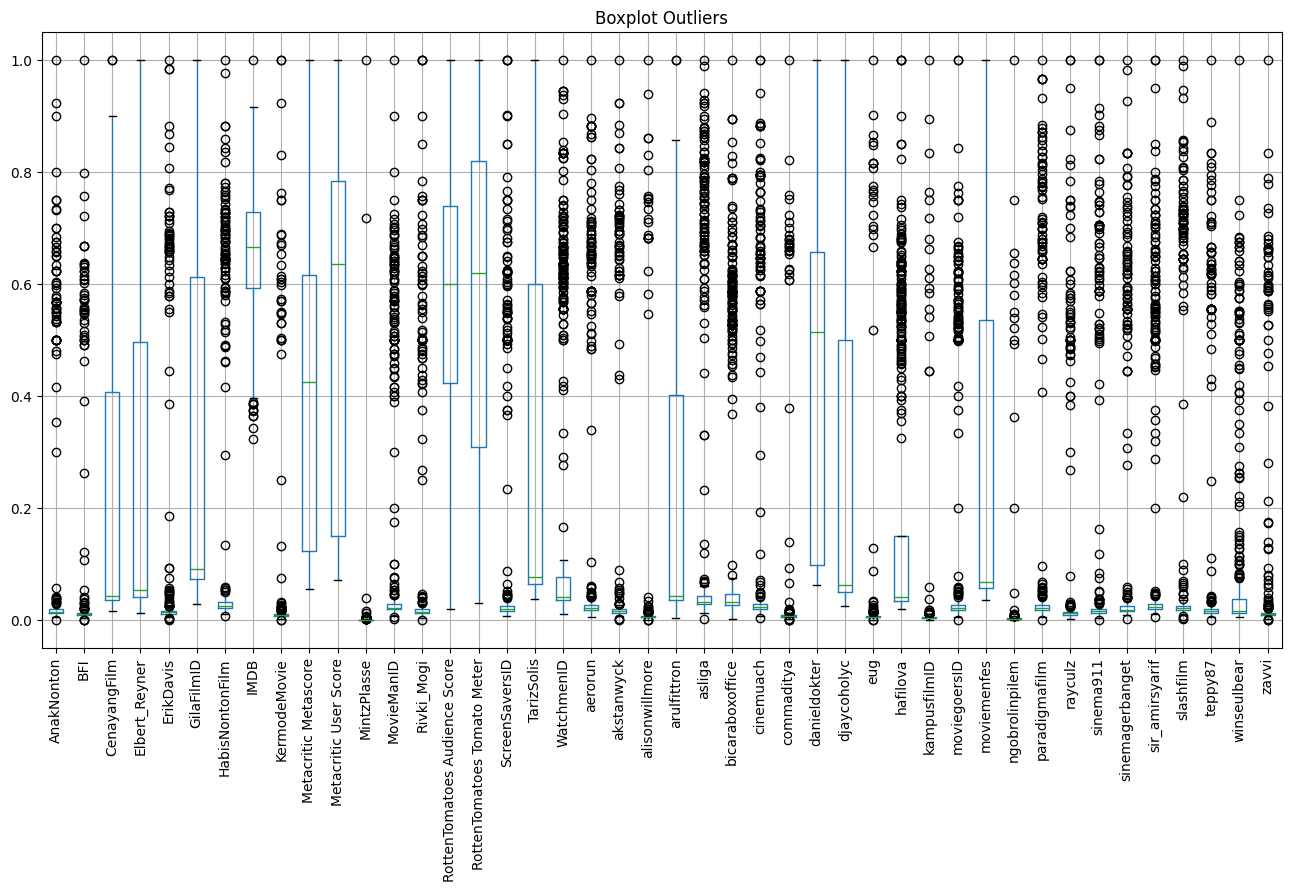

In [ ]:
df_prepro = df.copy()
df_prepro = df_prepro.drop(columns=['nama film'])

plt.figure(figsize=(16, 8))
df_prepro.boxplot(rot=90)
plt.title('Boxplot Outliers')
plt.show()

## ***Convert to 0-1***

In [ ]:
df_klasifikasi = df.copy()

for index, row in df_klasifikasi.iterrows():
    for column in df_klasifikasi.columns[1:]:
        if row[column] > 0.5:
            df_klasifikasi.at[index, column] = 1
        else:
            df_klasifikasi.at[index, column] = 0

df_klasifikasi.to_excel("/content/drive/MyDrive/Tes TA/Klasifikasi_RNN_LRF.xlsx")
df_klasifikasi

nama film  AnakNonton  BFI  CenayangFilm  Elbert_Reyner  \
0            14 Cameras         0.0  0.0           0.0            0.0   
1              17 Again         0.0  0.0           0.0            0.0   
2                   1BR         0.0  0.0           0.0            0.0   
3        3 Days to Kill         1.0  0.0           0.0            0.0   
4              3 Idiots         0.0  0.0           0.0            0.0   
..                  ...         ...  ...           ...            ...   
547          You People         0.0  1.0           0.0            0.0   
548         Young Adult         1.0  0.0           1.0            1.0   
549  Your Place or Mine         0.0  1.0           0.0            0.0   
550              Zodiac         0.0  0.0           1.0            0.0   
551          Zombieland         0.0  0.0           1.0            1.0   

     ErikDavis  GilaFilmID  HabisNontonFilm  IMDB  KermodeMovie  ...  \
0          0.0         0.0              0.0   0.0           0.0  ...   
1          0.0         0.0              0.0   1.0           0.0  ...   
2          0.0         0.0              0.0   1.0           0.0  ...   
3          0.0         1.0              0.0   1.0           0.0  ...   
4          0.0         0.0              0.0   1.0           0.0  ...   
..         ...         ...              ...   ...           ...  ...   
547        1.0         0.0              1.0   1.0           1.0  ...   
548        0.0         1.0              1.0   1.0           0.0  ...   
549        1.0         0.0              0.0   1.0           1.0  ...   
550        0.0         1.0              0.0   1.0           0.0  ...   
551        0.0         1.0              0.0   1.0           0.0  ...   

     ngobrolinpilem  paradigmafilm  rayculz  sinema911  sinemagerbanget  \
0               0.0            0.0      0.0        0.0              0.0   
1               0.0            0.0      0.0        0.0              0.0   
2               0.0            0.0      0.0        0.0              0.0   
3               0.0            0.0      0.0        0.0              0.0   
4               0.0            0.0      0.0        0.0              0.0   
..              ...            ...      ...        ...              ...   
547             0.0            0.0      0.0        0.0              0.0   
548             0.0            0.0      0.0        0.0              0.0   
549             0.0            0.0      0.0        1.0              0.0   
550             0.0            0.0      0.0        0.0              0.0   
551             0.0            0.0      1.0        0.0              0.0   

     sir_amirsyarif  slashfilm  teppy87  winseulbear  zavvi  
0               0.0        0.0      0.0          0.0    0.0  
1               0.0        0.0      0.0          0.0    0.0  
2               0.0        0.0      0.0          0.0    0.0  
3               0.0        0.0      0.0          0.0    0.0  
4               0.0        0.0      0.0          0.0    0.0  
..              ...        ...      ...          ...    ...  
547             0.0        1.0      1.0          0.0    1.0  
548             1.0        0.0      0.0          0.0    0.0  
549             0.0        1.0      1.0          0.0    0.0  
550             0.0        0.0      0.0          1.0    0.0  
551             1.0        0.0      1.0          0.0    0.0  

[552 rows x 45 columns]

## ***CALCULATE THE VALUES 0 AND 1***

In [ ]:
# mencari jumlah nilai 0 dan 1
nilai1 = 0
nilai0 = 0

for i in df_klasifikasi.index:
    for j in df_klasifikasi.columns:
        if df_klasifikasi.loc[i][j] == 1:
            nilai1 += 1
        else:
            nilai0 += 1

print("Total Rating yang bernilai 0: ", nilai0)
print("Total Rating yang bernilai 1: ", nilai1)

Total Rating yang bernilai 0:  20120
Total Rating yang bernilai 1:  4720


# ***DATA DISTRIBUTION***

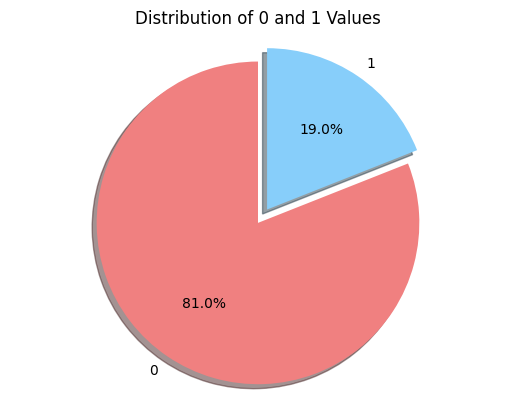

In [ ]:
labels = '0', '1'
sizes = [nilai0, nilai1]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)

# pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.title("Distribution of 0 and 1 Values")
plt.show()

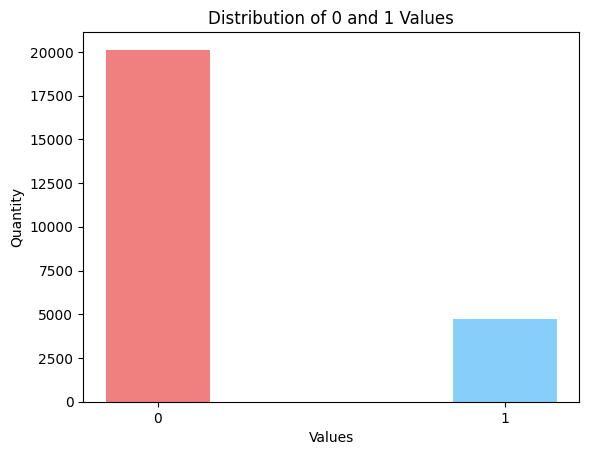

In [ ]:
labels = ['0', '1']
sizes = [nilai0, nilai1]
colors = ['lightcoral', 'lightskyblue']

plt.bar(labels, sizes, color=colors, width=0.3)
plt.title("Distribution of 0 and 1 Values")
plt.xlabel("Values")
plt.ylabel("Quantity")
plt.show()

# **KLASIFIKASI RNN**

In [ ]:
df = df_klasifikasi.copy()
df.drop(df.columns[0], axis=1, inplace=True)

In [ ]:
df.columns

Index(['AnakNonton', 'BFI', 'CenayangFilm', 'Elbert_Reyner', 'ErikDavis',
       'GilaFilmID', 'HabisNontonFilm', 'IMDB', 'KermodeMovie',
       'Metacritic Metascore', 'Metacritic User Score', 'MintzPlasse',
       'MovieManID', 'Rivki_Mogi', 'RottenTomatoes Audience Score',
       'RottenTomatoes Tomato Meter', 'ScreenSaversID', 'TarizSolis',
       'WatchmenID', 'aerorun', 'akstanwyck', 'alisonwillmore', 'arulfittron',
       'asliga', 'bicaraboxoffice', 'cinemuach', 'commaditya', 'danieldokter',
       'djaycoholyc', 'eug', 'hafilova', 'kampusfilmID', 'moviegoersID',
       'moviemenfes', 'ngobrolinpilem', 'paradigmafilm', 'rayculz',
       'sinema911', 'sinemagerbanget', 'sir_amirsyarif', 'slashfilm',
       'teppy87', 'winseulbear', 'zavvi'],
      dtype='object')

In [ ]:
len(df.columns)

44

# ***FIND BEST LEARNING RATE***

In [ ]:
class lr_finder():

    def __init__(self,model,begin_lr=1e-10, end_lr=1e0, num_epochs=50, period=5):
        ''' lr_finder menghasilkan learning schedules untuk menemukan
        upper and lower bounds dari best learning rate, dan
        cyclical learning rate schedule berdasarkan bounds tersebut'''

        # a cyclical learning rate schedule based on those bounds
        self.period = period
        # make a copy of the model to train through a sweep of learning rates
        self.model = keras.models.clone_model(model)

        # define bounds to sweep through
        self.begin_lr = np.log(begin_lr)/np.log(10)
        self.end_lr = np.log(end_lr)/np.log(10)
        self.num_epochs = num_epochs
        self.lower_bound = begin_lr
        self.upper_bound = 1e0 #end_lr

        # learning rates to schedules
        self.lr = np.logspace(self.begin_lr,self.end_lr,self.num_epochs)
        self.clr = np.logspace(np.log(self.lower_bound)/np.log(10), np.log(self.upper_bound)/np.log(10), self.period)

    def reset_model(self, model):
        # reset the model to find new lr bounds
        self.begin_lr = -10
        self.end_lr = 0
        self.lr = np.logspace(self.begin_lr,self.end_lr,self.num_epochs)
        self.model = keras.models.clone_model(model)

    def lr_schedule(self,epoch):
        # return lr according to a sweeping schedule
        if epoch < self.num_epochs:
            return self.lr[epoch]
        else:
            return self.lr[0]

    def clr_schedule(self,epoch,period=5):
        # return lr according to cyclical learning rate schedule
        my_epoch = int(epoch % self.period)
        return self.clr[my_epoch]

    def lr_vector(self,epochs):
        # return the vector of learning rates used in a schedule
        lrv = []
        for ck in range(epochs):
            lrv.append(self.lr_schedule(ck))
        return lrv

    def lr_plot(self,history_loss,please_plot=True):
        # plot the lr sweep results and set upper and lower bounds on learning rate
        x_axis = self.lr_vector(self.num_epochs)
        y_axis = history_loss

        d_loss = []
        for cc in range(1,len(y_axis)):
            if cc == 1:
                d_loss.append(y_axis[cc] - y_axis[cc-1])
            else:
                d_loss.append(0.8*(y_axis[cc] - y_axis[cc-1])+0.2*(y_axis[cc-1] - y_axis[cc-2]))
        d_loss = np.array(d_loss)

        self.lower_bound = x_axis[d_loss.argmin()]
        self.upper_bound = x_axis[np.array(y_axis).argmin()]

        # pastikan urutan benar
        if self.lower_bound > self.upper_bound:
            self.lower_bound, self.upper_bound = self.upper_bound, self.lower_bound

        self.clr = np.logspace(np.log(self.lower_bound)/np.log(10), np.log(self.upper_bound)/np.log(10), self.period)

        print("Recommended learning rate: more than %.2e, less than %.2e "%(self.lower_bound, self.upper_bound))
        if(please_plot):
            plt.figure(figsize=(10, 6))
            plt.loglog(x_axis,y_axis)
            plt.xlabel('Learning Rate')
            plt.ylabel('Loss')
            #plt.title('Loss / learning rate progression')
            plt.title(' ')
            plt.grid(True)
            plt.show()

    # def get_lr(self,epoch):
    #     # return the geometric mean of the upper and lower bound learning rates
    #     return (self.lower_bound *self.upper_bound)**(1/2)

    def get_lr(self):
        # return the geometric mean of the upper and lower bound learning rates
        return (self.lower_bound *self.upper_bound)**(1/2)

    def accuracy_plot(self, history_acc, please_plot=True):
        # accuracy
        x_axis = self.lr_vector(len(history_acc))
        y_axis = history_acc

        plt.figure(figsize=(10, 6))
        plt.semilogx(x_axis, y_axis)
        plt.xlabel('Learning Rate')
        plt.ylabel('Accuracy')
        #plt.title('Accuracy / learning rate progression')
        plt.title(' ')
        plt.grid(True)
        if please_plot:
            plt.show()

# **Adam (80 : 20)**


[Model ke-0]
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.3033 - loss: 0.9823 - learning_rate: 1.0000e-10
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3004 - loss: 0.9802 - learning_rate: 1.5999e-10
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.3016 - loss: 0.9813 - learning_rate: 2.5595e-10
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.3071 - loss: 0.9770 - learning_rate: 4.0949e-10
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.3089 - loss: 0.9728 - learning_rate: 6.5513e-10
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.2982 - loss: 0.9823 - learning_rate: 1.0481e-09
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.3050 - loss: 0.9801 - learning_rate: 1.6768e-09
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.2998 - loss: 0.9819 - learning_rate: 2.6827e-09
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.3096 - loss: 0.9752 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - accuracy: 0.6442 - loss: 0.6549 - learning_rate: 1.0000e-10
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - accuracy: 0.6505 - loss: 0.6523 - learning_rate: 1.5999e-10
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.6458 - loss: 0.6558 - learning_rate: 2.5595e-10
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - accuracy: 0.6478 - loss: 0.6527 - learning_rate: 4.0949e-10
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.6548 - loss: 0.6494 - learning_rate: 6.5513e-10
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.6474 - loss: 0.6547 - learning_rate: 1.0481e-09
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.6518 - loss: 0.6535 - learning_rate: 1.6768e-09
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.6498 - loss: 0.6520 - learning_rate: 2.6827e-09
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.6476 - loss: 0.6540 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.6002 - loss: 0.6862 - learning_rate: 1.0000e-10
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.6091 - loss: 0.6838 - learning_rate: 1.5999e-10
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.5981 - loss: 0.6888 - learning_rate: 2.5595e-10
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.6044 - loss: 0.6866 - learning_rate: 4.0949e-10
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.6045 - loss: 0.6821 - learning_rate: 6.5513e-10
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.5999 - loss: 0.6855 - learning_rate: 1.0481e-09
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.6012 - loss: 0.6866 - learning_rate: 1.6768e-09
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.6048 - loss: 0.6835 - learning_rate: 2.6827e-09
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.6064 - loss: 0.6850 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.4831 - loss: 0.7558 - learning_rate: 1.0000e-10
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.4822 - loss: 0.7550 - learning_rate: 1.5999e-10
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.4806 - loss: 0.7579 - learning_rate: 2.5595e-10
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.4808 - loss: 0.7556 - learning_rate: 4.0949e-10
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.4837 - loss: 0.7544 - learning_rate: 6.5513e-10
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.4777 - loss: 0.7566 - learning_rate: 1.0481e-09
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.4780 - loss: 0.7565 - learning_rate: 1.6768e-09
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.4803 - loss: 0.7540 - learning_rate: 2.6827e-09
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.4821 - loss: 0.7574 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.5897 - loss: 0.7016 - learning_rate: 1.0000e-10
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.5872 - loss: 0.7007 - learning_rate: 1.5999e-10
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.5917 - loss: 0.6989 - learning_rate: 2.5595e-10
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.5869 - loss: 0.7014 - learning_rate: 4.0949e-10
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.5894 - loss: 0.7016 - learning_rate: 6.5513e-10
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.5845 - loss: 0.7033 - learning_rate: 1.0481e-09
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.5945 - loss: 0.6994 - learning_rate: 1.6768e-09
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.5864 - loss: 0.7014 - learning_rate: 2.6827e-09
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.5884 - loss: 0.7004 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.5114 - loss: 0.7416 - learning_rate: 1.0000e-10
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.5107 - loss: 0.7451 - learning_rate: 1.5999e-10
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.5153 - loss: 0.7423 - learning_rate: 2.5595e-10
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5122 - loss: 0.7448 - learning_rate: 4.0949e-10
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.5168 - loss: 0.7463 - learning_rate: 6.5513e-10
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5084 - loss: 0.7450 - learning_rate: 1.0481e-09
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5118 - loss: 0.7449 - learning_rate: 1.6768e-09
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.5115 - loss: 0.7442 - learning_rate: 2.6827e-09
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.5082 - loss: 0.7434 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.6324 - loss: 0.6713 - learning_rate: 1.0000e-10
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.6449 - loss: 0.6636 - learning_rate: 1.5999e-10
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.6480 - loss: 0.6630 - learning_rate: 2.5595e-10
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.6512 - loss: 0.6607 - learning_rate: 4.0949e-10
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.6393 - loss: 0.6648 - learning_rate: 6.5513e-10
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.6427 - loss: 0.6664 - learning_rate: 1.0481e-09
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.6478 - loss: 0.6616 - learning_rate: 1.6768e-09
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.6439 - loss: 0.6650 - learning_rate: 2.6827e-09
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.6406 - loss: 0.6652 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.4723 - loss: 0.7002 - learning_rate: 1.0000e-10
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.4692 - loss: 0.7001 - learning_rate: 1.5999e-10
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.4673 - loss: 0.7020 - learning_rate: 2.5595e-10
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.4842 - loss: 0.6998 - learning_rate: 4.0949e-10
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5245 - loss: 0.6996 - learning_rate: 6.5513e-10
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.5420 - loss: 0.6996 - learning_rate: 1.0481e-09
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5583 - loss: 0.6997 - learning_rate: 1.6768e-09
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5756 - loss: 0.7013 - learning_rate: 2.6827e-09
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.5749 - loss: 0.6994 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - accuracy: 0.5591 - loss: 0.7185 - learning_rate: 1.0000e-10
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.5605 - loss: 0.7178 - learning_rate: 1.5999e-10
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.5596 - loss: 0.7173 - learning_rate: 2.5595e-10
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.5614 - loss: 0.7173 - learning_rate: 4.0949e-10
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.5603 - loss: 0.7166 - learning_rate: 6.5513e-10
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.5581 - loss: 0.7165 - learning_rate: 1.0481e-09
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - accuracy: 0.5574 - loss: 0.7175 - learning_rate: 1.6768e-09
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - accuracy: 0.5547 - loss: 0.7191 - learning_rate: 2.6827e-09
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.5622 - loss: 0.7175 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.5105 - loss: 0.7270 - learning_rate: 1.0000e-10
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5142 - loss: 0.7244 - learning_rate: 1.5999e-10
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5135 - loss: 0.7247 - learning_rate: 2.5595e-10
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5181 - loss: 0.7239 - learning_rate: 4.0949e-10
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5095 - loss: 0.7251 - learning_rate: 6.5513e-10
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5104 - loss: 0.7251 - learning_rate: 1.0481e-09
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5122 - loss: 0.7250 - learning_rate: 1.6768e-09
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5135 - loss: 0.7232 - learning_rate: 2.6827e-09
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5105 - loss: 0.7254 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.4931 - loss: 0.7045 - learning_rate: 1.0000e-10
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.4909 - loss: 0.7048 - learning_rate: 1.5999e-10
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.4897 - loss: 0.7068 - learning_rate: 2.5595e-10
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.4950 - loss: 0.7038 - learning_rate: 4.0949e-10
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.4999 - loss: 0.7077 - learning_rate: 6.5513e-10
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5122 - loss: 0.7077 - learning_rate: 1.0481e-09
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.5285 - loss: 0.7054 - learning_rate: 1.6768e-09
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5308 - loss: 0.7053 - learning_rate: 2.6827e-09
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5375 - loss: 0.7055 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.6103 - loss: 0.6865 - learning_rate: 1.0000e-10
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.6083 - loss: 0.6876 - learning_rate: 1.5999e-10
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.6105 - loss: 0.6868 - learning_rate: 2.5595e-10
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - accuracy: 0.6114 - loss: 0.6870 - learning_rate: 4.0949e-10
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - accuracy: 0.6153 - loss: 0.6873 - learning_rate: 6.5513e-10
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.6182 - loss: 0.6858 - learning_rate: 1.0481e-09
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.6120 - loss: 0.6865 - learning_rate: 1.6768e-09
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.6102 - loss: 0.6859 - learning_rate: 2.6827e-09
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.6095 - loss: 0.6859 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - accuracy: 0.7034 - loss: 0.6285 - learning_rate: 1.0000e-10
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.6959 - loss: 0.6317 - learning_rate: 1.5999e-10
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.7090 - loss: 0.6245 - learning_rate: 2.5595e-10
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.6959 - loss: 0.6342 - learning_rate: 4.0949e-10
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.7011 - loss: 0.6256 - learning_rate: 6.5513e-10
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.7020 - loss: 0.6277 - learning_rate: 1.0481e-09
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.6993 - loss: 0.6274 - learning_rate: 1.6768e-09
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.6949 - loss: 0.6303 - learning_rate: 2.6827e-09
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.6993 - loss: 0.6309 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.5947 - loss: 0.6971 - learning_rate: 1.0000e-10
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5932 - loss: 0.6977 - learning_rate: 1.5999e-10
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.5916 - loss: 0.6976 - learning_rate: 2.5595e-10
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5938 - loss: 0.6957 - learning_rate: 4.0949e-10
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5873 - loss: 0.6981 - learning_rate: 6.5513e-10
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.5946 - loss: 0.6977 - learning_rate: 1.0481e-09
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5929 - loss: 0.6962 - learning_rate: 1.6768e-09
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5903 - loss: 0.6982 - learning_rate: 2.6827e-09
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5944 - loss: 0.6968 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - accuracy: 0.4547 - loss: 0.7374 - learning_rate: 1.0000e-10
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.4527 - loss: 0.7380 - learning_rate: 1.5999e-10
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - accuracy: 0.4528 - loss: 0.7383 - learning_rate: 2.5595e-10
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.4406 - loss: 0.7394 - learning_rate: 4.0949e-10
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - accuracy: 0.4474 - loss: 0.7367 - learning_rate: 6.5513e-10
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.4459 - loss: 0.7417 - learning_rate: 1.0481e-09
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.4666 - loss: 0.7390 - learning_rate: 1.6768e-09
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.4651 - loss: 0.7398 - learning_rate: 2.6827e-09
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - accuracy: 0.4648 - loss: 0.7430 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - accuracy: 0.4855 - loss: 0.7395 - learning_rate: 1.0000e-10
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.4858 - loss: 0.7389 - learning_rate: 1.5999e-10
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.4840 - loss: 0.7375 - learning_rate: 2.5595e-10
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.4757 - loss: 0.7391 - learning_rate: 4.0949e-10
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.4777 - loss: 0.7404 - learning_rate: 6.5513e-10
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.4791 - loss: 0.7376 - learning_rate: 1.0481e-09
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.4817 - loss: 0.7380 - learning_rate: 1.6768e-09
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.4881 - loss: 0.7383 - learning_rate: 2.6827e-09
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.4861 - loss: 0.7391 - learning_rate: 4.2919e-09
E

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.5886 - loss: 0.6979 - learning_rate: 1.0000e-10
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5858 - loss: 0.6989 - learning_rate: 1.5999e-10
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.5863 - loss: 0.6987 - learning_rate: 2.5595e-10
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5899 - loss: 0.7008 - learning_rate: 4.0949e-10
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5876 - loss: 0.6994 - learning_rate: 6.5513e-10
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5861 - loss: 0.6993 - learning_rate: 1.0481e-09
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5855 - loss: 0.6996 - learning_rate: 1.6768e-09
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5887 - loss: 0.6987 - learning_rate: 2.6827e-09
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5882 - loss: 0.6975 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 78ms/step - accuracy: 0.5519 - loss: 0.7099 - learning_rate: 1.0000e-10
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - accuracy: 0.5550 - loss: 0.7077 - learning_rate: 1.5999e-10
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5554 - loss: 0.7070 - learning_rate: 2.5595e-10
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5537 - loss: 0.7089 - learning_rate: 4.0949e-10
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5609 - loss: 0.7068 - learning_rate: 6.5513e-10
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5561 - loss: 0.7074 - learning_rate: 1.0481e-09
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5427 - loss: 0.7143 - learning_rate: 1.6768e-09
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.5448 - loss: 0.7114 - learning_rate: 2.6827e-09
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5603 - loss: 0.7050 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.5534 - loss: 0.7159 - learning_rate: 1.0000e-10
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5547 - loss: 0.7153 - learning_rate: 1.5999e-10
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5542 - loss: 0.7152 - learning_rate: 2.5595e-10
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5495 - loss: 0.7169 - learning_rate: 4.0949e-10
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.5609 - loss: 0.7112 - learning_rate: 6.5513e-10
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5577 - loss: 0.7138 - learning_rate: 1.0481e-09
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.5587 - loss: 0.7129 - learning_rate: 1.6768e-09
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.5546 - loss: 0.7157 - learning_rate: 2.6827e-09
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.5505 - loss: 0.7161 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - accuracy: 0.6098 - loss: 0.6920 - learning_rate: 1.0000e-10
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - accuracy: 0.6063 - loss: 0.6938 - learning_rate: 1.5999e-10
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.6114 - loss: 0.6910 - learning_rate: 2.5595e-10
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - accuracy: 0.6071 - loss: 0.6916 - learning_rate: 4.0949e-10
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.6088 - loss: 0.6916 - learning_rate: 6.5513e-10
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - accuracy: 0.6055 - loss: 0.6927 - learning_rate: 1.0481e-09
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.6157 - loss: 0.6889 - learning_rate: 1.6768e-09
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.6096 - loss: 0.6902 - learning_rate: 2.6827e-09
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.6077 - loss: 0.6932 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.5073 - loss: 0.7397 - learning_rate: 1.0000e-10
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5038 - loss: 0.7393 - learning_rate: 1.5999e-10
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5062 - loss: 0.7371 - learning_rate: 2.5595e-10
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5090 - loss: 0.7384 - learning_rate: 4.0949e-10
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5066 - loss: 0.7378 - learning_rate: 6.5513e-10
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5047 - loss: 0.7382 - learning_rate: 1.0481e-09
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5120 - loss: 0.7400 - learning_rate: 1.6768e-09
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5045 - loss: 0.7408 - learning_rate: 2.6827e-09
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5064 - loss: 0.7402 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.2949 - loss: 0.9155 - learning_rate: 1.0000e-10
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.2954 - loss: 0.9180 - learning_rate: 1.5999e-10
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.2984 - loss: 0.9175 - learning_rate: 2.5595e-10
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.2942 - loss: 0.9207 - learning_rate: 4.0949e-10
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.3014 - loss: 0.9179 - learning_rate: 6.5513e-10
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.2989 - loss: 0.9148 - learning_rate: 1.0481e-09
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.2996 - loss: 0.9176 - learning_rate: 1.6768e-09
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.2943 - loss: 0.9173 - learning_rate: 2.6827e-09
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.2948 - loss: 0.9195 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - accuracy: 0.4946 - loss: 0.7659 - learning_rate: 1.0000e-10
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - accuracy: 0.4943 - loss: 0.7679 - learning_rate: 1.5999e-10
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.4970 - loss: 0.7673 - learning_rate: 2.5595e-10
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.4915 - loss: 0.7699 - learning_rate: 4.0949e-10
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.4948 - loss: 0.7668 - learning_rate: 6.5513e-10
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.4961 - loss: 0.7652 - learning_rate: 1.0481e-09
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.4925 - loss: 0.7665 - learning_rate: 1.6768e-09
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.4934 - loss: 0.7680 - learning_rate: 2.6827e-09
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.4984 - loss: 0.7654 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.4983 - loss: 0.7475 - learning_rate: 1.0000e-10
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.4995 - loss: 0.7491 - learning_rate: 1.5999e-10
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5009 - loss: 0.7484 - learning_rate: 2.5595e-10
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.4949 - loss: 0.7521 - learning_rate: 4.0949e-10
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.4996 - loss: 0.7484 - learning_rate: 6.5513e-10
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5062 - loss: 0.7470 - learning_rate: 1.0481e-09
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.4984 - loss: 0.7483 - learning_rate: 1.6768e-09
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5025 - loss: 0.7468 - learning_rate: 2.6827e-09
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.4969 - loss: 0.7509 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.5461 - loss: 0.7204 - learning_rate: 1.0000e-10
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5495 - loss: 0.7201 - learning_rate: 1.5999e-10
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5569 - loss: 0.7202 - learning_rate: 2.5595e-10
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5491 - loss: 0.7195 - learning_rate: 4.0949e-10
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.5487 - loss: 0.7219 - learning_rate: 6.5513e-10
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.5501 - loss: 0.7217 - learning_rate: 1.0481e-09
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.5492 - loss: 0.7200 - learning_rate: 1.6768e-09
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 0.5461 - loss: 0.7213 - learning_rate: 2.6827e-09
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - accuracy: 0.5523 - loss: 0.7197 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 74ms/step - accuracy: 0.4075 - loss: 0.8000 - learning_rate: 1.0000e-10
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.4075 - loss: 0.8000 - learning_rate: 1.5999e-10
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.4199 - loss: 0.7947 - learning_rate: 2.5595e-10
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.4177 - loss: 0.7977 - learning_rate: 4.0949e-10
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.4148 - loss: 0.8005 - learning_rate: 6.5513e-10
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.4090 - loss: 0.8006 - learning_rate: 1.0481e-09
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.4094 - loss: 0.7985 - learning_rate: 1.6768e-09
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.4073 - loss: 0.8017 - learning_rate: 2.6827e-09
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.4141 - loss: 0.7991 - learning_rate: 4.2919e-09
E

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.4430 - loss: 0.7849 - learning_rate: 1.0000e-10
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.4410 - loss: 0.7847 - learning_rate: 1.5999e-10
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.4403 - loss: 0.7861 - learning_rate: 2.5595e-10
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.4390 - loss: 0.7851 - learning_rate: 4.0949e-10
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.4413 - loss: 0.7845 - learning_rate: 6.5513e-10
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.4412 - loss: 0.7856 - learning_rate: 1.0481e-09
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.4424 - loss: 0.7885 - learning_rate: 1.6768e-09
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.4402 - loss: 0.7880 - learning_rate: 2.6827e-09
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.4405 - loss: 0.7867 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.5202 - loss: 0.7192 - learning_rate: 1.0000e-10
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5177 - loss: 0.7192 - learning_rate: 1.5999e-10
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5159 - loss: 0.7187 - learning_rate: 2.5595e-10
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5206 - loss: 0.7197 - learning_rate: 4.0949e-10
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5216 - loss: 0.7202 - learning_rate: 6.5513e-10
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.5152 - loss: 0.7185 - learning_rate: 1.0481e-09
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - accuracy: 0.5182 - loss: 0.7194 - learning_rate: 1.6768e-09
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.5191 - loss: 0.7182 - learning_rate: 2.6827e-09
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - accuracy: 0.5180 - loss: 0.7174 - learning_rate: 4.2919e-09
Epoch 10/50

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - accuracy: 0.5201 - loss: 0.7413 - learning_rate: 1.0000e-10
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.5243 - loss: 0.7381 - learning_rate: 1.5999e-10
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.5242 - loss: 0.7382 - learning_rate: 2.5595e-10
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.5253 - loss: 0.7385 - learning_rate: 4.0949e-10
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5250 - loss: 0.7392 - learning_rate: 6.5513e-10
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.5208 - loss: 0.7401 - learning_rate: 1.0481e-09
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.5256 - loss: 0.7386 - learning_rate: 1.6768e-09
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.5274 - loss: 0.7408 - learning_rate: 2.6827e-09
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.5300 - loss: 0.7394 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.3800 - loss: 0.8383 - learning_rate: 1.0000e-10
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.3819 - loss: 0.8404 - learning_rate: 1.5999e-10
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.3802 - loss: 0.8378 - learning_rate: 2.5595e-10
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.3817 - loss: 0.8391 - learning_rate: 4.0949e-10
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.3761 - loss: 0.8428 - learning_rate: 6.5513e-10
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.3796 - loss: 0.8409 - learning_rate: 1.0481e-09
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.3781 - loss: 0.8432 - learning_rate: 1.6768e-09
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.3789 - loss: 0.8410 - learning_rate: 2.6827e-09
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.3779 - loss: 0.8414 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 85ms/step - accuracy: 0.5615 - loss: 0.7217 - learning_rate: 1.0000e-10
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - accuracy: 0.5659 - loss: 0.7228 - learning_rate: 1.5999e-10
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.5581 - loss: 0.7230 - learning_rate: 2.5595e-10
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - accuracy: 0.5615 - loss: 0.7225 - learning_rate: 4.0949e-10
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - accuracy: 0.5620 - loss: 0.7236 - learning_rate: 6.5513e-10
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5613 - loss: 0.7238 - learning_rate: 1.0481e-09
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.5589 - loss: 0.7242 - learning_rate: 1.6768e-09
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5616 - loss: 0.7224 - learning_rate: 2.6827e-09
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5552 - loss: 0.7234 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - accuracy: 0.7698 - loss: 0.5715 - learning_rate: 1.0000e-10
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.7687 - loss: 0.5716 - learning_rate: 1.5999e-10
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.7641 - loss: 0.5754 - learning_rate: 2.5595e-10
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.7706 - loss: 0.5703 - learning_rate: 4.0949e-10
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.7684 - loss: 0.5754 - learning_rate: 6.5513e-10
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7674 - loss: 0.5714 - learning_rate: 1.0481e-09
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.7704 - loss: 0.5705 - learning_rate: 1.6768e-09
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.7714 - loss: 0.5703 - learning_rate: 2.6827e-09
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.7644 - loss: 0.5770 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 0.5208 - loss: 0.7386 - learning_rate: 1.0000e-10
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5187 - loss: 0.7397 - learning_rate: 1.5999e-10
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5223 - loss: 0.7393 - learning_rate: 2.5595e-10
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5181 - loss: 0.7386 - learning_rate: 4.0949e-10
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5193 - loss: 0.7383 - learning_rate: 6.5513e-10
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5208 - loss: 0.7359 - learning_rate: 1.0481e-09
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5241 - loss: 0.7378 - learning_rate: 1.6768e-09
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5195 - loss: 0.7384 - learning_rate: 2.6827e-09
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.5241 - loss: 0.7387 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - accuracy: 0.4414 - loss: 0.8134 - learning_rate: 1.0000e-10
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 0.4484 - loss: 0.8076 - learning_rate: 1.5999e-10
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - accuracy: 0.4478 - loss: 0.8088 - learning_rate: 2.5595e-10
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - accuracy: 0.4510 - loss: 0.8056 - learning_rate: 4.0949e-10
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.4524 - loss: 0.8054 - learning_rate: 6.5513e-10
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.4436 - loss: 0.8115 - learning_rate: 1.0481e-09
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.4522 - loss: 0.8077 - learning_rate: 1.6768e-09
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.4482 - loss: 0.8037 - learning_rate: 2.6827e-09
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.4454 - loss: 0.8082 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.7037 - loss: 0.6209 - learning_rate: 1.0000e-10
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.7035 - loss: 0.6218 - learning_rate: 1.5999e-10
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.7063 - loss: 0.6210 - learning_rate: 2.5595e-10
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.7072 - loss: 0.6203 - learning_rate: 4.0949e-10
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.7046 - loss: 0.6216 - learning_rate: 6.5513e-10
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.7067 - loss: 0.6199 - learning_rate: 1.0481e-09
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.7026 - loss: 0.6217 - learning_rate: 1.6768e-09
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.7044 - loss: 0.6210 - learning_rate: 2.6827e-09
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7052 - loss: 0.6201 - learning_rate: 4.2919e-09
E

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - accuracy: 0.7181 - loss: 0.6201 - learning_rate: 1.0000e-10
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7184 - loss: 0.6204 - learning_rate: 1.5999e-10
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.7137 - loss: 0.6213 - learning_rate: 2.5595e-10
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7166 - loss: 0.6208 - learning_rate: 4.0949e-10
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.7191 - loss: 0.6186 - learning_rate: 6.5513e-10
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.7135 - loss: 0.6211 - learning_rate: 1.0481e-09
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.7272 - loss: 0.6141 - learning_rate: 1.6768e-09
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.7119 - loss: 0.6221 - learning_rate: 2.6827e-09
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7193 - loss: 0.6187 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - accuracy: 0.4938 - loss: 0.7786 - learning_rate: 1.0000e-10
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.4949 - loss: 0.7790 - learning_rate: 1.5999e-10
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.4926 - loss: 0.7784 - learning_rate: 2.5595e-10
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.4970 - loss: 0.7785 - learning_rate: 4.0949e-10
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.4893 - loss: 0.7791 - learning_rate: 6.5513e-10
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.4948 - loss: 0.7786 - learning_rate: 1.0481e-09
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.4856 - loss: 0.7828 - learning_rate: 1.6768e-09
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.4923 - loss: 0.7820 - learning_rate: 2.6827e-09
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.4904 - loss: 0.7820 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 0.4264 - loss: 0.8144 - learning_rate: 1.0000e-10
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.4215 - loss: 0.8171 - learning_rate: 1.5999e-10
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.4219 - loss: 0.8135 - learning_rate: 2.5595e-10
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.4195 - loss: 0.8167 - learning_rate: 4.0949e-10
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.4227 - loss: 0.8161 - learning_rate: 6.5513e-10
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.4270 - loss: 0.8127 - learning_rate: 1.0481e-09
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.4210 - loss: 0.8153 - learning_rate: 1.6768e-09
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.4260 - loss: 0.8137 - learning_rate: 2.6827e-09
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.4295 - loss: 0.8139 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.4467 - loss: 0.7898 - learning_rate: 1.0000e-10
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.4405 - loss: 0.7955 - learning_rate: 1.5999e-10
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.4440 - loss: 0.7894 - learning_rate: 2.5595e-10
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.4441 - loss: 0.7901 - learning_rate: 4.0949e-10
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - accuracy: 0.4488 - loss: 0.7883 - learning_rate: 6.5513e-10
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.4448 - loss: 0.7925 - learning_rate: 1.0481e-09
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.4454 - loss: 0.7937 - learning_rate: 1.6768e-09
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - accuracy: 0.4438 - loss: 0.7926 - learning_rate: 2.6827e-09
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.4434 - loss: 0.7927 - learning_rate: 4.2919e-09
Epoch 10/50

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - accuracy: 0.6446 - loss: 0.6654 - learning_rate: 1.0000e-10
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - accuracy: 0.6386 - loss: 0.6661 - learning_rate: 1.5999e-10
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.6439 - loss: 0.6646 - learning_rate: 2.5595e-10
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - accuracy: 0.6437 - loss: 0.6632 - learning_rate: 4.0949e-10
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.6514 - loss: 0.6604 - learning_rate: 6.5513e-10
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.6486 - loss: 0.6600 - learning_rate: 1.0481e-09
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.6442 - loss: 0.6649 - learning_rate: 1.6768e-09
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.6456 - loss: 0.6629 - learning_rate: 2.6827e-09
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.6351 - loss: 0.6686 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 0.4715 - loss: 0.7704 - learning_rate: 1.0000e-10
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.4754 - loss: 0.7700 - learning_rate: 1.5999e-10
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.4737 - loss: 0.7689 - learning_rate: 2.5595e-10
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.4690 - loss: 0.7687 - learning_rate: 4.0949e-10
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.4726 - loss: 0.7710 - learning_rate: 6.5513e-10
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.4693 - loss: 0.7710 - learning_rate: 1.0481e-09
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.4748 - loss: 0.7696 - learning_rate: 1.6768e-09
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.4721 - loss: 0.7711 - learning_rate: 2.6827e-09
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.4669 - loss: 0.7720 - learning_rate: 4.2919e-09
E

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.6156 - loss: 0.6908 - learning_rate: 1.0000e-10
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.6112 - loss: 0.6906 - learning_rate: 1.5999e-10
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.6021 - loss: 0.6936 - learning_rate: 2.5595e-10
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.6095 - loss: 0.6895 - learning_rate: 4.0949e-10
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.6113 - loss: 0.6907 - learning_rate: 6.5513e-10
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.6065 - loss: 0.6908 - learning_rate: 1.0481e-09
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.6040 - loss: 0.6895 - learning_rate: 1.6768e-09
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.6094 - loss: 0.6904 - learning_rate: 2.6827e-09
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - accuracy: 0.6083 - loss: 0.6883 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - accuracy: 0.5311 - loss: 0.7629 - learning_rate: 1.0000e-10
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.5250 - loss: 0.7677 - learning_rate: 1.5999e-10
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.5299 - loss: 0.7644 - learning_rate: 2.5595e-10
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5276 - loss: 0.7653 - learning_rate: 4.0949e-10
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.5317 - loss: 0.7636 - learning_rate: 6.5513e-10
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.5151 - loss: 0.7736 - learning_rate: 1.0481e-09
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.5213 - loss: 0.7700 - learning_rate: 1.6768e-09
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5237 - loss: 0.7677 - learning_rate: 2.6827e-09
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5304 - loss: 0.7664 - learning_rate: 4.2919e-09
E

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 0.7433 - loss: 0.6122 - learning_rate: 1.0000e-10
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.7392 - loss: 0.6121 - learning_rate: 1.5999e-10
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.7439 - loss: 0.6140 - learning_rate: 2.5595e-10
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.7439 - loss: 0.6138 - learning_rate: 4.0949e-10
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.7455 - loss: 0.6116 - learning_rate: 6.5513e-10
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.7418 - loss: 0.6106 - learning_rate: 1.0481e-09
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.7453 - loss: 0.6090 - learning_rate: 1.6768e-09
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7403 - loss: 0.6134 - learning_rate: 2.6827e-09
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.7328 - loss: 0.6208 - learning_rate: 4.2919e-09
Epoch 10/50


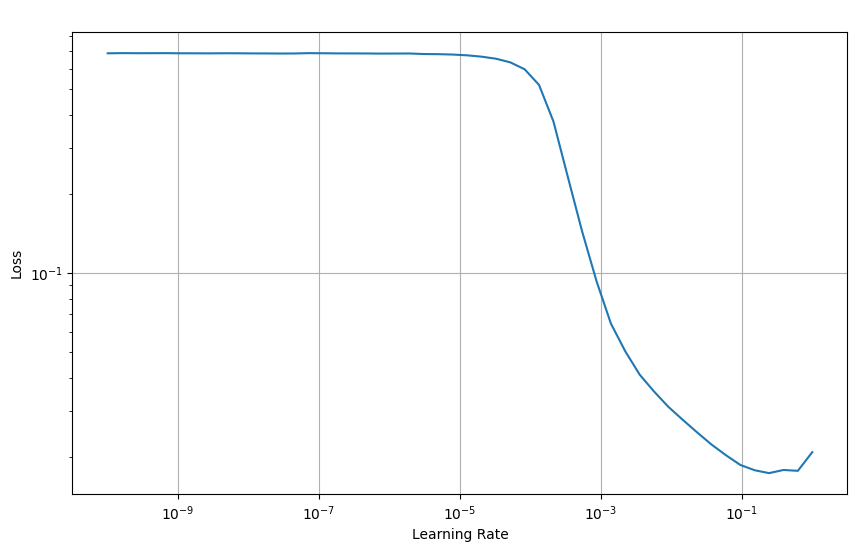

Lower bound: 2.12e-04
Upper bound: 2.44e-01


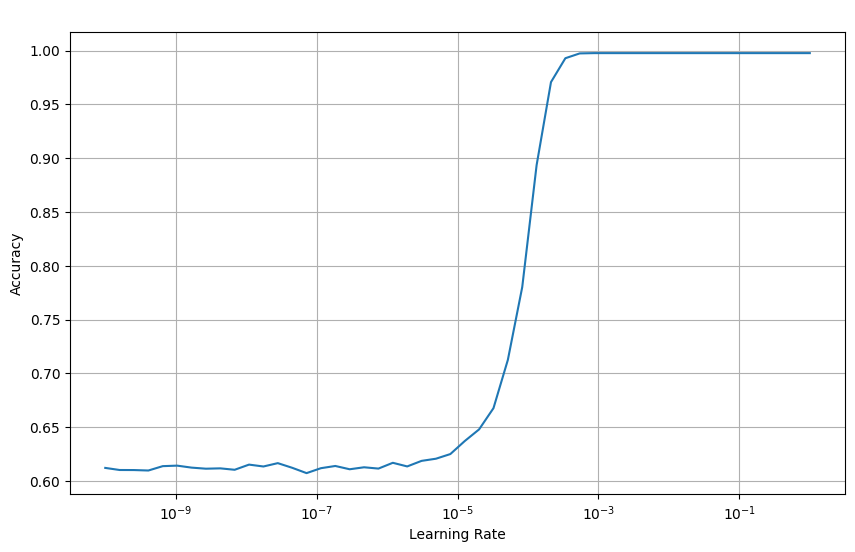

In [ ]:
#Adam
best_lrXXY = []
best_accXXY = []
best_lossXXY = []
best_history = []
best_lrf_object = None
best_model_index = None

sequence_length = 43  # jumlah fitur (user)

for i in range(len(df.columns)):
    print(f"\n[Model ke-{i}]")

    # Siapkan fitur dan label
    feature = df.drop([df.columns[i]], axis=1).values
    label = df.iloc[:, i].values
    label = label.reshape(-1, 1, 1)
    label = np.repeat(label, sequence_length, axis=1)

    X_train, X_test, y_train, y_test = train_test_split(
        feature, label, test_size=0.2, random_state=42
    )

    # Buat model RNN
    modelXXY = tf.keras.Sequential([
        tf.keras.layers.SimpleRNN(64, return_sequences=True, input_shape=(X_train.shape[1], 1)),
        tf.keras.layers.SimpleRNN(64, return_sequences=True),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    # Inisialisasi learning rate finder
    lrf = lr_finder(modelXXY, begin_lr=1e-10, end_lr=1e0, num_epochs=50)
    lr_scheduler = LearningRateScheduler(lrf.lr_schedule)

    # Kompilasi model dengan initial learning rate
    modelXXY.compile(optimizer=Adam(learning_rate=1e-4),  # nilai awal kecil
                     loss='binary_crossentropy',
                     metrics=['accuracy'])

    # Training model (output tetap ditampilkan)
    historyXXY = modelXXY.fit(
        X_train, y_train,
        epochs=50,
        batch_size=128,
        callbacks=[lr_scheduler],
        verbose=1  # tampilkan hasil evaluasi per epoch
    )

    # Update bound (wajib dilakukan sebelum ambil learning rate atau print bound)
    lrf.lr_plot(historyXXY.history['loss'], please_plot=False)
    print(f"[Model ke-{i}]")
    print(f"  ➤ Lower bound: {lrf.lower_bound:.2e}")
    print(f"  ➤ Upper bound: {lrf.upper_bound:.2e}")

    # Simpan metrik terbaik
    max_acc_index = np.argmax(historyXXY.history['accuracy'])
    max_accuracy = historyXXY.history['accuracy'][max_acc_index]
    min_loss = min(historyXXY.history['loss'])
    best_learning_rate = lrf.lr_vector(len(historyXXY.history['accuracy']))[max_acc_index]
    #recommended_lr = lrf.get_lr(max_acc_index)
    recommended_lr = lrf.get_lr()


    best_lrXXY.append(best_learning_rate)
    best_accXXY.append(max_accuracy)
    best_lossXXY.append(min_loss)
    best_history.append(historyXXY.history)

    # Simpan model dan lrf terbaik jika lebih baik dari sebelumnya
    if best_model_index is None or max_accuracy > best_accXXY[best_model_index]:
        best_model_index = i
        best_lrf_object = lrf

# =============================
# Setelah semua model dilatih
# =============================

print(f"\n🔍 Best learning rate based on highest training accuracy:")
print(f"Model ke-{best_model_index}")
print(f"Learning Rate: {best_lrXXY[best_model_index]:.2e}")
print(f"Geometric Mean (Recommended): {best_lrf_object.get_lr():.2e}")
print(f"Accuracy: {best_accXXY[best_model_index]:.4f}")
print(f"Loss: {best_lossXXY[best_model_index]:.4f}")

# Tampilkan plot hanya untuk model terbaik
best_lrf_object.lr_plot(best_history[best_model_index]['loss'])
print(f"Lower bound: {best_lrf_object.lower_bound:.2e}")
print(f"Upper bound: {best_lrf_object.upper_bound:.2e}")
best_lrf_object.accuracy_plot(best_history[best_model_index]['accuracy'])



[Model ke-0]
Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.4206 - loss: 0.7909 - learning_rate: 1.0000e-10
Epoch 2/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.4214 - loss: 0.7889 - learning_rate: 2.2122e-10
Epoch 3/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.4198 - loss: 0.7895 - learning_rate: 4.8939e-10
Epoch 4/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.4208 - loss: 0.7886 - learning_rate: 1.0826e-09
Epoch 5/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.4266 - loss: 0.7901 - learning_rate: 2.3950e-09
Epoch 6/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.4178 - loss: 0.7898 - learning_rate: 5.2983e-09
Epoch 7/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.4257 - loss: 0.7873 - learning_rate: 1.1721e-08
Epoch 8/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.4227 - loss: 0.7893 - learning_rate: 2.5929e-08
Epoch 9/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.4272 - loss: 0.7879 - learning_rate: 5.7362e-08
Epoch 10/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - accuracy: 0.7828 - loss: 0.5670 - learning_rate: 1.0000e-10
Epoch 2/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.7833 - loss: 0.5688 - learning_rate: 2.2122e-10
Epoch 3/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.7838 - loss: 0.5681 - learning_rate: 4.8939e-10
Epoch 4/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.7911 - loss: 0.5655 - learning_rate: 1.0826e-09
Epoch 5/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.7903 - loss: 0.5650 - learning_rate: 2.3950e-09
Epoch 6/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.7765 - loss: 0.5730 - learning_rate: 5.2983e-09
Epoch 7/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.7887 - loss: 0.5666 - learning_rate: 1.1721e-08
Epoch 8/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.7805 - loss: 0.5705 - learning_rate: 2.5929e-08
Epoch 9/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.7789 - loss: 0.5740 - learning_rate: 5.7362e-08
Epoch 10/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.4527 - loss: 0.7743 - learning_rate: 1.0000e-10
Epoch 2/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.4483 - loss: 0.7769 - learning_rate: 2.2122e-10
Epoch 3/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.4509 - loss: 0.7763 - learning_rate: 4.8939e-10
Epoch 4/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.4445 - loss: 0.7773 - learning_rate: 1.0826e-09
Epoch 5/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.4473 - loss: 0.7767 - learning_rate: 2.3950e-09
Epoch 6/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.4489 - loss: 0.7756 - learning_rate: 5.2983e-09
Epoch 7/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.4481 - loss: 0.7767 - learning_rate: 1.1721e-08
Epoch 8/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.4529 - loss: 0.7738 - learning_rate: 2.5929e-08
Epoch 9/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.4506 - loss: 0.7714 - learning_rate: 5.7362e-08
Epoch 10/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.4184 - loss: 0.8235 - learning_rate: 1.0000e-10
Epoch 2/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.4273 - loss: 0.8169 - learning_rate: 2.2122e-10
Epoch 3/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.4231 - loss: 0.8171 - learning_rate: 4.8939e-10
Epoch 4/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.4214 - loss: 0.8193 - learning_rate: 1.0826e-09
Epoch 5/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.4254 - loss: 0.8139 - learning_rate: 2.3950e-09
Epoch 6/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.4315 - loss: 0.8133 - learning_rate: 5.2983e-09
Epoch 7/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.4289 - loss: 0.8155 - learning_rate: 1.1721e-08
Epoch 8/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.4269 - loss: 0.8167 - learning_rate: 2.5929e-08
Epoch 9/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.4272 - loss: 0.8173 - learning_rate: 5.7362e-08
Epoch 10/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.5026 - loss: 0.7506 - learning_rate: 1.0000e-10
Epoch 2/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.5063 - loss: 0.7499 - learning_rate: 2.2122e-10
Epoch 3/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.4989 - loss: 0.7507 - learning_rate: 4.8939e-10
Epoch 4/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.5089 - loss: 0.7481 - learning_rate: 1.0826e-09
Epoch 5/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5064 - loss: 0.7498 - learning_rate: 2.3950e-09
Epoch 6/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.5093 - loss: 0.7489 - learning_rate: 5.2983e-09
Epoch 7/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.5090 - loss: 0.7495 - learning_rate: 1.1721e-08
Epoch 8/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.5029 - loss: 0.7502 - learning_rate: 2.5929e-08
Epoch 9/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5070 - loss: 0.7516 - learning_rate: 5.7362e-08
Epoch 10/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 91ms/step - accuracy: 0.5169 - loss: 0.7215 - learning_rate: 1.0000e-10
Epoch 2/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - accuracy: 0.5137 - loss: 0.7219 - learning_rate: 2.2122e-10
Epoch 3/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - accuracy: 0.5093 - loss: 0.7241 - learning_rate: 4.8939e-10
Epoch 4/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.5131 - loss: 0.7228 - learning_rate: 1.0826e-09
Epoch 5/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - accuracy: 0.5139 - loss: 0.7227 - learning_rate: 2.3950e-09
Epoch 6/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.5194 - loss: 0.7226 - learning_rate: 5.2983e-09
Epoch 7/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.5137 - loss: 0.7222 - learning_rate: 1.1721e-08
Epoch 8/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.5140 - loss: 0.7243 - learning_rate: 2.5929e-08
Epoch 9/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.5090 - loss: 0.7245 - learning_rate: 5.7362e-08
Epoch 10/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.7013 - loss: 0.6281 - learning_rate: 1.0000e-10
Epoch 2/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.7066 - loss: 0.6268 - learning_rate: 2.2122e-10
Epoch 3/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.6977 - loss: 0.6308 - learning_rate: 4.8939e-10
Epoch 4/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - accuracy: 0.7099 - loss: 0.6232 - learning_rate: 1.0826e-09
Epoch 5/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.6962 - loss: 0.6322 - learning_rate: 2.3950e-09
Epoch 6/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.6901 - loss: 0.6368 - learning_rate: 5.2983e-09
Epoch 7/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.6924 - loss: 0.6329 - learning_rate: 1.1721e-08
Epoch 8/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - accuracy: 0.7013 - loss: 0.6276 - learning_rate: 2.5929e-08
Epoch 9/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.6970 - loss: 0.6298 - learning_rate: 5.7362e-08
Epoch 10/30

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.5508 - loss: 0.6564 - learning_rate: 1.0000e-10
Epoch 2/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5440 - loss: 0.6566 - learning_rate: 2.2122e-10
Epoch 3/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5570 - loss: 0.6551 - learning_rate: 4.8939e-10
Epoch 4/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.5935 - loss: 0.6544 - learning_rate: 1.0826e-09
Epoch 5/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.6321 - loss: 0.6562 - learning_rate: 2.3950e-09
Epoch 6/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.6578 - loss: 0.6549 - learning_rate: 5.2983e-09
Epoch 7/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.6601 - loss: 0.6547 - learning_rate: 1.1721e-08
Epoch 8/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.6613 - loss: 0.6548 - learning_rate: 2.5929e-08
Epoch 9/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.6584 - loss: 0.6560 - learning_rate: 5.7362e-08
Epoch 10/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.4762 - loss: 0.7735 - learning_rate: 1.0000e-10
Epoch 2/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.4764 - loss: 0.7714 - learning_rate: 2.2122e-10
Epoch 3/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.4721 - loss: 0.7742 - learning_rate: 4.8939e-10
Epoch 4/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.4708 - loss: 0.7723 - learning_rate: 1.0826e-09
Epoch 5/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.4726 - loss: 0.7754 - learning_rate: 2.3950e-09
Epoch 6/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.4717 - loss: 0.7723 - learning_rate: 5.2983e-09
Epoch 7/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.4744 - loss: 0.7710 - learning_rate: 1.1721e-08
Epoch 8/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.4787 - loss: 0.7695 - learning_rate: 2.5929e-08
Epoch 9/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.4713 - loss: 0.7727 - learning_rate: 5.7362e-08
Epoch 10/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.4973 - loss: 0.7501 - learning_rate: 1.0000e-10
Epoch 2/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.5003 - loss: 0.7465 - learning_rate: 2.2122e-10
Epoch 3/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5067 - loss: 0.7409 - learning_rate: 4.8939e-10
Epoch 4/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5048 - loss: 0.7427 - learning_rate: 1.0826e-09
Epoch 5/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5009 - loss: 0.7448 - learning_rate: 2.3950e-09
Epoch 6/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.4980 - loss: 0.7443 - learning_rate: 5.2983e-09
Epoch 7/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.4991 - loss: 0.7434 - learning_rate: 1.1721e-08
Epoch 8/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.4984 - loss: 0.7461 - learning_rate: 2.5929e-08
Epoch 9/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.5046 - loss: 0.7461 - learning_rate: 5.7362e-08
Epoch 10/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.4359 - loss: 0.7530 - learning_rate: 1.0000e-10
Epoch 2/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.4376 - loss: 0.7498 - learning_rate: 2.2122e-10
Epoch 3/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.4352 - loss: 0.7521 - learning_rate: 4.8939e-10
Epoch 4/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.4493 - loss: 0.7525 - learning_rate: 1.0826e-09
Epoch 5/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.4717 - loss: 0.7483 - learning_rate: 2.3950e-09
Epoch 6/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.4766 - loss: 0.7520 - learning_rate: 5.2983e-09
Epoch 7/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.4812 - loss: 0.7493 - learning_rate: 1.1721e-08
Epoch 8/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.4758 - loss: 0.7478 - learning_rate: 2.5929e-08
Epoch 9/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.4766 - loss: 0.7492 - learning_rate: 5.7362e-08
Epoch 10/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - accuracy: 0.6376 - loss: 0.6679 - learning_rate: 1.0000e-10
Epoch 2/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.6430 - loss: 0.6664 - learning_rate: 2.2122e-10
Epoch 3/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.6363 - loss: 0.6685 - learning_rate: 4.8939e-10
Epoch 4/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.6378 - loss: 0.6682 - learning_rate: 1.0826e-09
Epoch 5/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.6391 - loss: 0.6683 - learning_rate: 2.3950e-09
Epoch 6/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.6381 - loss: 0.6687 - learning_rate: 5.2983e-09
Epoch 7/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.6379 - loss: 0.6680 - learning_rate: 1.1721e-08
Epoch 8/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.6424 - loss: 0.6675 - learning_rate: 2.5929e-08
Epoch 9/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.6374 - loss: 0.6691 - learning_rate: 5.7362e-08
Epoch 10/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.6877 - loss: 0.6365 - learning_rate: 1.0000e-10
Epoch 2/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.6847 - loss: 0.6365 - learning_rate: 2.2122e-10
Epoch 3/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.6808 - loss: 0.6407 - learning_rate: 4.8939e-10
Epoch 4/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.6767 - loss: 0.6444 - learning_rate: 1.0826e-09
Epoch 5/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.6886 - loss: 0.6348 - learning_rate: 2.3950e-09
Epoch 6/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.6785 - loss: 0.6404 - learning_rate: 5.2983e-09
Epoch 7/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.6886 - loss: 0.6339 - learning_rate: 1.1721e-08
Epoch 8/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.6772 - loss: 0.6417 - learning_rate: 2.5929e-08
Epoch 9/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.6827 - loss: 0.6409 - learning_rate: 5.7362e-08
Epoch 10/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.6147 - loss: 0.7033 - learning_rate: 1.0000e-10
Epoch 2/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.6145 - loss: 0.7042 - learning_rate: 2.2122e-10
Epoch 3/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.6156 - loss: 0.7050 - learning_rate: 4.8939e-10
Epoch 4/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.6167 - loss: 0.7036 - learning_rate: 1.0826e-09
Epoch 5/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.6079 - loss: 0.7065 - learning_rate: 2.3950e-09
Epoch 6/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.6079 - loss: 0.7053 - learning_rate: 5.2983e-09
Epoch 7/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.6162 - loss: 0.7044 - learning_rate: 1.1721e-08
Epoch 8/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.6083 - loss: 0.7050 - learning_rate: 2.5929e-08
Epoch 9/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.6139 - loss: 0.7044 - learning_rate: 5.7362e-08
Epoch 10/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.4916 - loss: 0.7206 - learning_rate: 1.0000e-10
Epoch 2/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.4926 - loss: 0.7219 - learning_rate: 2.2122e-10
Epoch 3/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.4876 - loss: 0.7209 - learning_rate: 4.8939e-10
Epoch 4/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.4886 - loss: 0.7214 - learning_rate: 1.0826e-09
Epoch 5/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.4932 - loss: 0.7231 - learning_rate: 2.3950e-09
Epoch 6/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.4950 - loss: 0.7227 - learning_rate: 5.2983e-09
Epoch 7/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.5072 - loss: 0.7199 - learning_rate: 1.1721e-08
Epoch 8/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.5018 - loss: 0.7219 - learning_rate: 2.5929e-08
Epoch 9/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5048 - loss: 0.7192 - learning_rate: 5.7362e-08
Epoch 10/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.5525 - loss: 0.6938 - learning_rate: 1.0000e-10
Epoch 2/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.5595 - loss: 0.6925 - learning_rate: 2.2122e-10
Epoch 3/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.5501 - loss: 0.6949 - learning_rate: 4.8939e-10
Epoch 4/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.5552 - loss: 0.6945 - learning_rate: 1.0826e-09
Epoch 5/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.5571 - loss: 0.6917 - learning_rate: 2.3950e-09
Epoch 6/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.5641 - loss: 0.6928 - learning_rate: 5.2983e-09
Epoch 7/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.5595 - loss: 0.6959 - learning_rate: 1.1721e-08
Epoch 8/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.5712 - loss: 0.6875 - learning_rate: 2.5929e-08
Epoch 9/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5696 - loss: 0.6914 - learning_rate: 5.7362e-08
Epoch 10/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - accuracy: 0.5509 - loss: 0.7503 - learning_rate: 1.0000e-10
Epoch 2/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5536 - loss: 0.7513 - learning_rate: 2.2122e-10
Epoch 3/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5513 - loss: 0.7487 - learning_rate: 4.8939e-10
Epoch 4/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5570 - loss: 0.7519 - learning_rate: 1.0826e-09
Epoch 5/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5528 - loss: 0.7514 - learning_rate: 2.3950e-09
Epoch 6/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.5577 - loss: 0.7493 - learning_rate: 5.2983e-09
Epoch 7/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5545 - loss: 0.7517 - learning_rate: 1.1721e-08
Epoch 8/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5523 - loss: 0.7494 - learning_rate: 2.5929e-08
Epoch 9/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5507 - loss: 0.7518 - learning_rate: 5.7362e-08
E

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.5373 - loss: 0.7116 - learning_rate: 1.0000e-10
Epoch 2/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5311 - loss: 0.7130 - learning_rate: 2.2122e-10
Epoch 3/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5376 - loss: 0.7117 - learning_rate: 4.8939e-10
Epoch 4/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5414 - loss: 0.7104 - learning_rate: 1.0826e-09
Epoch 5/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.5343 - loss: 0.7130 - learning_rate: 2.3950e-09
Epoch 6/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5304 - loss: 0.7133 - learning_rate: 5.2983e-09
Epoch 7/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5386 - loss: 0.7105 - learning_rate: 1.1721e-08
Epoch 8/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5345 - loss: 0.7127 - learning_rate: 2.5929e-08
Epoch 9/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5314 - loss: 0.7130 - learning_rate: 5.7362e-08
E

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.5011 - loss: 0.7529 - learning_rate: 1.0000e-10
Epoch 2/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.4970 - loss: 0.7517 - learning_rate: 2.2122e-10
Epoch 3/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.4982 - loss: 0.7530 - learning_rate: 4.8939e-10
Epoch 4/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.4934 - loss: 0.7559 - learning_rate: 1.0826e-09
Epoch 5/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5002 - loss: 0.7541 - learning_rate: 2.3950e-09
Epoch 6/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.5042 - loss: 0.7532 - learning_rate: 5.2983e-09
Epoch 7/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5044 - loss: 0.7519 - learning_rate: 1.1721e-08
Epoch 8/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5014 - loss: 0.7539 - learning_rate: 2.5929e-08
Epoch 9/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5040 - loss: 0.7523 - learning_rate: 5.7362e-08
Epoch 10/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - accuracy: 0.4637 - loss: 0.7776 - learning_rate: 1.0000e-10
Epoch 2/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.4658 - loss: 0.7763 - learning_rate: 2.2122e-10
Epoch 3/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.4679 - loss: 0.7770 - learning_rate: 4.8939e-10
Epoch 4/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.4642 - loss: 0.7764 - learning_rate: 1.0826e-09
Epoch 5/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.4662 - loss: 0.7750 - learning_rate: 2.3950e-09
Epoch 6/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.4627 - loss: 0.7785 - learning_rate: 5.2983e-09
Epoch 7/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.4689 - loss: 0.7741 - learning_rate: 1.1721e-08
Epoch 8/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.4687 - loss: 0.7776 - learning_rate: 2.5929e-08
Epoch 9/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.4641 - loss: 0.7754 - learning_rate: 5.7362e-08
Epoch 10/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - accuracy: 0.5070 - loss: 0.7644 - learning_rate: 1.0000e-10
Epoch 2/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 0.5106 - loss: 0.7662 - learning_rate: 2.2122e-10
Epoch 3/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - accuracy: 0.5045 - loss: 0.7671 - learning_rate: 4.8939e-10
Epoch 4/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.5054 - loss: 0.7684 - learning_rate: 1.0826e-09
Epoch 5/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5052 - loss: 0.7668 - learning_rate: 2.3950e-09
Epoch 6/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5034 - loss: 0.7672 - learning_rate: 5.2983e-09
Epoch 7/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5038 - loss: 0.7687 - learning_rate: 1.1721e-08
Epoch 8/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5051 - loss: 0.7662 - learning_rate: 2.5929e-08
Epoch 9/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.5084 - loss: 0.7642 - learning_rate: 5.7362e-08
Epoch 10/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.6992 - loss: 0.6341 - learning_rate: 1.0000e-10
Epoch 2/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.6990 - loss: 0.6334 - learning_rate: 2.2122e-10
Epoch 3/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.6997 - loss: 0.6317 - learning_rate: 4.8939e-10
Epoch 4/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.6936 - loss: 0.6341 - learning_rate: 1.0826e-09
Epoch 5/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.7055 - loss: 0.6291 - learning_rate: 2.3950e-09
Epoch 6/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - accuracy: 0.6992 - loss: 0.6314 - learning_rate: 5.2983e-09
Epoch 7/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.7047 - loss: 0.6303 - learning_rate: 1.1721e-08
Epoch 8/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.6959 - loss: 0.6318 - learning_rate: 2.5929e-08
Epoch 9/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.7008 - loss: 0.6299 - learning_rate: 5.7362e-08
Epoch 10/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.5821 - loss: 0.7139 - learning_rate: 1.0000e-10
Epoch 2/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.5932 - loss: 0.7114 - learning_rate: 2.2122e-10
Epoch 3/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.5919 - loss: 0.7097 - learning_rate: 4.8939e-10
Epoch 4/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.5939 - loss: 0.7081 - learning_rate: 1.0826e-09
Epoch 5/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.5941 - loss: 0.7114 - learning_rate: 2.3950e-09
Epoch 6/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.5837 - loss: 0.7123 - learning_rate: 5.2983e-09
Epoch 7/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.5826 - loss: 0.7124 - learning_rate: 1.1721e-08
Epoch 8/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.5920 - loss: 0.7088 - learning_rate: 2.5929e-08
Epoch 9/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.5850 - loss: 0.7128 - learning_rate: 5.7362e-08
Epoch 10/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.5969 - loss: 0.6941 - learning_rate: 1.0000e-10
Epoch 2/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.5987 - loss: 0.6940 - learning_rate: 2.2122e-10
Epoch 3/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.6057 - loss: 0.6935 - learning_rate: 4.8939e-10
Epoch 4/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.6014 - loss: 0.6935 - learning_rate: 1.0826e-09
Epoch 5/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5965 - loss: 0.6953 - learning_rate: 2.3950e-09
Epoch 6/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.6076 - loss: 0.6929 - learning_rate: 5.2983e-09
Epoch 7/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.6029 - loss: 0.6926 - learning_rate: 1.1721e-08
Epoch 8/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5992 - loss: 0.6944 - learning_rate: 2.5929e-08
Epoch 9/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5999 - loss: 0.6936 - learning_rate: 5.7362e-08
Epoch 10/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.5464 - loss: 0.7091 - learning_rate: 1.0000e-10
Epoch 2/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5419 - loss: 0.7100 - learning_rate: 2.2122e-10
Epoch 3/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.5468 - loss: 0.7093 - learning_rate: 4.8939e-10
Epoch 4/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5445 - loss: 0.7087 - learning_rate: 1.0826e-09
Epoch 5/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.5460 - loss: 0.7101 - learning_rate: 2.3950e-09
Epoch 6/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.5414 - loss: 0.7109 - learning_rate: 5.2983e-09
Epoch 7/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.5416 - loss: 0.7106 - learning_rate: 1.1721e-08
Epoch 8/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.5413 - loss: 0.7095 - learning_rate: 2.5929e-08
Epoch 9/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.5418 - loss: 0.7099 - learning_rate: 5.7362e-08
Epoch 10/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.6141 - loss: 0.7087 - learning_rate: 1.0000e-10
Epoch 2/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.6152 - loss: 0.7098 - learning_rate: 2.2122e-10
Epoch 3/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.6057 - loss: 0.7106 - learning_rate: 4.8939e-10
Epoch 4/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.6113 - loss: 0.7105 - learning_rate: 1.0826e-09
Epoch 5/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.6070 - loss: 0.7127 - learning_rate: 2.3950e-09
Epoch 6/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.6082 - loss: 0.7113 - learning_rate: 5.2983e-09
Epoch 7/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.6105 - loss: 0.7115 - learning_rate: 1.1721e-08
Epoch 8/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.6135 - loss: 0.7088 - learning_rate: 2.5929e-08
Epoch 9/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.6143 - loss: 0.7089 - learning_rate: 5.7362e-08
Epoch 10/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.5044 - loss: 0.7559 - learning_rate: 1.0000e-10
Epoch 2/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5118 - loss: 0.7552 - learning_rate: 2.2122e-10
Epoch 3/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.5057 - loss: 0.7553 - learning_rate: 4.8939e-10
Epoch 4/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5104 - loss: 0.7554 - learning_rate: 1.0826e-09
Epoch 5/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5082 - loss: 0.7555 - learning_rate: 2.3950e-09
Epoch 6/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.5083 - loss: 0.7545 - learning_rate: 5.2983e-09
Epoch 7/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5095 - loss: 0.7546 - learning_rate: 1.1721e-08
Epoch 8/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5066 - loss: 0.7552 - learning_rate: 2.5929e-08
Epoch 9/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5079 - loss: 0.7563 - learning_rate: 5.7362e-08
Epoch 10/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.5327 - loss: 0.7107 - learning_rate: 1.0000e-10
Epoch 2/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5266 - loss: 0.7167 - learning_rate: 2.2122e-10
Epoch 3/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.5247 - loss: 0.7170 - learning_rate: 4.8939e-10
Epoch 4/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5273 - loss: 0.7144 - learning_rate: 1.0826e-09
Epoch 5/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5290 - loss: 0.7197 - learning_rate: 2.3950e-09
Epoch 6/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5321 - loss: 0.7137 - learning_rate: 5.2983e-09
Epoch 7/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.5290 - loss: 0.7118 - learning_rate: 1.1721e-08
Epoch 8/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.5309 - loss: 0.7124 - learning_rate: 2.5929e-08
Epoch 9/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.5291 - loss: 0.7132 - learning_rate: 5.7362e-08
Epoch 10/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - accuracy: 0.5676 - loss: 0.7001 - learning_rate: 1.0000e-10
Epoch 2/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.5613 - loss: 0.7021 - learning_rate: 2.2122e-10
Epoch 3/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5685 - loss: 0.7002 - learning_rate: 4.8939e-10
Epoch 4/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5736 - loss: 0.6974 - learning_rate: 1.0826e-09
Epoch 5/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5624 - loss: 0.7005 - learning_rate: 2.3950e-09
Epoch 6/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.5671 - loss: 0.6990 - learning_rate: 5.2983e-09
Epoch 7/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5578 - loss: 0.7023 - learning_rate: 1.1721e-08
Epoch 8/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5620 - loss: 0.7027 - learning_rate: 2.5929e-08
Epoch 9/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5666 - loss: 0.7000 - learning_rate: 5.7362e-08
Epoch 10/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - accuracy: 0.5519 - loss: 0.7357 - learning_rate: 1.0000e-10
Epoch 2/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.5588 - loss: 0.7359 - learning_rate: 2.2122e-10
Epoch 3/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - accuracy: 0.5534 - loss: 0.7365 - learning_rate: 4.8939e-10
Epoch 4/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.5555 - loss: 0.7343 - learning_rate: 1.0826e-09
Epoch 5/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.5585 - loss: 0.7355 - learning_rate: 2.3950e-09
Epoch 6/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5511 - loss: 0.7367 - learning_rate: 5.2983e-09
Epoch 7/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.5594 - loss: 0.7348 - learning_rate: 1.1721e-08
Epoch 8/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.5596 - loss: 0.7342 - learning_rate: 2.5929e-08
Epoch 9/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.5628 - loss: 0.7360 - learning_rate: 5.7362e-08
Epoch 10/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.5443 - loss: 0.7275 - learning_rate: 1.0000e-10
Epoch 2/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.5415 - loss: 0.7279 - learning_rate: 2.2122e-10
Epoch 3/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.5429 - loss: 0.7274 - learning_rate: 4.8939e-10
Epoch 4/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - accuracy: 0.5416 - loss: 0.7278 - learning_rate: 1.0826e-09
Epoch 5/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.5411 - loss: 0.7279 - learning_rate: 2.3950e-09
Epoch 6/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.5407 - loss: 0.7291 - learning_rate: 5.2983e-09
Epoch 7/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - accuracy: 0.5485 - loss: 0.7274 - learning_rate: 1.1721e-08
Epoch 8/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - accuracy: 0.5480 - loss: 0.7266 - learning_rate: 2.5929e-08
Epoch 9/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5450 - loss: 0.7264 - learning_rate: 5.7362e-08
Epoch 10/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.5029 - loss: 0.7838 - learning_rate: 1.0000e-10
Epoch 2/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5003 - loss: 0.7861 - learning_rate: 2.2122e-10
Epoch 3/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5061 - loss: 0.7821 - learning_rate: 4.8939e-10
Epoch 4/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5046 - loss: 0.7851 - learning_rate: 1.0826e-09
Epoch 5/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.5042 - loss: 0.7834 - learning_rate: 2.3950e-09
Epoch 6/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5031 - loss: 0.7840 - learning_rate: 5.2983e-09
Epoch 7/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.5044 - loss: 0.7845 - learning_rate: 1.1721e-08
Epoch 8/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.5060 - loss: 0.7830 - learning_rate: 2.5929e-08
Epoch 9/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - accuracy: 0.4996 - loss: 0.7854 - learning_rate: 5.7362e-08
Epoch 10/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.5414 - loss: 0.7191 - learning_rate: 1.0000e-10
Epoch 2/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5351 - loss: 0.7192 - learning_rate: 2.2122e-10
Epoch 3/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.5340 - loss: 0.7196 - learning_rate: 4.8939e-10
Epoch 4/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5334 - loss: 0.7192 - learning_rate: 1.0826e-09
Epoch 5/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5356 - loss: 0.7196 - learning_rate: 2.3950e-09
Epoch 6/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5373 - loss: 0.7189 - learning_rate: 5.2983e-09
Epoch 7/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5354 - loss: 0.7191 - learning_rate: 1.1721e-08
Epoch 8/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5397 - loss: 0.7179 - learning_rate: 2.5929e-08
Epoch 9/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5349 - loss: 0.7193 - learning_rate: 5.7362e-08
Epoch 10/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.5272 - loss: 0.7367 - learning_rate: 1.0000e-10
Epoch 2/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5285 - loss: 0.7337 - learning_rate: 2.2122e-10
Epoch 3/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.5297 - loss: 0.7342 - learning_rate: 4.8939e-10
Epoch 4/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.5362 - loss: 0.7310 - learning_rate: 1.0826e-09
Epoch 5/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5259 - loss: 0.7372 - learning_rate: 2.3950e-09
Epoch 6/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5361 - loss: 0.7300 - learning_rate: 5.2983e-09
Epoch 7/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.5310 - loss: 0.7339 - learning_rate: 1.1721e-08
Epoch 8/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5275 - loss: 0.7332 - learning_rate: 2.5929e-08
Epoch 9/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.5275 - loss: 0.7374 - learning_rate: 5.7362e-08
Epoch 10/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.6024 - loss: 0.6877 - learning_rate: 1.0000e-10
Epoch 2/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5990 - loss: 0.6872 - learning_rate: 2.2122e-10
Epoch 3/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.6052 - loss: 0.6889 - learning_rate: 4.8939e-10
Epoch 4/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5985 - loss: 0.6904 - learning_rate: 1.0826e-09
Epoch 5/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.6065 - loss: 0.6879 - learning_rate: 2.3950e-09
Epoch 6/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.6051 - loss: 0.6882 - learning_rate: 5.2983e-09
Epoch 7/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.6022 - loss: 0.6890 - learning_rate: 1.1721e-08
Epoch 8/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.6045 - loss: 0.6886 - learning_rate: 2.5929e-08
Epoch 9/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.6043 - loss: 0.6894 - learning_rate: 5.7362e-08
Epoch 10/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.5418 - loss: 0.7299 - learning_rate: 1.0000e-10
Epoch 2/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5411 - loss: 0.7311 - learning_rate: 2.2122e-10
Epoch 3/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5374 - loss: 0.7312 - learning_rate: 4.8939e-10
Epoch 4/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.5436 - loss: 0.7312 - learning_rate: 1.0826e-09
Epoch 5/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5444 - loss: 0.7301 - learning_rate: 2.3950e-09
Epoch 6/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5444 - loss: 0.7291 - learning_rate: 5.2983e-09
Epoch 7/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5416 - loss: 0.7303 - learning_rate: 1.1721e-08
Epoch 8/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.5449 - loss: 0.7294 - learning_rate: 2.5929e-08
Epoch 9/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5465 - loss: 0.7290 - learning_rate: 5.7362e-08
Epoch 10/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.5003 - loss: 0.7485 - learning_rate: 1.0000e-10
Epoch 2/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5045 - loss: 0.7478 - learning_rate: 2.2122e-10
Epoch 3/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5049 - loss: 0.7492 - learning_rate: 4.8939e-10
Epoch 4/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.4961 - loss: 0.7497 - learning_rate: 1.0826e-09
Epoch 5/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.5045 - loss: 0.7480 - learning_rate: 2.3950e-09
Epoch 6/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5060 - loss: 0.7464 - learning_rate: 5.2983e-09
Epoch 7/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5022 - loss: 0.7487 - learning_rate: 1.1721e-08
Epoch 8/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5045 - loss: 0.7487 - learning_rate: 2.5929e-08
Epoch 9/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.5070 - loss: 0.7478 - learning_rate: 5.7362e-08
Epoch 10/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.7153 - loss: 0.6260 - learning_rate: 1.0000e-10
Epoch 2/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.7094 - loss: 0.6290 - learning_rate: 2.2122e-10
Epoch 3/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.7141 - loss: 0.6281 - learning_rate: 4.8939e-10
Epoch 4/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.7185 - loss: 0.6256 - learning_rate: 1.0826e-09
Epoch 5/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.7273 - loss: 0.6217 - learning_rate: 2.3950e-09
Epoch 6/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.7088 - loss: 0.6313 - learning_rate: 5.2983e-09
Epoch 7/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.7121 - loss: 0.6286 - learning_rate: 1.1721e-08
Epoch 8/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.7111 - loss: 0.6308 - learning_rate: 2.5929e-08
Epoch 9/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.7126 - loss: 0.6291 - learning_rate: 5.7362e-08
E

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - accuracy: 0.3396 - loss: 0.8638 - learning_rate: 1.0000e-10
Epoch 2/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.3467 - loss: 0.8559 - learning_rate: 2.2122e-10
Epoch 3/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.3458 - loss: 0.8568 - learning_rate: 4.8939e-10
Epoch 4/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.3423 - loss: 0.8592 - learning_rate: 1.0826e-09
Epoch 5/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.3357 - loss: 0.8616 - learning_rate: 2.3950e-09
Epoch 6/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.3392 - loss: 0.8614 - learning_rate: 5.2983e-09
Epoch 7/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.3382 - loss: 0.8615 - learning_rate: 1.1721e-08
Epoch 8/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.3414 - loss: 0.8591 - learning_rate: 2.5929e-08
Epoch 9/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.3350 - loss: 0.8614 - learning_rate: 5.7362e-08
Epoch 10/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - accuracy: 0.3754 - loss: 0.8473 - learning_rate: 1.0000e-10
Epoch 2/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.3750 - loss: 0.8473 - learning_rate: 2.2122e-10
Epoch 3/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - accuracy: 0.3863 - loss: 0.8456 - learning_rate: 4.8939e-10
Epoch 4/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.3829 - loss: 0.8461 - learning_rate: 1.0826e-09
Epoch 5/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.3820 - loss: 0.8417 - learning_rate: 2.3950e-09
Epoch 6/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.3789 - loss: 0.8475 - learning_rate: 5.2983e-09
Epoch 7/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.3801 - loss: 0.8478 - learning_rate: 1.1721e-08
Epoch 8/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.3826 - loss: 0.8447 - learning_rate: 2.5929e-08
Epoch 9/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.3787 - loss: 0.8444 - learning_rate: 5.7362e-08
Epoch 10/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.5421 - loss: 0.7177 - learning_rate: 1.0000e-10
Epoch 2/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5443 - loss: 0.7170 - learning_rate: 2.2122e-10
Epoch 3/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.5438 - loss: 0.7174 - learning_rate: 4.8939e-10
Epoch 4/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - accuracy: 0.5429 - loss: 0.7186 - learning_rate: 1.0826e-09
Epoch 5/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.5392 - loss: 0.7173 - learning_rate: 2.3950e-09
Epoch 6/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.5443 - loss: 0.7174 - learning_rate: 5.2983e-09
Epoch 7/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - accuracy: 0.5454 - loss: 0.7180 - learning_rate: 1.1721e-08
Epoch 8/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - accuracy: 0.5458 - loss: 0.7176 - learning_rate: 2.5929e-08
Epoch 9/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.5444 - loss: 0.7193 - learning_rate: 5.7362e-08
Epoch 10/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.5148 - loss: 0.7320 - learning_rate: 1.0000e-10
Epoch 2/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5146 - loss: 0.7319 - learning_rate: 2.2122e-10
Epoch 3/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5141 - loss: 0.7322 - learning_rate: 4.8939e-10
Epoch 4/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5144 - loss: 0.7331 - learning_rate: 1.0826e-09
Epoch 5/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.5089 - loss: 0.7353 - learning_rate: 2.3950e-09
Epoch 6/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.5152 - loss: 0.7341 - learning_rate: 5.2983e-09
Epoch 7/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - accuracy: 0.5105 - loss: 0.7328 - learning_rate: 1.1721e-08
Epoch 8/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.5107 - loss: 0.7333 - learning_rate: 2.5929e-08
Epoch 9/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.5152 - loss: 0.7332 - learning_rate: 5.7362e-08
Epoch 10/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.5986 - loss: 0.7076 - learning_rate: 1.0000e-10
Epoch 2/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5925 - loss: 0.7068 - learning_rate: 2.2122e-10
Epoch 3/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5944 - loss: 0.7078 - learning_rate: 4.8939e-10
Epoch 4/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5978 - loss: 0.7080 - learning_rate: 1.0826e-09
Epoch 5/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5967 - loss: 0.7076 - learning_rate: 2.3950e-09
Epoch 6/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5987 - loss: 0.7061 - learning_rate: 5.2983e-09
Epoch 7/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5963 - loss: 0.7066 - learning_rate: 1.1721e-08
Epoch 8/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5919 - loss: 0.7095 - learning_rate: 2.5929e-08
Epoch 9/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5926 - loss: 0.7061 - learning_rate: 5.7362e-08
Epoch 10/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - accuracy: 0.6505 - loss: 0.6591 - learning_rate: 1.0000e-10
Epoch 2/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - accuracy: 0.6572 - loss: 0.6593 - learning_rate: 2.2122e-10
Epoch 3/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.6571 - loss: 0.6606 - learning_rate: 4.8939e-10
Epoch 4/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.6490 - loss: 0.6614 - learning_rate: 1.0826e-09
Epoch 5/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - accuracy: 0.6559 - loss: 0.6595 - learning_rate: 2.3950e-09
Epoch 6/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.6516 - loss: 0.6619 - learning_rate: 5.2983e-09
Epoch 7/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.6557 - loss: 0.6589 - learning_rate: 1.1721e-08
Epoch 8/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.6605 - loss: 0.6574 - learning_rate: 2.5929e-08
Epoch 9/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.6568 - loss: 0.6608 - learning_rate: 5.7362e-08
Epoch 10/30


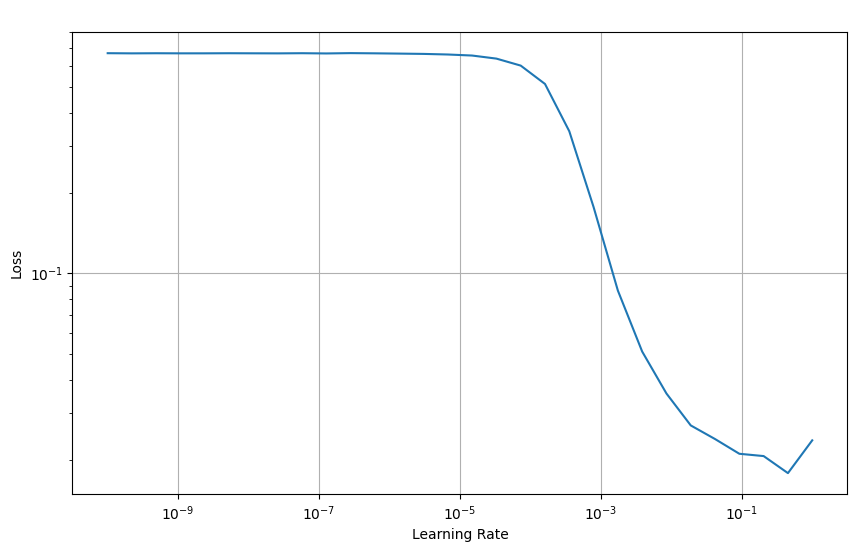

Lower bound: 3.56e-04
Upper bound: 4.52e-01


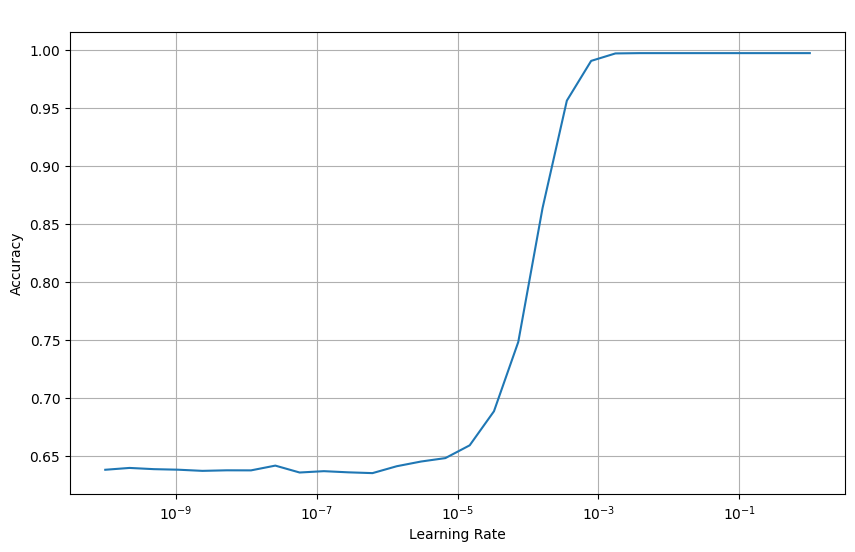

In [ ]:
#Adam v2
best_avg_accXXY = []
best_lossXXY = []
best_lrf_object = None
best_model_index = None
best_history = []

sequence_length = 43  # jumlah fitur (user)

for i in range(len(df.columns)):
    print(f"\n[Model ke-{i}]")

    # Siapkan fitur dan label
    feature = df.drop([df.columns[i]], axis=1).values
    label = df.iloc[:, i].values
    label = label.reshape(-1, 1, 1)
    label = np.repeat(label, sequence_length, axis=1)

    X_train, X_test, y_train, y_test = train_test_split(
        feature, label, test_size=0.2, random_state=42
    )

    # Buat model RNN
    modelXXY = tf.keras.Sequential([
        tf.keras.layers.SimpleRNN(64, return_sequences=True, input_shape=(X_train.shape[1], 1)),
        tf.keras.layers.SimpleRNN(64, return_sequences=True),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    # Inisialisasi learning rate finder
    lrf = lr_finder(modelXXY, begin_lr=1e-10, end_lr=1e0, num_epochs=30)
    lr_scheduler = LearningRateScheduler(lrf.lr_schedule)

    # Kompilasi model
    modelXXY.compile(optimizer=Adam(learning_rate=1e-4),
                     loss='binary_crossentropy',
                     metrics=['accuracy'])

    # Training
    historyXXY = modelXXY.fit(
        X_train, y_train,
        epochs=30,
        batch_size=128,
        callbacks=[lr_scheduler],
        verbose=1
    )

    # Update bound
    lrf.lr_plot(historyXXY.history['loss'], please_plot=False)
    print(f"[Model ke-{i}]")
    print(f"  ➤ Lower bound: {lrf.lower_bound:.2e}")
    print(f"  ➤ Upper bound: {lrf.upper_bound:.2e}")

    # Rata-rata akurasi dari 5 epoch terakhir
    acc_history = historyXXY.history['accuracy']
    N = 10
    avg_last_N_acc = np.mean(acc_history[-N:])
    min_loss = min(historyXXY.history['loss'])

    best_avg_accXXY.append(avg_last_N_acc)
    best_lossXXY.append(min_loss)
    best_history.append(historyXXY.history)

    # Cek apakah ini model terbaik
    if best_model_index is None or avg_last_N_acc > best_avg_accXXY[best_model_index]:
        best_model_index = i
        best_lrf_object = lrf

# ================================
# Hasil akhir
# ================================

recommended_lr = best_lrf_object.get_lr()  # geometric mean dari bound terbaik

print(f"\n🔍 Best learning rate based on highest average accuracy (last 5 epochs):")
print(f"Model ke-{best_model_index}")
print(f"Geometric Mean (Recommended): {recommended_lr:.2e}")
print(f"Average Accuracy (last 5 epochs): {best_avg_accXXY[best_model_index]:.4f}")
print(f"Loss: {best_lossXXY[best_model_index]:.4f}")
print(f"Recommended learning rate: more than {best_lrf_object.lower_bound:.2e}, less than {best_lrf_object.upper_bound:.2e}")

# Tampilkan grafik
best_lrf_object.lr_plot(best_history[best_model_index]['loss'])
print(f"Lower bound: {best_lrf_object.lower_bound:.2e}")
print(f"Upper bound: {best_lrf_object.upper_bound:.2e}")
best_lrf_object.accuracy_plot(best_history[best_model_index]['accuracy'])


In [ ]:
print(best_lrXXY[best_model_index])

0.000868511373751352


In [ ]:
print(best_avg_accXXY[11])

0.9970363140106201


In [ ]:
print(best_lrf_object.get_lr())

0.007196856730011529


In [ ]:
all_accXXY = []
all_val_accXXY = []
all_lossXXY = []
all_val_lossXXY = []

precXXY = []
recXXY  = []
f1XXY   = []

sequence_length = 43  # kolom fitur (user)

# loop melalui kolom data frame
for i in range(len(df.columns)):
    feature = df.drop([df.columns[i]], axis=1).values
    label = df.iloc[:, i].values

    # reshape label agar sesuai dengan output
    label = label.reshape(-1, 1, 1)
    label = np.repeat(label, sequence_length, axis=1)

    # split data menjadi data pelatihan dan data uji
    X_train, X_test, y_train, y_test = train_test_split(
        feature, label, test_size=0.2, random_state=42
    )

    #model RNN
    modelXXY = tf.keras.Sequential([
        tf.keras.layers.SimpleRNN(64, return_sequences=True, input_shape=(X_train.shape[1], 1)),
        tf.keras.layers.SimpleRNN(64, return_sequences=True),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    #optimizer = Adam(learning_rate=best_lrXXY[best_model_index])
    optimizer = Adam(learning_rate=best_lrf_object.get_lr())
    #optimizer = Adam(learning_rate=0.001)

    modelXXY.compile(optimizer=optimizer,
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

    # train model
    historyXXY = modelXXY.fit(X_train, y_train,
                          epochs=30, batch_size=128,
                          validation_data=(X_test, y_test),
                          verbose=0)

    # predict model
    Y_pred = modelXXY.predict(X_test)
    Y_pred = (Y_pred >= 0.5).astype(int)
    y_test_reshaped = y_test.reshape(y_test.shape[0], -1, 1)

    all_accXXY.append(historyXXY.history['accuracy'])
    all_val_accXXY.append(historyXXY.history['val_accuracy'])
    all_lossXXY.append(historyXXY.history['loss'])
    all_val_lossXXY.append(historyXXY.history['val_loss'])

    prec = precision_score(y_test_reshaped[:, -1, :], Y_pred[:, -1, :], average='weighted')
    rec = recall_score(y_test_reshaped[:, -1, :], Y_pred[:, -1, :], average='weighted')
    f1 = f1_score(y_test_reshaped[:, -1, :],
                  Y_pred[:, -1, :], average='weighted')

    precXXY.append(prec)
    recXXY.append(rec)
    f1XXY.append(f1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 263ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 160ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 145ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 131ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 151ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 181ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 147ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 122ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 143ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 150ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
#v2
all_accXXY = []
all_val_accXXY = []
all_lossXXY = []
all_val_lossXXY = []

precXXY = []
recXXY  = []
f1XXY   = []

sequence_length = 43  # kolom fitur (user)

for i in range(len(df.columns)):
    feature = df.drop([df.columns[i]], axis=1).values
    label = df.iloc[:, i].values
    label = label.reshape(-1, 1)  # tidak perlu repeat

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        feature, label, test_size=0.2, random_state=42
    )

    # Model RNN
    modelXXY = tf.keras.Sequential([
        tf.keras.layers.SimpleRNN(64, return_sequences=True, input_shape=(X_train.shape[1], 1)),
        tf.keras.layers.SimpleRNN(64, return_sequences=False),  # hanya output terakhir
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    optimizer = Adam(learning_rate=best_lrf_object.get_lr())  # learning rate dari lrf

    modelXXY.compile(optimizer=optimizer,
                     loss='binary_crossentropy',
                     metrics=['accuracy'])

    # Training
    historyXXY = modelXXY.fit(X_train, y_train,
                              epochs=30, batch_size=128,
                              validation_data=(X_test, y_test),
                              verbose=0)

    # Simpan metrik training dan val
    all_accXXY.append(historyXXY.history['accuracy'])
    all_val_accXXY.append(historyXXY.history['val_accuracy'])
    all_lossXXY.append(historyXXY.history['loss'])
    all_val_lossXXY.append(historyXXY.history['val_loss'])

    # Evaluasi prediksi
    Y_pred = modelXXY.predict(X_test)
    Y_pred = (Y_pred >= 0.5).astype(int)

    # Hitung metrik klasifikasi
    prec = precision_score(y_test, Y_pred, average='weighted')
    rec = recall_score(y_test, Y_pred, average='weighted')
    f1 = f1_score(y_test, Y_pred, average='weighted')

    precXXY.append(prec)
    recXXY.append(rec)
    f1XXY.append(f1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 120ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 185ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step


In [ ]:
print("=====================================")
print("Average Accuracy: {}".format(np.mean(all_accXXY)))
print("Minimum Accuracy: {}".format(np.min(all_accXXY)))
print("Maximum Accuracy: {}".format(np.max(all_accXXY)))
print("=====================================")

print("=====================================")
print("Average Loss: {}".format(np.mean(all_lossXXY)))
print("Minimum Loss: {}".format(np.min(all_lossXXY)))
print("Maximum Loss: {}".format(np.max(all_lossXXY)))
print("=====================================")

print("=====================================")
print("Average Precision: {}".format(np.mean(precXXY)))
print("Minimum Precision: {}".format(np.min(precXXY)))
print("Maximum Precision: {}".format(np.max(precXXY)))
print("=====================================")

print("=====================================")
print("Average Recall: {}".format(np.mean(recXXY)))
print("Minimum Recall: {}".format(np.min(recXXY)))
print("Maximum Recall: {}".format(np.max(recXXY)))
print("=====================================")

print("=====================================")
print("Average F1-Score: {}".format(np.mean(f1XXY)))
print("Minimum F1-Score: {}".format(np.min(f1XXY)))
print("Maximum F1-Score: {}".format(np.max(f1XXY)))
print("=====================================")

Average Accuracy: 0.8497998111853093
Minimum Accuracy: 0.4933818578720093
Maximum Accuracy: 0.997732400894165
Average Loss: 0.37784529898569663
Minimum Loss: 0.01690274477005005
Maximum Loss: 0.7847661375999451
Average Precision: 0.7488650552401824
Minimum Precision: 0.4325135946757569
Maximum Precision: 0.9820631442253064
Average Recall: 0.8325143325143326
Minimum Recall: 0.5675675675675675
Maximum Recall: 0.990990990990991
Average F1-Score: 0.7814302117624264
Minimum F1-Score: 0.5218370544457501
Maximum F1-Score: 0.9865068688598101


# **Adam (60 : 40)**


[Model ke-0]


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.2858 - loss: 0.9722 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.2859 - loss: 0.9774 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.2845 - loss: 0.9767 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.2883 - loss: 0.9756 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.2877 - loss: 0.9766 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.2862 - loss: 0.9757 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.2834 - loss: 0.9789 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.2851 - loss: 0.9780 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.2860 - loss: 0.9794 - learning_rate: 4.2919e-09
E

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.5857 - loss: 0.7056 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.5753 - loss: 0.7084 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5795 - loss: 0.7055 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5784 - loss: 0.7056 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5836 - loss: 0.7042 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5788 - loss: 0.7069 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5790 - loss: 0.7060 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5801 - loss: 0.7050 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5798 - loss: 0.7074 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - accuracy: 0.5207 - loss: 0.7419 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5203 - loss: 0.7416 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5217 - loss: 0.7406 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5203 - loss: 0.7427 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5223 - loss: 0.7420 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5227 - loss: 0.7406 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5243 - loss: 0.7409 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.5226 - loss: 0.7414 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5206 - loss: 0.7413 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.4043 - loss: 0.8882 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.4005 - loss: 0.8926 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.4013 - loss: 0.8915 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.4072 - loss: 0.8898 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.4014 - loss: 0.8975 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.4057 - loss: 0.8869 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.4007 - loss: 0.8959 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.4032 - loss: 0.8958 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.3903 - loss: 0.9015 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.3880 - loss: 0.8425 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.3934 - loss: 0.8382 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.3903 - loss: 0.8419 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.3991 - loss: 0.8388 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.3880 - loss: 0.8423 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.3865 - loss: 0.8458 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.3901 - loss: 0.8395 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.3843 - loss: 0.8452 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.3935 - loss: 0.8421 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.4978 - loss: 0.7557 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5066 - loss: 0.7466 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.4906 - loss: 0.7576 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5011 - loss: 0.7531 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5078 - loss: 0.7493 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.5051 - loss: 0.7520 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.5061 - loss: 0.7545 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.4986 - loss: 0.7540 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.4968 - loss: 0.7518 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.6643 - loss: 0.6604 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.6617 - loss: 0.6589 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.6591 - loss: 0.6610 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.6608 - loss: 0.6618 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.6543 - loss: 0.6651 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.6608 - loss: 0.6583 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.6656 - loss: 0.6591 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.6480 - loss: 0.6636 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.6559 - loss: 0.6606 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - accuracy: 0.4872 - loss: 0.6942 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.4846 - loss: 0.6949 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.4927 - loss: 0.6929 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.4952 - loss: 0.6937 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.5297 - loss: 0.6938 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5539 - loss: 0.6930 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5737 - loss: 0.6946 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5850 - loss: 0.6946 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5993 - loss: 0.6940 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.5194 - loss: 0.7416 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5204 - loss: 0.7416 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5185 - loss: 0.7407 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5220 - loss: 0.7405 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5239 - loss: 0.7414 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5238 - loss: 0.7426 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5253 - loss: 0.7408 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.5198 - loss: 0.7414 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5218 - loss: 0.7407 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.5214 - loss: 0.7340 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.5183 - loss: 0.7351 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5261 - loss: 0.7286 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5148 - loss: 0.7367 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5037 - loss: 0.7405 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5177 - loss: 0.7344 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.5155 - loss: 0.7291 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5084 - loss: 0.7358 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5188 - loss: 0.7271 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.4203 - loss: 0.8011 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.4369 - loss: 0.7884 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.4288 - loss: 0.7916 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.4176 - loss: 0.7987 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.4390 - loss: 0.7950 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.4426 - loss: 0.7990 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.4628 - loss: 0.7878 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.4643 - loss: 0.7949 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.4727 - loss: 0.7923 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - accuracy: 0.4040 - loss: 0.8395 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.4075 - loss: 0.8382 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.4036 - loss: 0.8368 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.4027 - loss: 0.8387 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.4073 - loss: 0.8370 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.3996 - loss: 0.8422 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.4056 - loss: 0.8351 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.4093 - loss: 0.8344 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.3966 - loss: 0.8396 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.6881 - loss: 0.6366 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.6853 - loss: 0.6391 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.6904 - loss: 0.6372 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.6893 - loss: 0.6387 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.6969 - loss: 0.6361 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.6936 - loss: 0.6370 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.6852 - loss: 0.6390 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.6919 - loss: 0.6352 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.6933 - loss: 0.6373 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.7724 - loss: 0.5708 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.7702 - loss: 0.5728 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.7736 - loss: 0.5700 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.7688 - loss: 0.5742 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7689 - loss: 0.5746 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.7713 - loss: 0.5707 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.7692 - loss: 0.5744 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.7654 - loss: 0.5770 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.7726 - loss: 0.5733 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.4927 - loss: 0.7161 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.4966 - loss: 0.7151 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.4921 - loss: 0.7139 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.4855 - loss: 0.7139 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.4887 - loss: 0.7157 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.4926 - loss: 0.7149 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.4966 - loss: 0.7152 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.5055 - loss: 0.7153 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.5060 - loss: 0.7145 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.4996 - loss: 0.7326 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.4949 - loss: 0.7337 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.4971 - loss: 0.7330 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.4921 - loss: 0.7325 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.4974 - loss: 0.7342 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.4944 - loss: 0.7354 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.4941 - loss: 0.7329 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.4971 - loss: 0.7332 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.5018 - loss: 0.7336 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - accuracy: 0.6208 - loss: 0.6826 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.6211 - loss: 0.6816 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.6191 - loss: 0.6821 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.6251 - loss: 0.6802 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.6123 - loss: 0.6835 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.6227 - loss: 0.6834 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.6253 - loss: 0.6822 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.6275 - loss: 0.6801 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.6218 - loss: 0.6838 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.5765 - loss: 0.7155 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.5593 - loss: 0.7281 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.5695 - loss: 0.7208 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.5776 - loss: 0.7129 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.5850 - loss: 0.7096 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.5731 - loss: 0.7200 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.5873 - loss: 0.7081 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.5731 - loss: 0.7136 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.5659 - loss: 0.7204 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - accuracy: 0.4417 - loss: 0.8350 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.4387 - loss: 0.8423 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.4397 - loss: 0.8388 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.4340 - loss: 0.8417 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.4455 - loss: 0.8357 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.4405 - loss: 0.8350 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.4413 - loss: 0.8330 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.4359 - loss: 0.8429 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.4319 - loss: 0.8424 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - accuracy: 0.5184 - loss: 0.7285 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.5106 - loss: 0.7305 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.5164 - loss: 0.7292 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.5149 - loss: 0.7295 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.5137 - loss: 0.7285 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.5217 - loss: 0.7282 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.5130 - loss: 0.7299 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5185 - loss: 0.7287 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5140 - loss: 0.7289 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 79ms/step - accuracy: 0.5206 - loss: 0.7365 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.5216 - loss: 0.7344 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.5197 - loss: 0.7341 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.5224 - loss: 0.7344 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.5207 - loss: 0.7350 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5166 - loss: 0.7347 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.5230 - loss: 0.7335 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.5150 - loss: 0.7364 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.5197 - loss: 0.7365 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - accuracy: 0.5542 - loss: 0.7151 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5524 - loss: 0.7153 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5462 - loss: 0.7177 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.5494 - loss: 0.7172 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.5487 - loss: 0.7158 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5475 - loss: 0.7173 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5479 - loss: 0.7154 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5472 - loss: 0.7161 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.5560 - loss: 0.7159 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.4692 - loss: 0.7639 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.4705 - loss: 0.7631 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.4702 - loss: 0.7639 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.4696 - loss: 0.7623 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.4717 - loss: 0.7621 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.4675 - loss: 0.7629 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.4646 - loss: 0.7657 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.4631 - loss: 0.7647 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.4661 - loss: 0.7669 - learning_rate: 4.2919e-09
E

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.5347 - loss: 0.7356 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.5316 - loss: 0.7355 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5363 - loss: 0.7342 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.5336 - loss: 0.7359 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5314 - loss: 0.7363 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.5323 - loss: 0.7372 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5296 - loss: 0.7349 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.5327 - loss: 0.7360 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5295 - loss: 0.7369 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.5723 - loss: 0.6988 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5740 - loss: 0.6954 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5719 - loss: 0.6978 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5821 - loss: 0.6959 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5708 - loss: 0.6975 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.5698 - loss: 0.6989 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5797 - loss: 0.6958 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5782 - loss: 0.6948 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5708 - loss: 0.6984 - learning_rate: 4.2919e-09
E

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.6162 - loss: 0.6749 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.6175 - loss: 0.6721 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.6206 - loss: 0.6718 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.6254 - loss: 0.6706 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.6334 - loss: 0.6663 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.6183 - loss: 0.6725 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.6239 - loss: 0.6716 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.6274 - loss: 0.6715 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.6193 - loss: 0.6729 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.5964 - loss: 0.6912 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5955 - loss: 0.6907 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5992 - loss: 0.6921 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5998 - loss: 0.6919 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5990 - loss: 0.6910 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5975 - loss: 0.6913 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5978 - loss: 0.6920 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.5971 - loss: 0.6918 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.6012 - loss: 0.6904 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.4811 - loss: 0.7536 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.4891 - loss: 0.7494 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.4879 - loss: 0.7495 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.4828 - loss: 0.7507 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.4881 - loss: 0.7498 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.4811 - loss: 0.7498 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.4651 - loss: 0.7529 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.4772 - loss: 0.7469 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.4635 - loss: 0.7471 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.5135 - loss: 0.7628 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5171 - loss: 0.7625 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5126 - loss: 0.7627 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.5120 - loss: 0.7644 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5123 - loss: 0.7636 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5183 - loss: 0.7635 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5079 - loss: 0.7638 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5110 - loss: 0.7653 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.5196 - loss: 0.7605 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - accuracy: 0.5486 - loss: 0.7134 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.5467 - loss: 0.7144 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.5478 - loss: 0.7137 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.5422 - loss: 0.7156 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.5408 - loss: 0.7158 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.5464 - loss: 0.7140 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.5415 - loss: 0.7154 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.5402 - loss: 0.7141 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.5440 - loss: 0.7159 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step - accuracy: 0.4597 - loss: 0.7890 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.4645 - loss: 0.7906 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.4602 - loss: 0.7895 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.4589 - loss: 0.7944 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.4686 - loss: 0.7859 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.4597 - loss: 0.7922 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.4546 - loss: 0.7942 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.4556 - loss: 0.7970 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.4620 - loss: 0.7900 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - accuracy: 0.4615 - loss: 0.8557 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.4545 - loss: 0.8566 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.4597 - loss: 0.8581 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.4555 - loss: 0.8566 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.4598 - loss: 0.8547 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.4520 - loss: 0.8570 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.4539 - loss: 0.8568 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.4531 - loss: 0.8565 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.4601 - loss: 0.8553 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - accuracy: 0.5754 - loss: 0.7054 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5695 - loss: 0.7060 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.5727 - loss: 0.7051 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.5734 - loss: 0.7070 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5741 - loss: 0.7064 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.5685 - loss: 0.7067 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.5682 - loss: 0.7068 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5732 - loss: 0.7064 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5744 - loss: 0.7032 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.5383 - loss: 0.7329 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5407 - loss: 0.7313 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5401 - loss: 0.7314 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.5378 - loss: 0.7306 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.5381 - loss: 0.7319 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.5383 - loss: 0.7293 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5383 - loss: 0.7311 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5381 - loss: 0.7316 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.5380 - loss: 0.7315 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.5418 - loss: 0.7360 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.5447 - loss: 0.7359 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5451 - loss: 0.7347 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.5436 - loss: 0.7347 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.5410 - loss: 0.7356 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5475 - loss: 0.7345 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5433 - loss: 0.7350 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5489 - loss: 0.7326 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5478 - loss: 0.7336 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.5722 - loss: 0.6904 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.5749 - loss: 0.6934 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5729 - loss: 0.6917 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.5704 - loss: 0.6930 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5760 - loss: 0.6926 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5700 - loss: 0.6923 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5735 - loss: 0.6906 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.5751 - loss: 0.6915 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5717 - loss: 0.6923 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.2806 - loss: 0.8938 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.2810 - loss: 0.8915 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.2807 - loss: 0.8897 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.2820 - loss: 0.8927 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.2822 - loss: 0.8916 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.2784 - loss: 0.8925 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.2829 - loss: 0.8890 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.2771 - loss: 0.8951 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.2781 - loss: 0.8942 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.6879 - loss: 0.6416 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.6950 - loss: 0.6368 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.6942 - loss: 0.6323 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.7018 - loss: 0.6310 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.6895 - loss: 0.6387 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.6913 - loss: 0.6407 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.6986 - loss: 0.6339 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.6979 - loss: 0.6343 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.6917 - loss: 0.6363 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.4863 - loss: 0.7841 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.4897 - loss: 0.7815 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.4848 - loss: 0.7850 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.4955 - loss: 0.7809 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.4781 - loss: 0.7877 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.4882 - loss: 0.7813 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.4946 - loss: 0.7844 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.4866 - loss: 0.7852 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.4894 - loss: 0.7856 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.4715 - loss: 0.7669 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.4760 - loss: 0.7653 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.4735 - loss: 0.7688 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.4757 - loss: 0.7641 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.4734 - loss: 0.7665 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.4741 - loss: 0.7669 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.4780 - loss: 0.7664 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.4766 - loss: 0.7663 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.4685 - loss: 0.7674 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 0.5947 - loss: 0.6901 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.5958 - loss: 0.6912 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.5969 - loss: 0.6901 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.6005 - loss: 0.6893 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.6017 - loss: 0.6868 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.6035 - loss: 0.6879 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.6079 - loss: 0.6838 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.6006 - loss: 0.6880 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.6033 - loss: 0.6876 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.5946 - loss: 0.6940 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.5938 - loss: 0.6956 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5926 - loss: 0.6927 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.5864 - loss: 0.6971 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.5949 - loss: 0.6943 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.5892 - loss: 0.6967 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.5957 - loss: 0.6943 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.5926 - loss: 0.6972 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.5877 - loss: 0.6954 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.4153 - loss: 0.8430 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.4161 - loss: 0.8460 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.4205 - loss: 0.8402 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.4165 - loss: 0.8438 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.4151 - loss: 0.8502 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.4158 - loss: 0.8435 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.4176 - loss: 0.8446 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.4144 - loss: 0.8454 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.4178 - loss: 0.8417 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 83ms/step - accuracy: 0.4939 - loss: 0.7780 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.4956 - loss: 0.7741 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.5015 - loss: 0.7722 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.4997 - loss: 0.7742 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.4972 - loss: 0.7766 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.4972 - loss: 0.7747 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.5026 - loss: 0.7709 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.4977 - loss: 0.7740 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5019 - loss: 0.7717 - learning_rate: 4.2919e-09
Epoch 10/50


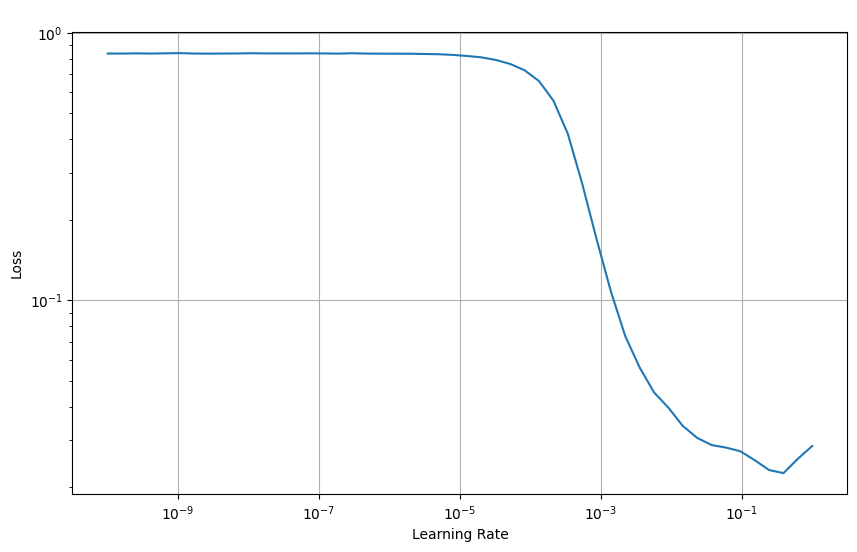

Lower bound: 3.39e-04
Upper bound: 3.91e-01


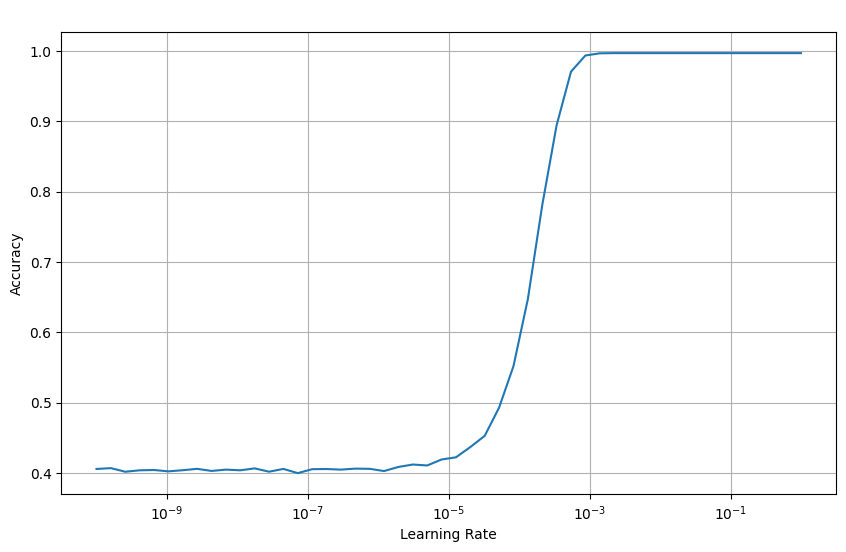

In [ ]:
#Adam
best_lrXXY = []
best_accXXY = []
best_lossXXY = []
best_history = []
best_lrf_object = None
best_model_index = None

sequence_length = 43  # jumlah fitur (user)

for i in range(len(df.columns)):
    print(f"\n[Model ke-{i}]")

    # Siapkan fitur dan label
    feature = df.drop([df.columns[i]], axis=1).values
    label = df.iloc[:, i].values
    label = label.reshape(-1, 1, 1)
    label = np.repeat(label, sequence_length, axis=1)

    X_train, X_test, y_train, y_test = train_test_split(
        feature, label, test_size=0.4, random_state=42
    )

    # Buat model RNN
    modelXXY = tf.keras.Sequential([
        tf.keras.layers.SimpleRNN(64, return_sequences=True, input_shape=(X_train.shape[1], 1)),
        tf.keras.layers.SimpleRNN(64, return_sequences=True),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    # Inisialisasi learning rate finder
    lrf = lr_finder(modelXXY, begin_lr=1e-10, end_lr=1e0, num_epochs=50)
    lr_scheduler = LearningRateScheduler(lrf.lr_schedule)

    # Kompilasi model dengan initial learning rate
    modelXXY.compile(optimizer=Adam(learning_rate=1e-4),  # nilai awal kecil
                     loss='binary_crossentropy',
                     metrics=['accuracy'])

    # Training model (output tetap ditampilkan)
    historyXXY = modelXXY.fit(
        X_train, y_train,
        epochs=50,
        batch_size=128,
        callbacks=[lr_scheduler],
        verbose=1  # tampilkan hasil evaluasi per epoch
    )

    # Update bound (wajib dilakukan sebelum ambil learning rate atau print bound)
    lrf.lr_plot(historyXXY.history['loss'], please_plot=False)
    print(f"[Model ke-{i}]")
    print(f"  ➤ Lower bound: {lrf.lower_bound:.2e}")
    print(f"  ➤ Upper bound: {lrf.upper_bound:.2e}")

    # Simpan metrik terbaik
    max_acc_index = np.argmax(historyXXY.history['accuracy'])
    max_accuracy = historyXXY.history['accuracy'][max_acc_index]
    min_loss = min(historyXXY.history['loss'])
    best_learning_rate = lrf.lr_vector(len(historyXXY.history['accuracy']))[max_acc_index]
    recommended_lr = lrf.get_lr()


    best_lrXXY.append(best_learning_rate)
    best_accXXY.append(max_accuracy)
    best_lossXXY.append(min_loss)
    best_history.append(historyXXY.history)

    # Simpan model dan lrf terbaik jika lebih baik dari sebelumnya
    if best_model_index is None or max_accuracy > best_accXXY[best_model_index]:
        best_model_index = i
        best_lrf_object = lrf

# =============================
# Setelah semua model dilatih
# =============================

print(f"\n🔍 Best learning rate based on highest training accuracy:")
print(f"Model ke-{best_model_index}")
print(f"Learning Rate: {best_lrXXY[best_model_index]:.2e}")
print(f"Geometric Mean (Recommended): {best_lrf_object.get_lr():.2e}")
print(f"Accuracy: {best_accXXY[best_model_index]:.4f}")
print(f"Loss: {best_lossXXY[best_model_index]:.4f}")

# Tampilkan plot hanya untuk model terbaik
best_lrf_object.lr_plot(best_history[best_model_index]['loss'])
print(f"Lower bound: {best_lrf_object.lower_bound:.2e}")
print(f"Upper bound: {best_lrf_object.upper_bound:.2e}")
best_lrf_object.accuracy_plot(best_history[best_model_index]['accuracy'])


In [ ]:
print(best_lrXXY[best_model_index])

0.0022229964825261957


In [ ]:
print(best_lrf_object.get_lr())

0.011513953993264481


In [ ]:
all_accXXY = []
all_val_accXXY = []
all_lossXXY = []
all_val_lossXXY = []

precXXY = []
recXXY  = []
f1XXY   = []

sequence_length = 43  # kolom fitur (user)

# loop melalui kolom data frame
for i in range(len(df.columns)):
    feature = df.drop([df.columns[i]], axis=1).values
    label = df.iloc[:, i].values

    # reshape label agar sesuai dengan output
    label = label.reshape(-1, 1, 1)
    label = np.repeat(label, sequence_length, axis=1)

    # split data menjadi data pelatihan dan data uji
    X_train, X_test, y_train, y_test = train_test_split(
        feature, label, test_size=0.4, random_state=42
    )

    #model RNN
    modelXXY = tf.keras.Sequential([
        tf.keras.layers.SimpleRNN(64, return_sequences=True, input_shape=(X_train.shape[1], 1)),
        tf.keras.layers.SimpleRNN(64, return_sequences=True),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    optimizer = Adam(learning_rate=best_lrXXY[best_model_index])

    modelXXY.compile(optimizer=optimizer,
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

    # train model
    historyXXY = modelXXY.fit(X_train, y_train,
                          epochs=30, batch_size=128,
                          validation_data=(X_test, y_test),
                          verbose=0)

    # predict model
    Y_pred = modelXXY.predict(X_test)
    Y_pred = (Y_pred >= 0.5).astype(int)
    y_test_reshaped = y_test.reshape(y_test.shape[0], -1, 1)

    all_accXXY.append(historyXXY.history['accuracy'])
    all_val_accXXY.append(historyXXY.history['val_accuracy'])
    all_lossXXY.append(historyXXY.history['loss'])
    all_val_lossXXY.append(historyXXY.history['val_loss'])

    prec = precision_score(y_test_reshaped[:, -1, :], Y_pred[:, -1, :], average='weighted')
    rec = recall_score(y_test_reshaped[:, -1, :], Y_pred[:, -1, :], average='weighted')
    f1 = f1_score(y_test_reshaped[:, -1, :],
                  Y_pred[:, -1, :], average='weighted')

    precXXY.append(prec)
    recXXY.append(rec)
    f1XXY.append(f1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
print("=====================================")
print("Average Accuracy: {}".format(np.mean(all_accXXY)))
print("Minimum Accuracy: {}".format(np.min(all_accXXY)))
print("Maximum Accuracy: {}".format(np.max(all_accXXY)))
print("=====================================")

print("=====================================")
print("Average Loss: {}".format(np.mean(all_lossXXY)))
print("Minimum Loss: {}".format(np.min(all_lossXXY)))
print("Maximum Loss: {}".format(np.max(all_lossXXY)))
print("=====================================")

print("=====================================")
print("Average Precision: {}".format(np.mean(precXXY)))
print("Minimum Precision: {}".format(np.min(precXXY)))
print("Maximum Precision: {}".format(np.max(precXXY)))
print("=====================================")

print("=====================================")
print("Average Recall: {}".format(np.mean(recXXY)))
print("Minimum Recall: {}".format(np.min(recXXY)))
print("Maximum Recall: {}".format(np.max(recXXY)))
print("=====================================")

print("=====================================")
print("Average F1-Score: {}".format(np.mean(f1XXY)))
print("Minimum F1-Score: {}".format(np.min(f1XXY)))
print("Maximum F1-Score: {}".format(np.max(f1XXY)))
print("=====================================")

Average Accuracy: 0.8582319363725908
Minimum Accuracy: 0.49371179938316345
Maximum Accuracy: 0.9969788789749146
Average Loss: 0.3635926962660795
Minimum Loss: 0.027423864230513573
Maximum Loss: 0.7803090214729309
Average Precision: 0.7945591848595128
Minimum Precision: 0.4919022952028009
Maximum Precision: 0.9909707008456011
Average Recall: 0.8552036199095021
Minimum Recall: 0.6561085972850679
Maximum Recall: 0.995475113122172
Average F1-Score: 0.81808882996791
Minimum F1-Score: 0.5782468470203139
Maximum F1-Score: 0.993217799940489


# **Nadam**


[Model ke-0]
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.4865 - loss: 0.7634 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.4790 - loss: 0.7663 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.4871 - loss: 0.7629 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.4847 - loss: 0.7643 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.4827 - loss: 0.7652 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.4807 - loss: 0.7664 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.4803 - loss: 0.7681 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.4806 - loss: 0.7672 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.4811 - loss: 0.7648 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.6669 - loss: 0.6292 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.6630 - loss: 0.6347 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.6664 - loss: 0.6316 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.6659 - loss: 0.6318 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.6631 - loss: 0.6343 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.6640 - loss: 0.6342 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.6678 - loss: 0.6317 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.6615 - loss: 0.6348 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.6633 - loss: 0.6336 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.5633 - loss: 0.6944 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5677 - loss: 0.6940 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5612 - loss: 0.6948 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5624 - loss: 0.6958 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5604 - loss: 0.6945 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5639 - loss: 0.6949 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.5671 - loss: 0.6940 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.5617 - loss: 0.6956 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.5620 - loss: 0.6935 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.5060 - loss: 0.7364 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5094 - loss: 0.7346 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5040 - loss: 0.7389 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5032 - loss: 0.7348 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5073 - loss: 0.7368 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.5021 - loss: 0.7371 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.5100 - loss: 0.7339 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.5081 - loss: 0.7340 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.5012 - loss: 0.7369 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.4237 - loss: 0.8425 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.4243 - loss: 0.8428 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.4258 - loss: 0.8441 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.4237 - loss: 0.8453 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.4270 - loss: 0.8434 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.4294 - loss: 0.8407 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.4242 - loss: 0.8449 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.4249 - loss: 0.8403 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.4327 - loss: 0.8399 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 82ms/step - accuracy: 0.5203 - loss: 0.7390 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.5275 - loss: 0.7390 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.5260 - loss: 0.7363 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.5240 - loss: 0.7364 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.5239 - loss: 0.7423 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.5274 - loss: 0.7382 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.5286 - loss: 0.7363 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.5270 - loss: 0.7391 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.5255 - loss: 0.7359 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - accuracy: 0.4305 - loss: 0.8226 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.4361 - loss: 0.8178 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.4370 - loss: 0.8154 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.4347 - loss: 0.8178 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.4373 - loss: 0.8175 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.4276 - loss: 0.8234 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.4309 - loss: 0.8238 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.4312 - loss: 0.8252 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.4389 - loss: 0.8183 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.4777 - loss: 0.6950 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.4836 - loss: 0.6936 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.4752 - loss: 0.6949 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.4793 - loss: 0.6935 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.4792 - loss: 0.6939 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.5119 - loss: 0.6938 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.5532 - loss: 0.6938 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.5704 - loss: 0.6938 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.5823 - loss: 0.6952 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - accuracy: 0.4447 - loss: 0.7838 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.4469 - loss: 0.7825 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.4493 - loss: 0.7807 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.4518 - loss: 0.7813 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.4492 - loss: 0.7810 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.4547 - loss: 0.7787 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.4489 - loss: 0.7836 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.4520 - loss: 0.7805 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.4508 - loss: 0.7793 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - accuracy: 0.4991 - loss: 0.7555 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.4941 - loss: 0.7587 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.4966 - loss: 0.7504 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.5008 - loss: 0.7489 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.4995 - loss: 0.7494 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.4919 - loss: 0.7609 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.4925 - loss: 0.7597 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.4954 - loss: 0.7580 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.4935 - loss: 0.7554 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - accuracy: 0.4540 - loss: 0.7523 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.4710 - loss: 0.7447 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.4584 - loss: 0.7486 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.4692 - loss: 0.7444 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.4544 - loss: 0.7527 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.4761 - loss: 0.7481 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.4914 - loss: 0.7464 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.5042 - loss: 0.7451 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.5031 - loss: 0.7488 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 83ms/step - accuracy: 0.7545 - loss: 0.5947 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.7593 - loss: 0.5913 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.7580 - loss: 0.5935 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.7532 - loss: 0.5953 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.7550 - loss: 0.5970 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7555 - loss: 0.5946 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7585 - loss: 0.5931 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.7550 - loss: 0.5967 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.7556 - loss: 0.5918 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.4023 - loss: 0.8143 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.4112 - loss: 0.8139 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.4099 - loss: 0.8103 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.4059 - loss: 0.8144 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.4033 - loss: 0.8148 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.4011 - loss: 0.8163 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.4093 - loss: 0.8143 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.3977 - loss: 0.8173 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.4067 - loss: 0.8109 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - accuracy: 0.4073 - loss: 0.8605 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.4062 - loss: 0.8624 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.4165 - loss: 0.8536 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.4103 - loss: 0.8555 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.4071 - loss: 0.8581 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.4073 - loss: 0.8571 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.4004 - loss: 0.8650 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.4112 - loss: 0.8553 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.4155 - loss: 0.8547 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - accuracy: 0.5092 - loss: 0.7009 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.5166 - loss: 0.7004 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5134 - loss: 0.7008 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5107 - loss: 0.7000 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5157 - loss: 0.6996 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5196 - loss: 0.7003 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5239 - loss: 0.7006 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5265 - loss: 0.6994 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5376 - loss: 0.6976 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.4816 - loss: 0.7343 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.4847 - loss: 0.7358 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.4823 - loss: 0.7353 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.4777 - loss: 0.7347 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.4710 - loss: 0.7374 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.4768 - loss: 0.7343 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.4796 - loss: 0.7380 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.4856 - loss: 0.7344 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.4866 - loss: 0.7363 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.5085 - loss: 0.7400 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5052 - loss: 0.7404 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.5081 - loss: 0.7393 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5126 - loss: 0.7400 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5043 - loss: 0.7415 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5088 - loss: 0.7379 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5052 - loss: 0.7405 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5033 - loss: 0.7413 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5045 - loss: 0.7409 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.5509 - loss: 0.7011 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.5484 - loss: 0.7014 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5528 - loss: 0.7006 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5492 - loss: 0.7033 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5445 - loss: 0.7015 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.5555 - loss: 0.6998 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.5506 - loss: 0.7018 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5526 - loss: 0.7020 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.5506 - loss: 0.7009 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.5737 - loss: 0.7108 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5749 - loss: 0.7098 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5707 - loss: 0.7114 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5777 - loss: 0.7109 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5693 - loss: 0.7109 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5768 - loss: 0.7111 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5766 - loss: 0.7088 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5807 - loss: 0.7090 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.5718 - loss: 0.7121 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - accuracy: 0.4543 - loss: 0.7696 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.4513 - loss: 0.7710 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.4544 - loss: 0.7688 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.4508 - loss: 0.7718 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.4521 - loss: 0.7716 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.4525 - loss: 0.7693 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.4578 - loss: 0.7698 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.4529 - loss: 0.7696 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.4515 - loss: 0.7705 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - accuracy: 0.4725 - loss: 0.7694 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.4767 - loss: 0.7705 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.4773 - loss: 0.7692 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.4665 - loss: 0.7737 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.4732 - loss: 0.7700 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.4749 - loss: 0.7702 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.4706 - loss: 0.7705 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.4743 - loss: 0.7697 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.4762 - loss: 0.7689 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.6018 - loss: 0.6799 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5998 - loss: 0.6810 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5979 - loss: 0.6803 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.6025 - loss: 0.6798 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.6025 - loss: 0.6802 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.6032 - loss: 0.6795 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.5991 - loss: 0.6789 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.6054 - loss: 0.6801 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.5990 - loss: 0.6812 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - accuracy: 0.6421 - loss: 0.6619 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.6430 - loss: 0.6625 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.6500 - loss: 0.6559 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.6494 - loss: 0.6579 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.6422 - loss: 0.6611 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.6441 - loss: 0.6618 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.6453 - loss: 0.6608 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.6385 - loss: 0.6646 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.6421 - loss: 0.6640 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - accuracy: 0.6309 - loss: 0.6655 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.6384 - loss: 0.6638 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.6419 - loss: 0.6624 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.6301 - loss: 0.6679 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.6314 - loss: 0.6668 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.6340 - loss: 0.6614 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.6342 - loss: 0.6642 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.6323 - loss: 0.6646 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.6356 - loss: 0.6650 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 86ms/step - accuracy: 0.4981 - loss: 0.7393 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.4936 - loss: 0.7404 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.5058 - loss: 0.7371 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.4899 - loss: 0.7406 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.5044 - loss: 0.7365 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.5015 - loss: 0.7401 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5029 - loss: 0.7394 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.4955 - loss: 0.7398 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.5005 - loss: 0.7387 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - accuracy: 0.5105 - loss: 0.7536 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5122 - loss: 0.7560 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5143 - loss: 0.7530 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5106 - loss: 0.7548 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5142 - loss: 0.7549 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5147 - loss: 0.7532 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5135 - loss: 0.7539 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5083 - loss: 0.7544 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.5031 - loss: 0.7566 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.5782 - loss: 0.6916 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5793 - loss: 0.6921 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.5751 - loss: 0.6914 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5821 - loss: 0.6927 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.5782 - loss: 0.6928 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5739 - loss: 0.6946 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5755 - loss: 0.6930 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5750 - loss: 0.6929 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5739 - loss: 0.6906 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 52ms/step - accuracy: 0.4915 - loss: 0.7231 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.4973 - loss: 0.7210 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.4935 - loss: 0.7204 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.4904 - loss: 0.7238 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.4982 - loss: 0.7206 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.4924 - loss: 0.7208 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.4894 - loss: 0.7239 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.4930 - loss: 0.7210 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.4949 - loss: 0.7188 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - accuracy: 0.4902 - loss: 0.7593 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.4885 - loss: 0.7605 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.4909 - loss: 0.7618 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.4858 - loss: 0.7590 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.4961 - loss: 0.7573 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.4848 - loss: 0.7614 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.4899 - loss: 0.7597 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.4876 - loss: 0.7593 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - accuracy: 0.4916 - loss: 0.7571 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 84ms/step - accuracy: 0.4951 - loss: 0.7521 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.4975 - loss: 0.7507 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.4933 - loss: 0.7524 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.5014 - loss: 0.7504 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.4998 - loss: 0.7510 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.5012 - loss: 0.7515 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - accuracy: 0.4929 - loss: 0.7525 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.5035 - loss: 0.7479 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.4955 - loss: 0.7519 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - accuracy: 0.5120 - loss: 0.7328 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.5138 - loss: 0.7329 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.5066 - loss: 0.7369 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.5116 - loss: 0.7354 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.5146 - loss: 0.7338 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.5047 - loss: 0.7378 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.5076 - loss: 0.7377 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.5111 - loss: 0.7346 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.5094 - loss: 0.7367 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - accuracy: 0.5707 - loss: 0.7013 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.5707 - loss: 0.7020 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.5693 - loss: 0.7013 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.5744 - loss: 0.7015 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.5673 - loss: 0.7032 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.5643 - loss: 0.7028 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.5623 - loss: 0.7031 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.5685 - loss: 0.7017 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.5664 - loss: 0.7014 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.4551 - loss: 0.8325 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.4529 - loss: 0.8337 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.4440 - loss: 0.8362 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.4428 - loss: 0.8373 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.4460 - loss: 0.8368 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.4521 - loss: 0.8326 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.4500 - loss: 0.8362 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.4512 - loss: 0.8336 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.4507 - loss: 0.8316 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.5471 - loss: 0.7352 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5467 - loss: 0.7367 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.5456 - loss: 0.7365 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.5501 - loss: 0.7352 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.5449 - loss: 0.7350 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.5481 - loss: 0.7358 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.5448 - loss: 0.7379 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.5424 - loss: 0.7389 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.5497 - loss: 0.7352 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - accuracy: 0.5852 - loss: 0.6968 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.5781 - loss: 0.6978 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.5779 - loss: 0.6966 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.5817 - loss: 0.6977 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.5760 - loss: 0.6976 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.5769 - loss: 0.6978 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.5771 - loss: 0.6979 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.5805 - loss: 0.6953 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.5754 - loss: 0.6983 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - accuracy: 0.4838 - loss: 0.7726 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.4769 - loss: 0.7770 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.4745 - loss: 0.7750 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.4771 - loss: 0.7759 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.4814 - loss: 0.7739 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.4824 - loss: 0.7745 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.4781 - loss: 0.7745 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.4776 - loss: 0.7770 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.4833 - loss: 0.7741 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - accuracy: 0.4223 - loss: 0.8556 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.4198 - loss: 0.8577 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.4164 - loss: 0.8603 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.4190 - loss: 0.8596 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.4205 - loss: 0.8598 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.4229 - loss: 0.8563 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.4131 - loss: 0.8614 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.4177 - loss: 0.8586 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.4234 - loss: 0.8550 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - accuracy: 0.6087 - loss: 0.6942 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.6077 - loss: 0.6960 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.6116 - loss: 0.6942 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.6094 - loss: 0.6961 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.6077 - loss: 0.6951 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.6117 - loss: 0.6953 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.6076 - loss: 0.6951 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.6077 - loss: 0.6943 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.6160 - loss: 0.6930 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - accuracy: 0.5476 - loss: 0.7166 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.5457 - loss: 0.7179 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.5492 - loss: 0.7175 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5529 - loss: 0.7176 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.5529 - loss: 0.7173 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.5507 - loss: 0.7175 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.5518 - loss: 0.7179 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.5509 - loss: 0.7203 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.5475 - loss: 0.7166 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 0.7115 - loss: 0.6329 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.7084 - loss: 0.6318 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.7068 - loss: 0.6339 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.6985 - loss: 0.6360 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7063 - loss: 0.6346 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.7026 - loss: 0.6350 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.7073 - loss: 0.6340 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.7049 - loss: 0.6362 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.7072 - loss: 0.6346 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 0.7263 - loss: 0.6152 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.7166 - loss: 0.6199 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.7223 - loss: 0.6182 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.7187 - loss: 0.6210 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.7290 - loss: 0.6139 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.7160 - loss: 0.6190 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.7260 - loss: 0.6131 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.7230 - loss: 0.6198 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.7294 - loss: 0.6130 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - accuracy: 0.4545 - loss: 0.8380 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.4573 - loss: 0.8383 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.4599 - loss: 0.8377 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.4564 - loss: 0.8364 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.4558 - loss: 0.8367 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.4539 - loss: 0.8378 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.4564 - loss: 0.8352 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.4603 - loss: 0.8339 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.4569 - loss: 0.8373 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - accuracy: 0.6764 - loss: 0.6266 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.6852 - loss: 0.6235 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.6885 - loss: 0.6213 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.6887 - loss: 0.6221 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.6787 - loss: 0.6273 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.6817 - loss: 0.6253 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.6864 - loss: 0.6253 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.6789 - loss: 0.6276 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.6870 - loss: 0.6238 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.4068 - loss: 0.7880 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.4041 - loss: 0.7850 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.4056 - loss: 0.7866 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.4089 - loss: 0.7846 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.4051 - loss: 0.7848 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.4035 - loss: 0.7861 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.4028 - loss: 0.7866 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.4069 - loss: 0.7857 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.4087 - loss: 0.7840 - learning_rate: 4.2919e-09
Epoch 10/50


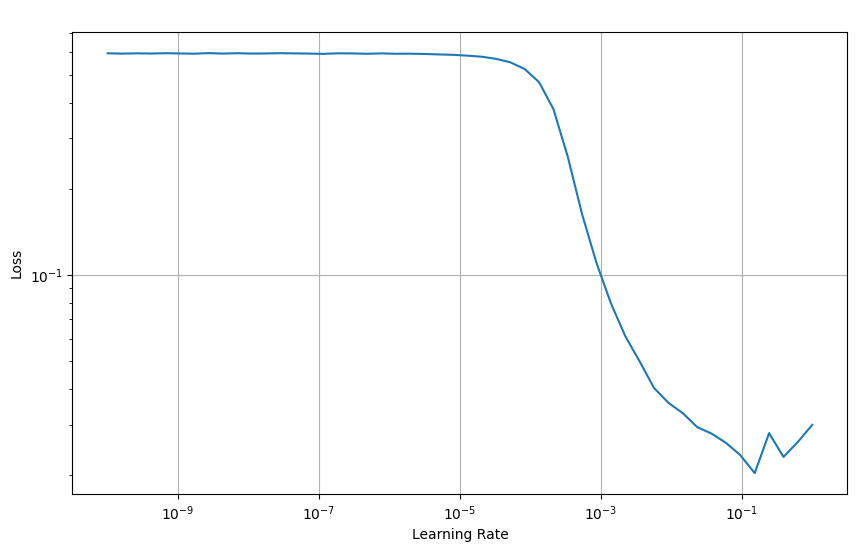

Lower bound: 2.12e-04
Upper bound: 1.53e-01


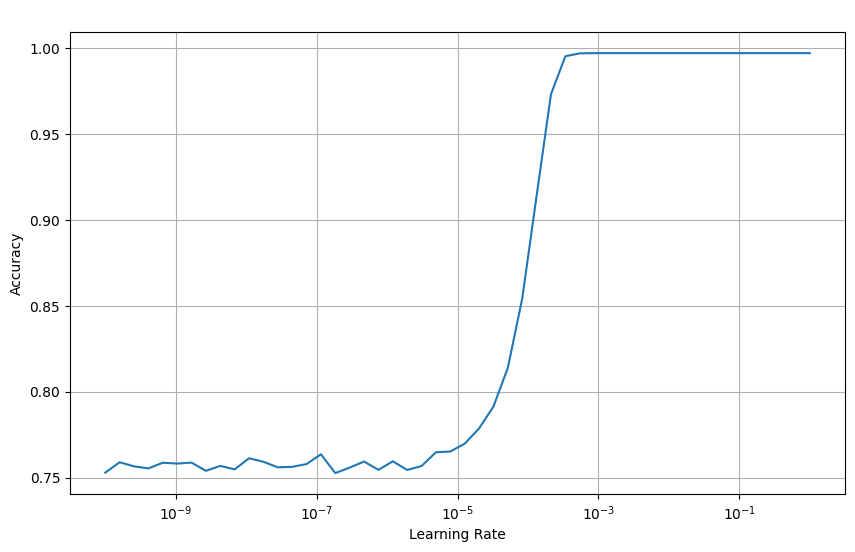

In [ ]:
#Nadam
best_lrXY = []
best_accXY = []
best_lossXY = []
best_history_nadam = []
best_lrf_object_nadam = None
best_model_index_nadam = None

sequence_length = 43  # jumlah fitur (user)

for i in range(len(df.columns)):
    print(f"\n[Model ke-{i}]")

    # Siapkan fitur dan label
    feature = df.drop([df.columns[i]], axis=1).values
    label = df.iloc[:, i].values
    label = label.reshape(-1, 1, 1)
    label = np.repeat(label, sequence_length, axis=1)

    X_train, X_test, y_train, y_test = train_test_split(
        feature, label, test_size=0.4, random_state=42
    )

    # Buat model RNN
    modelXY = tf.keras.Sequential([
        tf.keras.layers.SimpleRNN(64, return_sequences=True, input_shape=(X_train.shape[1], 1)),
        tf.keras.layers.SimpleRNN(64, return_sequences=True),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    # Inisialisasi learning rate finder
    lrf = lr_finder(modelXY, begin_lr=1e-10, end_lr=1e0, num_epochs=50)
    lr_scheduler = LearningRateScheduler(lrf.lr_schedule)

    # Kompilasi model dengan initial learning rate
    modelXY.compile(optimizer=Nadam(learning_rate=1e-4),  # nilai awal kecil
                     loss='binary_crossentropy',
                     metrics=['accuracy'])

    # Training model (output tetap ditampilkan)
    historyXY = modelXY.fit(
        X_train, y_train,
        epochs=50,
        batch_size=128,
        callbacks=[lr_scheduler],
        verbose=1  # tampilkan hasil evaluasi per epoch
    )

    # Update bound (wajib dilakukan sebelum ambil learning rate atau print bound)
    lrf.lr_plot(historyXY.history['loss'], please_plot=False)
    print(f"[Model ke-{i}]")
    print(f"  ➤ Lower bound: {lrf.lower_bound:.2e}")
    print(f"  ➤ Upper bound: {lrf.upper_bound:.2e}")

    # Simpan metrik terbaik
    max_acc_index = np.argmax(historyXY.history['accuracy'])
    max_accuracy = historyXY.history['accuracy'][max_acc_index]
    min_loss = min(historyXY.history['loss'])
    best_learning_rate = lrf.lr_vector(len(historyXY.history['accuracy']))[max_acc_index]
    recommended_lr = lrf.get_lr()

    best_lrXY.append(best_learning_rate)
    best_accXY.append(max_accuracy)
    best_lossXY.append(min_loss)
    best_history_nadam.append(historyXY.history)

    # Simpan model dan lrf terbaik jika lebih baik dari sebelumnya
    if best_model_index_nadam is None or max_accuracy > best_accXY[best_model_index_nadam]:
        best_model_index_nadam = i
        best_lrf_object_nadam = lrf

# =============================
# Setelah semua model dilatih
# =============================

print(f"\n🔍 Best learning rate based on highest training accuracy:")
print(f"Model ke-{best_model_index_nadam}")
print(f"Learning Rate: {best_lrXY[best_model_index_nadam]:.2e}")
print(f"Geometric Mean: {best_lrf_object_nadam.get_lr():.2e}")
print(f"Accuracy: {best_accXY[best_model_index_nadam]:.4f}")
print(f"Loss: {best_lossXY[best_model_index_nadam]:.4f}")

# Tampilkan plot hanya untuk model terbaik
best_lrf_object_nadam.lr_plot(best_history_nadam[best_model_index_nadam]['loss'])
print(f"Lower bound: {best_lrf_object_nadam.lower_bound:.2e}")
print(f"Upper bound: {best_lrf_object_nadam.upper_bound:.2e}")
best_lrf_object_nadam.accuracy_plot(best_history_nadam[best_model_index_nadam]['accuracy'])


In [ ]:
print(best_lrXY[best_model_index_nadam])

0.000868511373751352


In [ ]:
all_accXY = []
all_val_accXY = []
all_lossXY = []
all_val_lossXY = []

precXY = []
recXY  = []
f1XY   = []

sequence_length = 43  # kolom fitur (user)

# loop melalui kolom data frame
for i in range(len(df.columns)):
    feature = df.drop([df.columns[i]], axis=1).values
    label = df.iloc[:, i].values

    # reshape label agar sesuai dengan output
    label = label.reshape(-1, 1, 1)
    label = np.repeat(label, sequence_length, axis=1)

    X_train, X_test, y_train, y_test = train_test_split(
        feature, label, test_size=0.4, random_state=42
    )

    modelXY = tf.keras.Sequential([
        tf.keras.layers.SimpleRNN(64, return_sequences=True, input_shape=(X_train.shape[1], 1)),
        tf.keras.layers.SimpleRNN(64, return_sequences=True),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    optimizer = Nadam(learning_rate=best_lrXY[best_model_index_nadam])
    #optimizer = Nadam(learning_rate=best_lrf_object_nadam.get_lr())

    modelXY.compile(optimizer=optimizer,
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

    # train model
    historyXY = modelXY.fit(X_train, y_train,
                          epochs=30, batch_size=128,
                          validation_data=(X_test, y_test),
                          verbose=0)

    # predict model
    Y_pred = modelXY.predict(X_test)
    Y_pred = (Y_pred >= 0.5).astype(int)
    y_test_reshaped = y_test.reshape(y_test.shape[0], -1, 1)

    all_accXY.append(historyXY.history['accuracy'])
    all_val_accXY.append(historyXY.history['val_accuracy'])
    all_lossXY.append(historyXY.history['loss'])
    all_val_lossXY.append(historyXY.history['val_loss'])

    prec = precision_score(y_test_reshaped[:, -1, :], Y_pred[:, -1, :], average='weighted')
    rec = recall_score(y_test_reshaped[:, -1, :], Y_pred[:, -1, :], average='weighted')
    f1 = f1_score(y_test_reshaped[:, -1, :],
                  Y_pred[:, -1, :], average='weighted')

    precXY.append(prec)
    recXY.append(rec)
    f1XY.append(f1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
print("=====================================")
print("Average Accuracy: {}".format(np.mean(all_accXY)))
print("Minimum Accuracy: {}".format(np.min(all_accXY)))
print("Maximum Accuracy: {}".format(np.max(all_accXY)))
print("=====================================")

print("=====================================")
print("Average Loss: {}".format(np.mean(all_lossXY)))
print("Minimum Loss: {}".format(np.min(all_lossXY)))
print("Maximum Loss: {}".format(np.max(all_lossXY)))
print("=====================================")

print("=====================================")
print("Average Precision: {}".format(np.mean(precXY)))
print("Minimum Precision: {}".format(np.min(precXY)))
print("Maximum Precision: {}".format(np.max(precXY)))
print("=====================================")

print("=====================================")
print("Average Recall: {}".format(np.mean(recXY)))
print("Minimum Recall: {}".format(np.min(recXY)))
print("Maximum Recall: {}".format(np.max(recXY)))
print("=====================================")

print("=====================================")
print("Average F1-Score: {}".format(np.mean(f1XY)))
print("Minimum F1-Score: {}".format(np.min(f1XY)))
print("Maximum F1-Score: {}".format(np.max(f1XY)))
print("=====================================")

Average Accuracy: 0.856660577587106
Minimum Accuracy: 0.4852806627750397
Maximum Accuracy: 0.9969788789749146
Average Loss: 0.3706975165105453
Minimum Loss: 0.03899327293038368
Maximum Loss: 0.7963752150535583
Average Precision: 0.8261863452062136
Minimum Precision: 0.6406775840489624
Maximum Precision: 0.9909707008456011
Average Recall: 0.8570547099958863
Minimum Recall: 0.6515837104072398
Maximum Recall: 0.995475113122172
Average F1-Score: 0.827834091708164
Minimum F1-Score: 0.6438545170349756
Maximum F1-Score: 0.993217799940489


# **Adamax**


[Model ke-0]
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - accuracy: 0.8279 - loss: 0.5439 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.8176 - loss: 0.5496 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.8261 - loss: 0.5457 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.8192 - loss: 0.5477 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.8142 - loss: 0.5511 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.8239 - loss: 0.5449 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.8175 - loss: 0.5483 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.8141 - loss: 0.5511 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.8238 - loss: 0.5443 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.4626 - loss: 0.7955 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.4621 - loss: 0.7971 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.4607 - loss: 0.7966 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.4645 - loss: 0.7952 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.4639 - loss: 0.7975 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.4629 - loss: 0.7930 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.4695 - loss: 0.7915 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.4661 - loss: 0.7936 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.4615 - loss: 0.7950 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.6071 - loss: 0.6807 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.6199 - loss: 0.6750 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.6101 - loss: 0.6836 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.6115 - loss: 0.6755 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.6162 - loss: 0.6750 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.6096 - loss: 0.6776 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.6153 - loss: 0.6755 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.6101 - loss: 0.6771 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.6221 - loss: 0.6720 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.3630 - loss: 0.8867 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.3812 - loss: 0.8762 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.3781 - loss: 0.8765 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.3840 - loss: 0.8723 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.3793 - loss: 0.8727 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.3793 - loss: 0.8765 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.3684 - loss: 0.8882 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.3736 - loss: 0.8813 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.3744 - loss: 0.8769 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.5535 - loss: 0.7293 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5492 - loss: 0.7303 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5561 - loss: 0.7288 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.5494 - loss: 0.7299 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5545 - loss: 0.7289 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5541 - loss: 0.7296 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5545 - loss: 0.7303 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5507 - loss: 0.7285 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5573 - loss: 0.7293 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.5215 - loss: 0.7195 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5221 - loss: 0.7232 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5199 - loss: 0.7216 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5182 - loss: 0.7248 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.5175 - loss: 0.7209 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5269 - loss: 0.7166 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5256 - loss: 0.7218 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5254 - loss: 0.7197 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5175 - loss: 0.7247 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.7352 - loss: 0.6128 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.7527 - loss: 0.5994 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.7548 - loss: 0.6015 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.7480 - loss: 0.6051 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.7560 - loss: 0.5996 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.7469 - loss: 0.6084 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.7505 - loss: 0.6020 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.7547 - loss: 0.6023 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.7498 - loss: 0.6030 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.3924 - loss: 0.7511 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.3959 - loss: 0.7511 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.4006 - loss: 0.7517 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.4037 - loss: 0.7489 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.4172 - loss: 0.7513 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.4464 - loss: 0.7494 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.4697 - loss: 0.7504 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.4964 - loss: 0.7503 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.5051 - loss: 0.7510 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.5097 - loss: 0.7565 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5072 - loss: 0.7570 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.5126 - loss: 0.7533 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5081 - loss: 0.7581 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5117 - loss: 0.7546 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5166 - loss: 0.7558 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5178 - loss: 0.7548 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5110 - loss: 0.7562 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5081 - loss: 0.7551 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.4881 - loss: 0.7444 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.4974 - loss: 0.7405 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.4973 - loss: 0.7400 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.4957 - loss: 0.7401 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.4941 - loss: 0.7365 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.4917 - loss: 0.7418 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.4922 - loss: 0.7412 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.4927 - loss: 0.7461 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.4870 - loss: 0.7447 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.5533 - loss: 0.6874 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5449 - loss: 0.6931 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5532 - loss: 0.6851 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.5454 - loss: 0.6950 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5535 - loss: 0.6837 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5602 - loss: 0.6847 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5668 - loss: 0.6913 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5904 - loss: 0.6795 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5778 - loss: 0.6935 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.5917 - loss: 0.6915 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5956 - loss: 0.6897 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5893 - loss: 0.6914 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5934 - loss: 0.6903 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5951 - loss: 0.6890 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.5925 - loss: 0.6907 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5970 - loss: 0.6888 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.5913 - loss: 0.6941 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5928 - loss: 0.6918 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.6427 - loss: 0.6660 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.6356 - loss: 0.6700 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.6381 - loss: 0.6692 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.6378 - loss: 0.6690 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.6415 - loss: 0.6670 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.6402 - loss: 0.6677 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.6362 - loss: 0.6690 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.6382 - loss: 0.6693 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.6391 - loss: 0.6686 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.3395 - loss: 0.8762 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.3402 - loss: 0.8798 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.3445 - loss: 0.8748 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.3454 - loss: 0.8739 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.3430 - loss: 0.8766 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.3398 - loss: 0.8789 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.3367 - loss: 0.8811 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.3454 - loss: 0.8745 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.3424 - loss: 0.8756 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.5104 - loss: 0.7107 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.5120 - loss: 0.7112 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5104 - loss: 0.7118 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5080 - loss: 0.7127 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5105 - loss: 0.7085 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5111 - loss: 0.7117 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5170 - loss: 0.7106 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5203 - loss: 0.7128 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5275 - loss: 0.7115 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - accuracy: 0.5308 - loss: 0.7072 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5298 - loss: 0.7075 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5256 - loss: 0.7113 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5233 - loss: 0.7108 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5225 - loss: 0.7114 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5284 - loss: 0.7072 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5330 - loss: 0.7081 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.5305 - loss: 0.7102 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5298 - loss: 0.7120 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.5036 - loss: 0.7449 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5102 - loss: 0.7438 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5148 - loss: 0.7421 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5139 - loss: 0.7430 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5099 - loss: 0.7428 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5126 - loss: 0.7439 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5062 - loss: 0.7429 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5141 - loss: 0.7421 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5158 - loss: 0.7394 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - accuracy: 0.5035 - loss: 0.7308 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.4964 - loss: 0.7340 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.4956 - loss: 0.7334 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5005 - loss: 0.7304 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5001 - loss: 0.7318 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.4992 - loss: 0.7342 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.4948 - loss: 0.7315 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.4978 - loss: 0.7324 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.4973 - loss: 0.7315 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.5610 - loss: 0.7076 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5548 - loss: 0.7084 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5594 - loss: 0.7084 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5585 - loss: 0.7100 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5604 - loss: 0.7090 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5668 - loss: 0.7074 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5558 - loss: 0.7086 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.5607 - loss: 0.7058 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5566 - loss: 0.7087 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.5698 - loss: 0.7028 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5667 - loss: 0.7011 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5752 - loss: 0.7010 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.5698 - loss: 0.7021 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.5647 - loss: 0.7036 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5659 - loss: 0.7016 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5716 - loss: 0.7009 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5703 - loss: 0.7013 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5744 - loss: 0.7010 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.6019 - loss: 0.6862 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5982 - loss: 0.6882 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.6063 - loss: 0.6848 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.6001 - loss: 0.6876 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5984 - loss: 0.6878 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5991 - loss: 0.6872 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5991 - loss: 0.6880 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5991 - loss: 0.6879 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.5954 - loss: 0.6892 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.5293 - loss: 0.7521 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.5308 - loss: 0.7527 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5241 - loss: 0.7540 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.5248 - loss: 0.7553 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5257 - loss: 0.7544 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5231 - loss: 0.7571 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5253 - loss: 0.7561 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5305 - loss: 0.7520 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5261 - loss: 0.7533 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.4307 - loss: 0.8323 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.4237 - loss: 0.8394 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.4159 - loss: 0.8455 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.4224 - loss: 0.8407 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.4139 - loss: 0.8440 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.4184 - loss: 0.8378 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.4134 - loss: 0.8453 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.4215 - loss: 0.8356 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.4140 - loss: 0.8460 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.3616 - loss: 0.8580 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.3518 - loss: 0.8662 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.3663 - loss: 0.8547 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.3619 - loss: 0.8585 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.3626 - loss: 0.8553 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.3562 - loss: 0.8618 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.3727 - loss: 0.8478 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.3700 - loss: 0.8539 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.3632 - loss: 0.8578 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - accuracy: 0.6172 - loss: 0.6731 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.6327 - loss: 0.6659 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.6229 - loss: 0.6694 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.6278 - loss: 0.6654 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.6223 - loss: 0.6694 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.6312 - loss: 0.6664 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.6296 - loss: 0.6667 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.6274 - loss: 0.6691 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.6249 - loss: 0.6684 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.4969 - loss: 0.7620 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.4877 - loss: 0.7636 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.4950 - loss: 0.7638 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.4947 - loss: 0.7637 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.4934 - loss: 0.7613 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.4918 - loss: 0.7614 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.4955 - loss: 0.7633 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.4904 - loss: 0.7641 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.4898 - loss: 0.7661 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.4750 - loss: 0.7876 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.4817 - loss: 0.7829 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.4758 - loss: 0.7840 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.4797 - loss: 0.7838 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.4806 - loss: 0.7820 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.4788 - loss: 0.7854 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.4803 - loss: 0.7823 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.4846 - loss: 0.7818 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.4758 - loss: 0.7854 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 53ms/step - accuracy: 0.5496 - loss: 0.6953 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.5491 - loss: 0.6962 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.5556 - loss: 0.6923 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.5520 - loss: 0.6963 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.5473 - loss: 0.7040 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.5500 - loss: 0.6970 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.5449 - loss: 0.7036 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.5452 - loss: 0.6975 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.5505 - loss: 0.6943 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - accuracy: 0.4991 - loss: 0.7685 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 0.5010 - loss: 0.7663 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.5095 - loss: 0.7619 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.5106 - loss: 0.7614 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.4997 - loss: 0.7666 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.5139 - loss: 0.7616 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.5105 - loss: 0.7604 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.5041 - loss: 0.7656 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.5017 - loss: 0.7673 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 90ms/step - accuracy: 0.6415 - loss: 0.6607 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.6423 - loss: 0.6602 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.6401 - loss: 0.6620 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.6409 - loss: 0.6612 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.6455 - loss: 0.6589 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.6423 - loss: 0.6600 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.6433 - loss: 0.6595 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.6390 - loss: 0.6591 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.6396 - loss: 0.6602 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - accuracy: 0.5745 - loss: 0.7073 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.5745 - loss: 0.7072 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.5663 - loss: 0.7109 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.5721 - loss: 0.7089 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.5736 - loss: 0.7082 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.5751 - loss: 0.7077 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.5706 - loss: 0.7090 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.5726 - loss: 0.7075 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.5683 - loss: 0.7085 - learning_rate: 4.2919e-09
E

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.5516 - loss: 0.7154 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.5460 - loss: 0.7182 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.5406 - loss: 0.7171 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.5538 - loss: 0.7171 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.5441 - loss: 0.7170 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.5454 - loss: 0.7172 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.5447 - loss: 0.7183 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.5471 - loss: 0.7164 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.5466 - loss: 0.7181 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - accuracy: 0.6078 - loss: 0.7017 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.6016 - loss: 0.7015 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.5984 - loss: 0.7033 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.6032 - loss: 0.7011 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.6004 - loss: 0.7014 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.5997 - loss: 0.7036 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.6062 - loss: 0.7016 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.6065 - loss: 0.7043 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.6014 - loss: 0.7042 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 0.4706 - loss: 0.7856 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.4701 - loss: 0.7880 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.4680 - loss: 0.7914 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.4745 - loss: 0.7844 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.4661 - loss: 0.7906 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.4777 - loss: 0.7845 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.4727 - loss: 0.7888 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.4719 - loss: 0.7929 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.4689 - loss: 0.7907 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - accuracy: 0.5292 - loss: 0.7390 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.5278 - loss: 0.7383 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.5247 - loss: 0.7392 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.5228 - loss: 0.7394 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.5238 - loss: 0.7399 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.5263 - loss: 0.7392 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.5282 - loss: 0.7391 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.5244 - loss: 0.7383 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.5271 - loss: 0.7378 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 94ms/step - accuracy: 0.5423 - loss: 0.7230 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - accuracy: 0.5428 - loss: 0.7234 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.5481 - loss: 0.7218 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.5434 - loss: 0.7217 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.5461 - loss: 0.7208 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.5546 - loss: 0.7192 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.5452 - loss: 0.7234 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.5444 - loss: 0.7205 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.5503 - loss: 0.7200 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - accuracy: 0.5312 - loss: 0.7354 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.5302 - loss: 0.7353 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.5334 - loss: 0.7328 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.5287 - loss: 0.7370 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.5286 - loss: 0.7339 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.5298 - loss: 0.7348 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.5360 - loss: 0.7348 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.5342 - loss: 0.7343 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.5283 - loss: 0.7339 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - accuracy: 0.6406 - loss: 0.6692 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.6394 - loss: 0.6683 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.6425 - loss: 0.6711 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.6391 - loss: 0.6698 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.6408 - loss: 0.6710 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.6380 - loss: 0.6707 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.6435 - loss: 0.6677 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.6326 - loss: 0.6719 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.6434 - loss: 0.6695 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - accuracy: 0.4854 - loss: 0.7366 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.4952 - loss: 0.7366 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.4958 - loss: 0.7337 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.4916 - loss: 0.7356 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.4929 - loss: 0.7365 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.4912 - loss: 0.7359 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.4911 - loss: 0.7366 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.4938 - loss: 0.7355 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.4861 - loss: 0.7371 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.5228 - loss: 0.7789 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.5165 - loss: 0.7788 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.5204 - loss: 0.7815 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.5189 - loss: 0.7831 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.5207 - loss: 0.7794 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.5197 - loss: 0.7808 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5221 - loss: 0.7780 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.5137 - loss: 0.7834 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.5200 - loss: 0.7817 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.7055 - loss: 0.6221 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.7042 - loss: 0.6266 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.7076 - loss: 0.6211 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.7024 - loss: 0.6282 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.7036 - loss: 0.6276 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.7079 - loss: 0.6252 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.7003 - loss: 0.6283 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.7017 - loss: 0.6264 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.7101 - loss: 0.6234 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.6085 - loss: 0.6815 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.6113 - loss: 0.6801 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.6121 - loss: 0.6817 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.6094 - loss: 0.6831 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.6146 - loss: 0.6788 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.6115 - loss: 0.6829 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.6110 - loss: 0.6822 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.6138 - loss: 0.6807 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.6138 - loss: 0.6799 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - accuracy: 0.5699 - loss: 0.7042 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.5708 - loss: 0.7044 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.5722 - loss: 0.7050 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.5711 - loss: 0.7060 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.5696 - loss: 0.7043 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.5667 - loss: 0.7066 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.5718 - loss: 0.7049 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.5651 - loss: 0.7060 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.5763 - loss: 0.7046 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - accuracy: 0.4180 - loss: 0.8308 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.4195 - loss: 0.8310 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.4200 - loss: 0.8308 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.4262 - loss: 0.8297 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.4204 - loss: 0.8311 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.4147 - loss: 0.8350 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.4168 - loss: 0.8333 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.4168 - loss: 0.8326 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.4247 - loss: 0.8306 - learning_rate: 4.2919e-09
Epoch 10/50


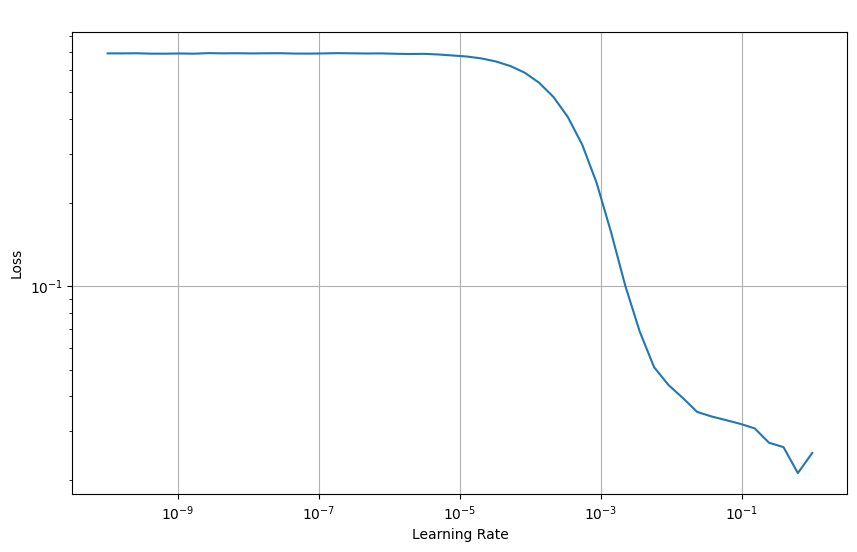

Lower bound: 5.43e-04
Upper bound: 6.25e-01


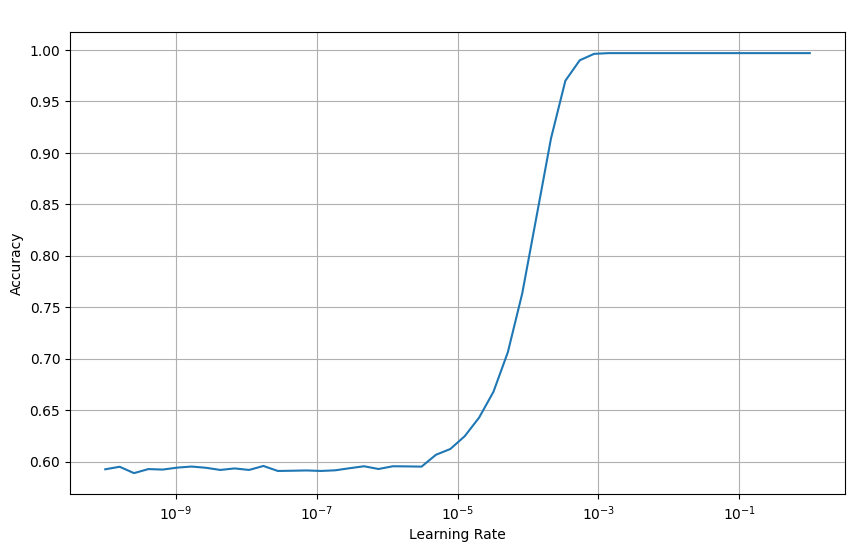

In [ ]:
#Adamax
best_lr_adamax = []
best_acc_adamax = []
best_loss_adamax = []
best_history_adamax = []
best_lrf_object_adamax = None
best_model_index_adamax = None

sequence_length = 43  # jumlah fitur (user)

for i in range(len(df.columns)):
    print(f"\n[Model ke-{i}]")

    # Siapkan fitur dan label
    feature = df.drop([df.columns[i]], axis=1).values
    label = df.iloc[:, i].values
    label = label.reshape(-1, 1, 1)
    label = np.repeat(label, sequence_length, axis=1)

    X_train, X_test, y_train, y_test = train_test_split(
        feature, label, test_size=0.4, random_state=42
    )

    # Buat model RNN
    model_adamax = tf.keras.Sequential([
        tf.keras.layers.SimpleRNN(64, return_sequences=True, input_shape=(X_train.shape[1], 1)),
        tf.keras.layers.SimpleRNN(64, return_sequences=True),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    # Inisialisasi learning rate finder
    lrf = lr_finder(model_adamax, begin_lr=1e-10, end_lr=1e0, num_epochs=50)
    lr_scheduler = LearningRateScheduler(lrf.lr_schedule)

    # Kompilasi model dengan initial learning rate
    model_adamax.compile(optimizer=Adamax(learning_rate=1e-4),  # nilai awal kecil
                     loss='binary_crossentropy',
                     metrics=['accuracy'])

    # Training model (output tetap ditampilkan)
    history_adamax = model_adamax.fit(
        X_train, y_train,
        epochs=50,
        batch_size=128,
        callbacks=[lr_scheduler],
        verbose=1  # tampilkan hasil evaluasi per epoch
    )

    # Update bound (wajib dilakukan sebelum ambil learning rate atau print bound)
    lrf.lr_plot(history_adamax.history['loss'], please_plot=False)
    print(f"[Model ke-{i}]")
    print(f"  ➤ Lower bound: {lrf.lower_bound:.2e}")
    print(f"  ➤ Upper bound: {lrf.upper_bound:.2e}")

    # Simpan metrik terbaik
    max_acc_index = np.argmax(history_adamax.history['accuracy'])
    max_accuracy = history_adamax.history['accuracy'][max_acc_index]
    min_loss = min(history_adamax.history['loss'])
    best_learning_rate = lrf.lr_vector(len(history_adamax.history['accuracy']))[max_acc_index]

    best_lr_adamax.append(best_learning_rate)
    best_acc_adamax.append(max_accuracy)
    best_loss_adamax.append(min_loss)
    best_history_adamax.append(history_adamax.history)

    # Simpan model dan lrf terbaik jika lebih baik dari sebelumnya
    if best_model_index_adamax is None or max_accuracy > best_acc_adamax[best_model_index_adamax]:
        best_model_index_adamax = i
        best_lrf_object_adamax = lrf

# =============================
# Setelah semua model dilatih
# =============================

print(f"\n🔍 Best learning rate based on highest training accuracy:")
print(f"Model ke-{best_model_index_adamax}")
print(f"Learning Rate: {best_lr_adamax[best_model_index_adamax]:.2e}")
print(f"Geometric Mean: {best_lrf_object_adamax.get_lr():.2e}")
print(f"Accuracy: {best_acc_adamax[best_model_index_adamax]:.4f}")
print(f"Loss: {best_loss_adamax[best_model_index_adamax]:.4f}")

# Tampilkan plot hanya untuk model terbaik
best_lrf_object_adamax.lr_plot(best_history_adamax[best_model_index_adamax]['loss'])
print(f"Lower bound: {best_lrf_object_adamax.lower_bound:.2e}")
print(f"Upper bound: {best_lrf_object_adamax.upper_bound:.2e}")
best_lrf_object_adamax.accuracy_plot(best_history_adamax[best_model_index_adamax]['accuracy'])


In [ ]:
print(best_lr_adamax[best_model_index_adamax])

0.001389495494373139


In [ ]:
all_accYZ = []
all_val_accYZ = []
all_lossYZ = []
all_val_lossYZ = []

precYZ = []
recYZ  = []
f1YZ   = []

sequence_length = 43  # kolom fitur (user)

# loop melalui kolom data frame
for i in range(len(df.columns)):
    feature = df.drop([df.columns[i]], axis=1).values
    label = df.iloc[:, i].values

    # reshape label agar sesuai dengan output
    label = label.reshape(-1, 1, 1)
    label = np.repeat(label, sequence_length, axis=1)

    X_train, X_test, y_train, y_test = train_test_split(
        feature, label, test_size=0.4, random_state=42
    )

    modelYZ = tf.keras.Sequential([
        tf.keras.layers.SimpleRNN(64, return_sequences=True, input_shape=(X_train.shape[1], 1)),
        tf.keras.layers.SimpleRNN(64, return_sequences=True),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    optimizer = Adamax(learning_rate=best_lr_adamax[best_model_index_adamax])

    modelYZ.compile(optimizer=optimizer,
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

    # train model
    historyYZ = modelYZ.fit(X_train, y_train,
                          epochs=30, batch_size=128,
                          validation_data=(X_test, y_test),
                          verbose=0)

    # predict model
    Y_pred = modelYZ.predict(X_test)
    Y_pred = (Y_pred >= 0.5).astype(int)
    y_test_reshaped = y_test.reshape(y_test.shape[0], -1, 1)

    all_accYZ.append(historyYZ.history['accuracy'])
    all_val_accYZ.append(historyYZ.history['val_accuracy'])
    all_lossYZ.append(historyYZ.history['loss'])
    all_val_lossYZ.append(historyYZ.history['val_loss'])

    prec = precision_score(y_test_reshaped[:, -1, :], Y_pred[:, -1, :], average='weighted')
    rec = recall_score(y_test_reshaped[:, -1, :], Y_pred[:, -1, :], average='weighted')
    f1 = f1_score(y_test_reshaped[:, -1, :],
                  Y_pred[:, -1, :], average='weighted')

    precYZ.append(prec)
    recYZ.append(rec)
    f1YZ.append(f1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
print("=====================================")
print("Average Accuracy: {}".format(np.mean(all_accYZ)))
print("Minimum Accuracy: {}".format(np.min(all_accYZ)))
print("Maximum Accuracy: {}".format(np.max(all_accYZ)))
print("=====================================")

print("=====================================")
print("Average Loss: {}".format(np.mean(all_lossYZ)))
print("Minimum Loss: {}".format(np.min(all_lossYZ)))
print("Maximum Loss: {}".format(np.max(all_lossYZ)))
print("=====================================")

print("=====================================")
print("Average Precision: {}".format(np.mean(precYZ)))
print("Minimum Precision: {}".format(np.min(precYZ)))
print("Maximum Precision: {}".format(np.max(precYZ)))
print("=====================================")

print("=====================================")
print("Average Recall: {}".format(np.mean(recYZ)))
print("Minimum Recall: {}".format(np.min(recYZ)))
print("Maximum Recall: {}".format(np.max(recYZ)))
print("=====================================")

print("=====================================")
print("Average F1-Score: {}".format(np.mean(f1YZ)))
print("Minimum F1-Score: {}".format(np.min(f1YZ)))
print("Maximum F1-Score: {}".format(np.max(f1YZ)))
print("=====================================")

Average Accuracy: 0.8584068394520066
Minimum Accuracy: 0.5334082841873169
Maximum Accuracy: 0.9969788789749146
Average Loss: 0.3706879812433864
Minimum Loss: 0.042592063546180725
Maximum Loss: 0.7179332971572876
Average Precision: 0.8114914767400432
Minimum Precision: 0.6368778280542986
Maximum Precision: 0.9909707008456011
Average Recall: 0.8557178116001644
Minimum Recall: 0.6742081447963801
Maximum Recall: 0.995475113122172
Average F1-Score: 0.8222909646575491
Minimum F1-Score: 0.6172692354239773
Maximum F1-Score: 0.993217799940489


# **SGD**


[Model ke-0]
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.6363 - loss: 0.6682 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.6349 - loss: 0.6668 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.6348 - loss: 0.6685 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.6327 - loss: 0.6696 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.6294 - loss: 0.6711 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.6315 - loss: 0.6686 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.6327 - loss: 0.6679 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.6286 - loss: 0.6715 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.6300 - loss: 0.6724 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.4149 - loss: 0.8408 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.4169 - loss: 0.8389 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.4154 - loss: 0.8382 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.4123 - loss: 0.8411 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.4146 - loss: 0.8398 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.4160 - loss: 0.8405 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.4150 - loss: 0.8385 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.4151 - loss: 0.8416 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.4155 - loss: 0.8416 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.6620 - loss: 0.6589 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.6652 - loss: 0.6569 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.6667 - loss: 0.6534 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.6646 - loss: 0.6559 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.6655 - loss: 0.6550 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.6679 - loss: 0.6513 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.6667 - loss: 0.6549 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.6573 - loss: 0.6604 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.6760 - loss: 0.6491 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.6453 - loss: 0.6605 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.6454 - loss: 0.6623 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.6328 - loss: 0.6669 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.6424 - loss: 0.6607 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.6418 - loss: 0.6646 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.6375 - loss: 0.6639 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.6456 - loss: 0.6621 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.6374 - loss: 0.6659 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.6434 - loss: 0.6641 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.4347 - loss: 0.8198 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.4361 - loss: 0.8184 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.4400 - loss: 0.8179 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.4318 - loss: 0.8228 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.4353 - loss: 0.8229 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.4259 - loss: 0.8219 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.4321 - loss: 0.8229 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.4348 - loss: 0.8207 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.4334 - loss: 0.8187 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.5103 - loss: 0.7392 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5102 - loss: 0.7391 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5105 - loss: 0.7369 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5033 - loss: 0.7425 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5070 - loss: 0.7388 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.5110 - loss: 0.7373 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5147 - loss: 0.7376 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5165 - loss: 0.7352 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.4987 - loss: 0.7407 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step - accuracy: 0.4005 - loss: 0.8096 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.4028 - loss: 0.8097 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.4025 - loss: 0.8088 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.4053 - loss: 0.8085 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.4016 - loss: 0.8108 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.4001 - loss: 0.8139 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.4008 - loss: 0.8115 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.3978 - loss: 0.8142 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.4004 - loss: 0.8104 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - accuracy: 0.4504 - loss: 0.7401 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.4462 - loss: 0.7416 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.4479 - loss: 0.7398 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.4524 - loss: 0.7390 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.4556 - loss: 0.7369 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.4603 - loss: 0.7399 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.4791 - loss: 0.7402 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.4936 - loss: 0.7414 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5164 - loss: 0.7399 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - accuracy: 0.5652 - loss: 0.7048 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.5664 - loss: 0.7042 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.5661 - loss: 0.7055 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.5670 - loss: 0.7048 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.5656 - loss: 0.7042 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.5695 - loss: 0.7041 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.5693 - loss: 0.7035 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.5682 - loss: 0.7041 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.5735 - loss: 0.6997 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.5098 - loss: 0.7299 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5057 - loss: 0.7326 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5022 - loss: 0.7309 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.4977 - loss: 0.7359 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.5027 - loss: 0.7355 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5041 - loss: 0.7317 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.5009 - loss: 0.7350 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5036 - loss: 0.7341 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.4999 - loss: 0.7329 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.4969 - loss: 0.7052 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.4986 - loss: 0.7032 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.4958 - loss: 0.7039 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.4929 - loss: 0.7051 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5008 - loss: 0.7027 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.4931 - loss: 0.7032 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.4979 - loss: 0.7052 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.4937 - loss: 0.7058 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.4970 - loss: 0.7038 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.3022 - loss: 0.8868 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.3045 - loss: 0.8853 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.3029 - loss: 0.8862 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.3104 - loss: 0.8838 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.3083 - loss: 0.8862 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.3070 - loss: 0.8841 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.3064 - loss: 0.8862 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.3045 - loss: 0.8852 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.2983 - loss: 0.8875 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.5537 - loss: 0.7140 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5539 - loss: 0.7124 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5563 - loss: 0.7128 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5556 - loss: 0.7133 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5517 - loss: 0.7123 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5560 - loss: 0.7127 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5589 - loss: 0.7131 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5567 - loss: 0.7129 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5603 - loss: 0.7115 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.5133 - loss: 0.7426 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5188 - loss: 0.7391 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5166 - loss: 0.7397 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5164 - loss: 0.7408 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.5196 - loss: 0.7399 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5171 - loss: 0.7416 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.5181 - loss: 0.7383 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5170 - loss: 0.7398 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.5213 - loss: 0.7385 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.4539 - loss: 0.7312 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.4584 - loss: 0.7315 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.4662 - loss: 0.7286 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.4545 - loss: 0.7317 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.4528 - loss: 0.7336 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.4618 - loss: 0.7309 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.4573 - loss: 0.7313 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.4459 - loss: 0.7328 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.4514 - loss: 0.7306 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.5139 - loss: 0.7090 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5159 - loss: 0.7091 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5172 - loss: 0.7077 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.5202 - loss: 0.7058 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5207 - loss: 0.7067 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5165 - loss: 0.7052 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5124 - loss: 0.7082 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5105 - loss: 0.7074 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5195 - loss: 0.7075 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.3642 - loss: 0.8814 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.3692 - loss: 0.8741 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.3541 - loss: 0.8862 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.3556 - loss: 0.8873 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.3569 - loss: 0.8833 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.3568 - loss: 0.8837 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.3663 - loss: 0.8802 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.3561 - loss: 0.8849 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.3568 - loss: 0.8858 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.5516 - loss: 0.7092 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5329 - loss: 0.7160 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5508 - loss: 0.7084 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5486 - loss: 0.7100 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5552 - loss: 0.7083 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5495 - loss: 0.7090 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5602 - loss: 0.7068 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5491 - loss: 0.7115 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5555 - loss: 0.7080 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.5804 - loss: 0.6893 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5855 - loss: 0.6860 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5837 - loss: 0.6868 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5770 - loss: 0.6894 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5826 - loss: 0.6882 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5870 - loss: 0.6868 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5877 - loss: 0.6853 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.5792 - loss: 0.6872 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5790 - loss: 0.6881 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - accuracy: 0.5485 - loss: 0.7359 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.5517 - loss: 0.7344 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.5440 - loss: 0.7364 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.5568 - loss: 0.7345 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.5503 - loss: 0.7371 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.5455 - loss: 0.7383 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5526 - loss: 0.7363 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.5568 - loss: 0.7340 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5523 - loss: 0.7357 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - accuracy: 0.4213 - loss: 0.8130 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.4209 - loss: 0.8118 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.4185 - loss: 0.8135 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.4210 - loss: 0.8118 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.4134 - loss: 0.8168 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.4172 - loss: 0.8112 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.4217 - loss: 0.8107 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.4239 - loss: 0.8093 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.4185 - loss: 0.8123 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - accuracy: 0.4915 - loss: 0.7755 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.4871 - loss: 0.7765 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.4959 - loss: 0.7734 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.4850 - loss: 0.7758 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.4913 - loss: 0.7759 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.4841 - loss: 0.7760 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.4863 - loss: 0.7758 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.4883 - loss: 0.7751 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.4925 - loss: 0.7759 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - accuracy: 0.5385 - loss: 0.7126 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.5367 - loss: 0.7131 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.5452 - loss: 0.7112 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.5373 - loss: 0.7132 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.5438 - loss: 0.7125 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.5403 - loss: 0.7119 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.5393 - loss: 0.7130 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.5453 - loss: 0.7108 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.5395 - loss: 0.7134 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - accuracy: 0.4317 - loss: 0.7910 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.4392 - loss: 0.7867 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.4373 - loss: 0.7867 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.4391 - loss: 0.7888 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.4386 - loss: 0.7871 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.4340 - loss: 0.7897 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.4406 - loss: 0.7872 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.4301 - loss: 0.7922 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.4465 - loss: 0.7847 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.6291 - loss: 0.6808 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.6280 - loss: 0.6819 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.6368 - loss: 0.6798 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.6345 - loss: 0.6774 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.6381 - loss: 0.6762 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.6429 - loss: 0.6753 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.6291 - loss: 0.6795 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.6463 - loss: 0.6694 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.6385 - loss: 0.6801 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - accuracy: 0.6631 - loss: 0.6454 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.6731 - loss: 0.6404 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.6705 - loss: 0.6430 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.6665 - loss: 0.6435 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.6711 - loss: 0.6435 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.6752 - loss: 0.6419 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.6748 - loss: 0.6417 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.6720 - loss: 0.6441 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.6745 - loss: 0.6410 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.6277 - loss: 0.6722 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.6341 - loss: 0.6710 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.6305 - loss: 0.6715 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.6315 - loss: 0.6724 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.6361 - loss: 0.6710 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.6323 - loss: 0.6711 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.6236 - loss: 0.6723 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.6286 - loss: 0.6713 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.6253 - loss: 0.6731 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.4736 - loss: 0.7676 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.4744 - loss: 0.7684 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.4819 - loss: 0.7682 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.4727 - loss: 0.7692 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.4764 - loss: 0.7658 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.4737 - loss: 0.7687 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.4761 - loss: 0.7677 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.4761 - loss: 0.7662 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.4732 - loss: 0.7706 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.4714 - loss: 0.7600 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.4714 - loss: 0.7589 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.4675 - loss: 0.7618 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.4697 - loss: 0.7591 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.4729 - loss: 0.7577 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.4693 - loss: 0.7578 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.4733 - loss: 0.7587 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.4712 - loss: 0.7601 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.4709 - loss: 0.7611 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.5315 - loss: 0.7398 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.5286 - loss: 0.7401 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5266 - loss: 0.7389 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.5325 - loss: 0.7392 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.5277 - loss: 0.7397 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.5285 - loss: 0.7378 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.5237 - loss: 0.7401 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5305 - loss: 0.7380 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5234 - loss: 0.7418 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.6048 - loss: 0.6844 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.6102 - loss: 0.6841 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.6065 - loss: 0.6866 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.6052 - loss: 0.6856 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.6063 - loss: 0.6847 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.6089 - loss: 0.6839 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5981 - loss: 0.6857 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.6057 - loss: 0.6854 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.6038 - loss: 0.6878 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.6243 - loss: 0.6800 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.6350 - loss: 0.6782 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.6303 - loss: 0.6789 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.6279 - loss: 0.6783 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.6234 - loss: 0.6802 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.6235 - loss: 0.6811 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.6243 - loss: 0.6798 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.6243 - loss: 0.6806 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.6276 - loss: 0.6786 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.4702 - loss: 0.7959 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.4760 - loss: 0.7910 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.4794 - loss: 0.7878 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.4743 - loss: 0.7895 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.4750 - loss: 0.7929 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.4760 - loss: 0.7888 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.4775 - loss: 0.7864 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.4801 - loss: 0.7878 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.4784 - loss: 0.7849 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.4974 - loss: 0.7439 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.4944 - loss: 0.7482 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.4896 - loss: 0.7458 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.4974 - loss: 0.7448 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.4942 - loss: 0.7420 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.5006 - loss: 0.7397 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.4972 - loss: 0.7428 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.4920 - loss: 0.7443 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.4975 - loss: 0.7433 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.3599 - loss: 0.8456 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.3524 - loss: 0.8492 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.3555 - loss: 0.8521 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.3525 - loss: 0.8496 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.3576 - loss: 0.8478 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.3505 - loss: 0.8501 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.3601 - loss: 0.8481 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.3524 - loss: 0.8491 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.3524 - loss: 0.8514 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.4676 - loss: 0.7656 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.4590 - loss: 0.7693 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.4638 - loss: 0.7678 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.4672 - loss: 0.7668 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.4585 - loss: 0.7698 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.4653 - loss: 0.7696 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.4652 - loss: 0.7696 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.4632 - loss: 0.7696 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.4645 - loss: 0.7673 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.7382 - loss: 0.6125 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.7309 - loss: 0.6192 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.7335 - loss: 0.6147 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.7256 - loss: 0.6178 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7372 - loss: 0.6136 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7282 - loss: 0.6165 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.7290 - loss: 0.6177 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.7373 - loss: 0.6122 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.7344 - loss: 0.6157 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.5310 - loss: 0.7483 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.5407 - loss: 0.7449 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.5333 - loss: 0.7458 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.5392 - loss: 0.7441 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5407 - loss: 0.7431 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5365 - loss: 0.7466 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.5347 - loss: 0.7463 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5369 - loss: 0.7467 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.5390 - loss: 0.7432 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.6188 - loss: 0.6794 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.6196 - loss: 0.6805 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.6184 - loss: 0.6793 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.6124 - loss: 0.6830 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.6180 - loss: 0.6814 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.6182 - loss: 0.6814 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.6147 - loss: 0.6841 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.6221 - loss: 0.6808 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.6211 - loss: 0.6838 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.6014 - loss: 0.6994 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.6035 - loss: 0.6975 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.6012 - loss: 0.6969 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5979 - loss: 0.6999 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5980 - loss: 0.6991 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.6010 - loss: 0.6972 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.6022 - loss: 0.6983 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.6046 - loss: 0.6971 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.5998 - loss: 0.6984 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.5422 - loss: 0.7319 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.5403 - loss: 0.7319 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5383 - loss: 0.7319 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.5413 - loss: 0.7312 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.5449 - loss: 0.7300 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5423 - loss: 0.7295 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5409 - loss: 0.7310 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5407 - loss: 0.7315 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.5416 - loss: 0.7312 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.5608 - loss: 0.7192 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.5626 - loss: 0.7191 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.5604 - loss: 0.7199 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.5721 - loss: 0.7193 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5637 - loss: 0.7175 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5646 - loss: 0.7177 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5649 - loss: 0.7180 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.5606 - loss: 0.7204 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5692 - loss: 0.7181 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.4182 - loss: 0.7914 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.4168 - loss: 0.7902 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.4131 - loss: 0.7918 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.4184 - loss: 0.7918 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.4178 - loss: 0.7920 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.4202 - loss: 0.7912 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.4146 - loss: 0.7950 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.4098 - loss: 0.7940 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.4145 - loss: 0.7942 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.7069 - loss: 0.6334 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.7090 - loss: 0.6309 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.7067 - loss: 0.6321 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.7101 - loss: 0.6307 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.7120 - loss: 0.6298 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7061 - loss: 0.6337 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.7066 - loss: 0.6316 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.7156 - loss: 0.6283 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.7122 - loss: 0.6305 - learning_rate: 4.2919e-09
Epoch 10/50


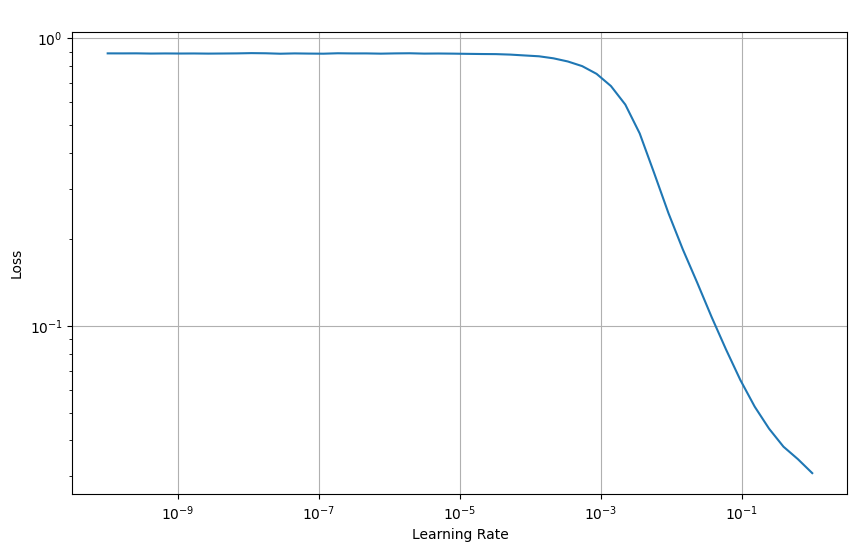

Lower bound: 3.56e-03
Upper bound: 1.00e+00


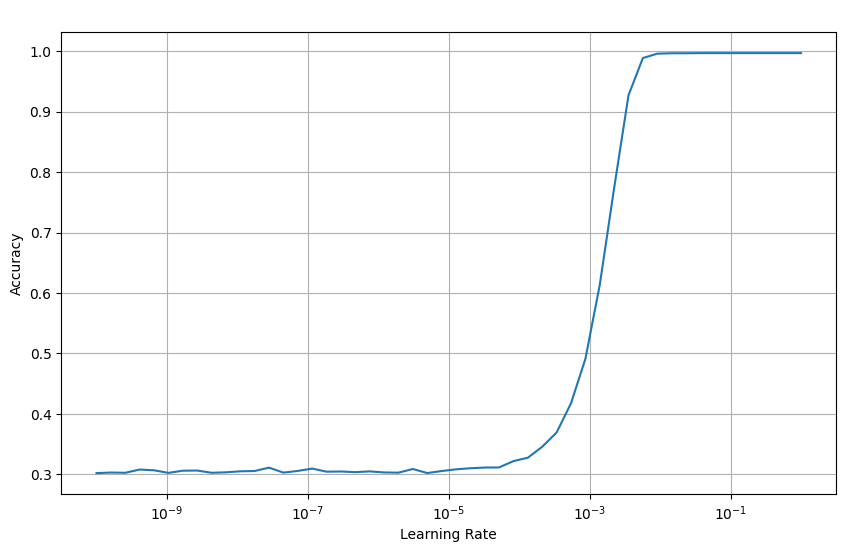

In [ ]:
#SGD
best_lr_sgd = []
best_acc_sgd = []
best_loss_sgd = []
best_history_sgd = []
best_lrf_object_sgd = None
best_model_index_sgd = None

sequence_length = 43  # jumlah fitur (user)

for i in range(len(df.columns)):
    print(f"\n[Model ke-{i}]")

    # Siapkan fitur dan label
    feature = df.drop([df.columns[i]], axis=1).values
    label = df.iloc[:, i].values
    label = label.reshape(-1, 1, 1)
    label = np.repeat(label, sequence_length, axis=1)

    X_train, X_test, y_train, y_test = train_test_split(
        feature, label, test_size=0.4, random_state=42
    )

    # Buat model RNN
    model_sgd = tf.keras.Sequential([
        tf.keras.layers.SimpleRNN(64, return_sequences=True, input_shape=(X_train.shape[1], 1)),
        tf.keras.layers.SimpleRNN(64, return_sequences=True),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    # Inisialisasi learning rate finder
    lrf = lr_finder(model_sgd, begin_lr=1e-10, end_lr=1e0, num_epochs=50)
    lr_scheduler = LearningRateScheduler(lrf.lr_schedule)

    # Kompilasi model dengan initial learning rate
    model_sgd.compile(optimizer=SGD(learning_rate=1e-4),  # nilai awal kecil
                     loss='binary_crossentropy',
                     metrics=['accuracy'])

    # Training model (output tetap ditampilkan)
    history_sgd = model_sgd.fit(
        X_train, y_train,
        epochs=50,
        batch_size=128,
        callbacks=[lr_scheduler],
        verbose=1  # tampilkan hasil evaluasi per epoch
    )

    # Update bound (wajib dilakukan sebelum ambil learning rate atau print bound)
    lrf.lr_plot(history_sgd.history['loss'], please_plot=False)
    print(f"[Model ke-{i}]")
    print(f"  ➤ Lower bound: {lrf.lower_bound:.2e}")
    print(f"  ➤ Upper bound: {lrf.upper_bound:.2e}")

    # Simpan metrik terbaik
    max_acc_index = np.argmax(history_sgd.history['accuracy'])
    max_accuracy = history_sgd.history['accuracy'][max_acc_index]
    min_loss = min(history_sgd.history['loss'])
    best_learning_rate = lrf.lr_vector(len(history_sgd.history['accuracy']))[max_acc_index]

    best_lr_sgd.append(best_learning_rate)
    best_acc_sgd.append(max_accuracy)
    best_loss_sgd.append(min_loss)
    best_history_sgd.append(history_sgd.history)

    # Simpan model dan lrf terbaik jika lebih baik dari sebelumnya
    if best_model_index_sgd is None or max_accuracy > best_acc_sgd[best_model_index_sgd]:
        best_model_index_sgd = i
        best_lrf_object_sgd = lrf

# =============================
# Setelah semua model dilatih
# =============================

print(f"\n🔍 Best learning rate based on highest training accuracy:")
print(f"Model ke-{best_model_index_sgd}")
print(f"Learning Rate: {best_lr_sgd[best_model_index_sgd]:.2e}")
print(f"Geometric Mean: {best_lrf_object_sgd.get_lr():.2e}")
print(f"Accuracy: {best_acc_sgd[best_model_index_sgd]:.4f}")
print(f"Loss: {best_loss_sgd[best_model_index_sgd]:.4f}")

# Tampilkan plot hanya untuk model terbaik
best_lrf_object_sgd.lr_plot(best_history_sgd[best_model_index_sgd]['loss'])
print(f"Lower bound: {best_lrf_object_sgd.lower_bound:.2e}")
print(f"Upper bound: {best_lrf_object_sgd.upper_bound:.2e}")
best_lrf_object_sgd.accuracy_plot(best_history_sgd[best_model_index_sgd]['accuracy'])


In [ ]:
print(best_lr_sgd[best_model_index_sgd])

0.03727593720314938


In [ ]:
all_accXZ = []
all_val_accXZ = []
all_lossXZ = []
all_val_lossXZ = []

precXZ = []
recXZ  = []
f1XZ   = []

sequence_length = 43  # kolom fitur (user)

# loop melalui kolom data frame
for i in range(len(df.columns)):
    feature = df.drop([df.columns[i]], axis=1).values
    label = df.iloc[:, i].values

    # reshape label agar sesuai dengan output
    label = label.reshape(-1, 1, 1)
    label = np.repeat(label, sequence_length, axis=1)

    X_train, X_test, y_train, y_test = train_test_split(
        feature, label, test_size=0.4, random_state=42
    )

    modelXZ = tf.keras.Sequential([
        tf.keras.layers.SimpleRNN(64, return_sequences=True, input_shape=(X_train.shape[1], 1)),
        tf.keras.layers.SimpleRNN(64, return_sequences=True),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    optimizer = SGD(learning_rate=best_lr_sgd[best_model_index_sgd])

    modelXZ.compile(optimizer=optimizer,
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

    # train model
    historyXZ = modelXZ.fit(X_train, y_train,
                          epochs=30, batch_size=128,
                          validation_data=(X_test, y_test),
                          verbose=0)

    # predict model
    Y_pred = modelXZ.predict(X_test)
    Y_pred = (Y_pred >= 0.5).astype(int)
    y_test_reshaped = y_test.reshape(y_test.shape[0], -1, 1)

    all_accXZ.append(historyXZ.history['accuracy'])
    all_val_accXZ.append(historyXZ.history['val_accuracy'])
    all_lossXZ.append(historyXZ.history['loss'])
    all_val_lossXZ.append(historyXZ.history['val_loss'])

    prec = precision_score(y_test_reshaped[:, -1, :], Y_pred[:, -1, :], average='weighted')
    rec = recall_score(y_test_reshaped[:, -1, :], Y_pred[:, -1, :], average='weighted')
    f1 = f1_score(y_test_reshaped[:, -1, :],
                  Y_pred[:, -1, :], average='weighted')

    precXZ.append(prec)
    recXZ.append(rec)
    f1XZ.append(f1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
print("=====================================")
print("Average Accuracy: {}".format(np.mean(all_accXZ)))
print("Minimum Accuracy: {}".format(np.min(all_accXZ)))
print("Maximum Accuracy: {}".format(np.max(all_accXZ)))
print("=====================================")

print("=====================================")
print("Average Loss: {}".format(np.mean(all_lossXZ)))
print("Minimum Loss: {}".format(np.min(all_lossXZ)))
print("Maximum Loss: {}".format(np.max(all_lossXZ)))
print("=====================================")

print("=====================================")
print("Average Precision: {}".format(np.mean(precXZ)))
print("Minimum Precision: {}".format(np.min(precXZ)))
print("Maximum Precision: {}".format(np.max(precXZ)))
print("=====================================")

print("=====================================")
print("Average Recall: {}".format(np.mean(recXZ)))
print("Minimum Recall: {}".format(np.min(recXZ)))
print("Maximum Recall: {}".format(np.max(recXZ)))
print("=====================================")

print("=====================================")
print("Average F1-Score: {}".format(np.mean(f1XZ)))
print("Minimum F1-Score: {}".format(np.min(f1XZ)))
print("Maximum F1-Score: {}".format(np.max(f1XZ)))
print("=====================================")

Average Accuracy: 0.8509070910964951
Minimum Accuracy: 0.49385231733322144
Maximum Accuracy: 0.9969788789749146
Average Loss: 0.3699902322453757
Minimum Loss: 0.03541363403201103
Maximum Loss: 0.7476791143417358
Average Precision: 0.8073426742494688
Minimum Precision: 0.6061146109637489
Maximum Precision: 0.9909707008456011
Average Recall: 0.8464623611682434
Minimum Recall: 0.6108597285067874
Maximum Recall: 0.995475113122172
Average F1-Score: 0.8094870392748632
Minimum F1-Score: 0.48875704127804964
Maximum F1-Score: 0.993217799940489


# **RMSPROP**


[Model ke-0]
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.8234 - loss: 0.5226 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.8250 - loss: 0.5246 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.8300 - loss: 0.5191 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.8261 - loss: 0.5196 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.8260 - loss: 0.5248 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.8273 - loss: 0.5200 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.8234 - loss: 0.5226 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.8203 - loss: 0.5273 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.8315 - loss: 0.5161 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.5116 - loss: 0.7810 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5017 - loss: 0.7864 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5037 - loss: 0.7837 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.4984 - loss: 0.7876 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.5011 - loss: 0.7853 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.4958 - loss: 0.7895 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5081 - loss: 0.7848 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5022 - loss: 0.7854 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5098 - loss: 0.7848 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.5001 - loss: 0.7475 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.5026 - loss: 0.7454 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5008 - loss: 0.7466 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5069 - loss: 0.7414 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.4971 - loss: 0.7479 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.4986 - loss: 0.7465 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.4909 - loss: 0.7478 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.4964 - loss: 0.7453 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5002 - loss: 0.7445 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.6095 - loss: 0.6783 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.6029 - loss: 0.6829 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.6117 - loss: 0.6779 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.6156 - loss: 0.6749 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.6157 - loss: 0.6799 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.6085 - loss: 0.6784 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5972 - loss: 0.6832 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.6165 - loss: 0.6777 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.6161 - loss: 0.6776 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.4732 - loss: 0.7767 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.4738 - loss: 0.7762 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.4732 - loss: 0.7737 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.4722 - loss: 0.7747 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.4706 - loss: 0.7745 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.4729 - loss: 0.7772 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.4767 - loss: 0.7743 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.4742 - loss: 0.7758 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.4749 - loss: 0.7755 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.4995 - loss: 0.7238 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5099 - loss: 0.7210 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.5090 - loss: 0.7206 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5016 - loss: 0.7237 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5037 - loss: 0.7235 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5070 - loss: 0.7230 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5031 - loss: 0.7232 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5041 - loss: 0.7233 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.5010 - loss: 0.7233 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.4022 - loss: 0.8050 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.4072 - loss: 0.8027 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.3989 - loss: 0.8074 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.3997 - loss: 0.8059 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.3989 - loss: 0.8044 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.4026 - loss: 0.8050 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.3991 - loss: 0.8079 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.4036 - loss: 0.8051 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.4033 - loss: 0.8069 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.4703 - loss: 0.7077 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.4836 - loss: 0.7058 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.4919 - loss: 0.7084 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5144 - loss: 0.7063 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5307 - loss: 0.7066 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5533 - loss: 0.7071 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5678 - loss: 0.7067 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5770 - loss: 0.7086 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5913 - loss: 0.7042 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.4745 - loss: 0.7944 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.4758 - loss: 0.7926 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.4699 - loss: 0.7924 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.4643 - loss: 0.7989 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.4734 - loss: 0.7963 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.4699 - loss: 0.7988 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.4778 - loss: 0.7958 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.4738 - loss: 0.7912 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.4682 - loss: 0.7954 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.5120 - loss: 0.7208 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5139 - loss: 0.7184 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5124 - loss: 0.7199 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5094 - loss: 0.7195 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5092 - loss: 0.7225 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5109 - loss: 0.7202 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.5185 - loss: 0.7205 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5079 - loss: 0.7234 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5048 - loss: 0.7212 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.4904 - loss: 0.7077 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.4880 - loss: 0.7059 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.4944 - loss: 0.7053 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.4928 - loss: 0.7080 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5094 - loss: 0.7069 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5138 - loss: 0.7083 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5256 - loss: 0.7067 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5340 - loss: 0.7062 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5327 - loss: 0.7065 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.5467 - loss: 0.7240 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.5411 - loss: 0.7260 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5470 - loss: 0.7244 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5455 - loss: 0.7233 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.5466 - loss: 0.7229 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.5465 - loss: 0.7227 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5461 - loss: 0.7254 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5440 - loss: 0.7248 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.5488 - loss: 0.7231 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.5478 - loss: 0.7293 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5507 - loss: 0.7296 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5458 - loss: 0.7296 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5455 - loss: 0.7301 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5469 - loss: 0.7294 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.5441 - loss: 0.7304 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5493 - loss: 0.7280 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5458 - loss: 0.7286 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5444 - loss: 0.7271 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - accuracy: 0.9095 - loss: 0.4772 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.9115 - loss: 0.4758 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.9117 - loss: 0.4789 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.9072 - loss: 0.4785 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.9035 - loss: 0.4832 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.9157 - loss: 0.4752 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.9088 - loss: 0.4826 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.9154 - loss: 0.4724 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.9205 - loss: 0.4691 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - accuracy: 0.4926 - loss: 0.7089 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.4932 - loss: 0.7090 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.4910 - loss: 0.7091 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.4883 - loss: 0.7091 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.4866 - loss: 0.7087 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.4905 - loss: 0.7107 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.4999 - loss: 0.7092 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5005 - loss: 0.7096 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5064 - loss: 0.7110 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - accuracy: 0.4704 - loss: 0.7491 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.4658 - loss: 0.7495 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.4652 - loss: 0.7456 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.4697 - loss: 0.7471 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.4633 - loss: 0.7489 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.4665 - loss: 0.7482 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.4686 - loss: 0.7487 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.4763 - loss: 0.7478 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.4768 - loss: 0.7492 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step - accuracy: 0.3419 - loss: 0.9902 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.3409 - loss: 0.9922 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.3388 - loss: 0.9919 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.3453 - loss: 0.9918 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.3441 - loss: 0.9918 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.3470 - loss: 0.9893 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.3486 - loss: 0.9834 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.3371 - loss: 0.9984 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.3465 - loss: 0.9882 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - accuracy: 0.5229 - loss: 0.7631 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.5198 - loss: 0.7637 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.5195 - loss: 0.7655 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.5180 - loss: 0.7617 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.5177 - loss: 0.7621 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.5211 - loss: 0.7605 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.5215 - loss: 0.7594 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.5262 - loss: 0.7588 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5185 - loss: 0.7641 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - accuracy: 0.5433 - loss: 0.7200 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.5393 - loss: 0.7219 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.5381 - loss: 0.7224 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.5395 - loss: 0.7218 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.5420 - loss: 0.7223 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5419 - loss: 0.7190 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5405 - loss: 0.7223 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5390 - loss: 0.7206 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5390 - loss: 0.7217 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - accuracy: 0.5683 - loss: 0.7079 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.5736 - loss: 0.7071 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.5758 - loss: 0.7069 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5694 - loss: 0.7099 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5702 - loss: 0.7087 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.5660 - loss: 0.7087 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5717 - loss: 0.7054 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.5686 - loss: 0.7079 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5587 - loss: 0.7111 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.6235 - loss: 0.6715 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.6236 - loss: 0.6732 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.6267 - loss: 0.6689 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.6242 - loss: 0.6705 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.6247 - loss: 0.6705 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.6276 - loss: 0.6687 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.6236 - loss: 0.6718 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.6249 - loss: 0.6719 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.6210 - loss: 0.6720 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.5415 - loss: 0.7172 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5385 - loss: 0.7196 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5452 - loss: 0.7172 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5374 - loss: 0.7197 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5352 - loss: 0.7190 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.5329 - loss: 0.7198 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.5417 - loss: 0.7183 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.5388 - loss: 0.7198 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5382 - loss: 0.7189 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.6285 - loss: 0.6748 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.6344 - loss: 0.6708 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.6377 - loss: 0.6697 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.6356 - loss: 0.6708 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.6276 - loss: 0.6728 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.6268 - loss: 0.6734 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.6262 - loss: 0.6734 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.6296 - loss: 0.6732 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.6390 - loss: 0.6690 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.4617 - loss: 0.7712 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.4624 - loss: 0.7717 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.4529 - loss: 0.7755 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.4548 - loss: 0.7725 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.4583 - loss: 0.7732 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.4573 - loss: 0.7752 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.4571 - loss: 0.7736 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.4590 - loss: 0.7738 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.4574 - loss: 0.7741 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.5502 - loss: 0.7223 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5498 - loss: 0.7233 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5557 - loss: 0.7239 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5512 - loss: 0.7220 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5500 - loss: 0.7233 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5547 - loss: 0.7230 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5508 - loss: 0.7239 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.5580 - loss: 0.7220 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5482 - loss: 0.7234 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.6724 - loss: 0.6471 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.6757 - loss: 0.6473 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.6685 - loss: 0.6503 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.6765 - loss: 0.6469 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.6699 - loss: 0.6494 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.6756 - loss: 0.6461 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.6752 - loss: 0.6488 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.6747 - loss: 0.6463 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.6716 - loss: 0.6496 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.8616 - loss: 0.5336 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.8600 - loss: 0.5343 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.8614 - loss: 0.5353 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.8692 - loss: 0.5273 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.8618 - loss: 0.5328 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.8570 - loss: 0.5374 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.8679 - loss: 0.5280 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.8595 - loss: 0.5332 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.8631 - loss: 0.5294 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.4840 - loss: 0.7487 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.4924 - loss: 0.7455 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.4868 - loss: 0.7454 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.4816 - loss: 0.7484 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.4780 - loss: 0.7490 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.4782 - loss: 0.7473 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.4621 - loss: 0.7515 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.4665 - loss: 0.7509 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.4605 - loss: 0.7500 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.5405 - loss: 0.7233 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.5436 - loss: 0.7226 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5429 - loss: 0.7229 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5369 - loss: 0.7240 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.5364 - loss: 0.7256 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5361 - loss: 0.7254 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.5393 - loss: 0.7250 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.5348 - loss: 0.7242 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.5388 - loss: 0.7249 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.5488 - loss: 0.7142 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.5517 - loss: 0.7144 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.5526 - loss: 0.7136 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.5562 - loss: 0.7115 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5546 - loss: 0.7126 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5512 - loss: 0.7144 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.5524 - loss: 0.7145 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5542 - loss: 0.7133 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.5590 - loss: 0.7117 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.5321 - loss: 0.7249 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.5372 - loss: 0.7217 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.5443 - loss: 0.7157 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.5318 - loss: 0.7222 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.5391 - loss: 0.7209 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.5318 - loss: 0.7259 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5359 - loss: 0.7195 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5414 - loss: 0.7182 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.5359 - loss: 0.7228 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - accuracy: 0.7847 - loss: 0.5625 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.7795 - loss: 0.5687 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.7777 - loss: 0.5692 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7758 - loss: 0.5703 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.7817 - loss: 0.5654 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.7752 - loss: 0.5681 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.7804 - loss: 0.5677 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.7802 - loss: 0.5681 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.7800 - loss: 0.5676 - learning_rate: 4.2919e-09
E

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.4998 - loss: 0.7492 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.5076 - loss: 0.7466 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.5011 - loss: 0.7498 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.4989 - loss: 0.7495 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.5054 - loss: 0.7485 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.4964 - loss: 0.7502 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.5069 - loss: 0.7489 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.5037 - loss: 0.7505 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.5018 - loss: 0.7490 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.5565 - loss: 0.7196 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5589 - loss: 0.7177 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5565 - loss: 0.7177 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.5594 - loss: 0.7173 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5568 - loss: 0.7178 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5568 - loss: 0.7145 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5522 - loss: 0.7211 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5605 - loss: 0.7176 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.5533 - loss: 0.7208 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.6767 - loss: 0.6427 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.6741 - loss: 0.6427 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.6770 - loss: 0.6444 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.6762 - loss: 0.6418 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.6754 - loss: 0.6422 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.6654 - loss: 0.6478 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.6772 - loss: 0.6444 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.6764 - loss: 0.6430 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.6728 - loss: 0.6439 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.6348 - loss: 0.6741 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.6308 - loss: 0.6778 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.6340 - loss: 0.6743 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.6338 - loss: 0.6729 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.6296 - loss: 0.6744 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.6348 - loss: 0.6736 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.6277 - loss: 0.6763 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.6374 - loss: 0.6722 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.6455 - loss: 0.6701 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.4928 - loss: 0.7687 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.4983 - loss: 0.7671 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.4970 - loss: 0.7672 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.4980 - loss: 0.7683 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.4950 - loss: 0.7672 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.4944 - loss: 0.7699 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.4953 - loss: 0.7706 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.4979 - loss: 0.7671 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.4957 - loss: 0.7688 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - accuracy: 0.3819 - loss: 0.8252 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.3729 - loss: 0.8265 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.3845 - loss: 0.8241 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.3799 - loss: 0.8277 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.3764 - loss: 0.8251 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.3684 - loss: 0.8284 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.3753 - loss: 0.8276 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.3849 - loss: 0.8221 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.3725 - loss: 0.8267 - learning_rate: 4.2919e-09
E

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - accuracy: 0.6013 - loss: 0.6884 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.6037 - loss: 0.6876 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.6042 - loss: 0.6889 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.6076 - loss: 0.6862 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.6106 - loss: 0.6856 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.6085 - loss: 0.6861 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.6001 - loss: 0.6879 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.6086 - loss: 0.6872 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.6025 - loss: 0.6876 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - accuracy: 0.6780 - loss: 0.6573 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.6861 - loss: 0.6549 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.6838 - loss: 0.6551 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.6840 - loss: 0.6549 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.6786 - loss: 0.6579 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.6821 - loss: 0.6561 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.6848 - loss: 0.6550 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.6816 - loss: 0.6575 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.6767 - loss: 0.6592 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 89ms/step - accuracy: 0.5312 - loss: 0.7227 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.5362 - loss: 0.7228 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.5345 - loss: 0.7197 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.5332 - loss: 0.7233 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.5303 - loss: 0.7227 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.5329 - loss: 0.7216 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.5314 - loss: 0.7207 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.5319 - loss: 0.7207 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.5289 - loss: 0.7236 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - accuracy: 0.3417 - loss: 0.8410 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.3424 - loss: 0.8443 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.3339 - loss: 0.8470 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.3271 - loss: 0.8501 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.3280 - loss: 0.8510 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.3315 - loss: 0.8487 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.3346 - loss: 0.8473 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.3339 - loss: 0.8487 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.3377 - loss: 0.8455 - learning_rate: 4.2919e-09
E

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.6912 - loss: 0.6324 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.6948 - loss: 0.6303 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.6993 - loss: 0.6301 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.6976 - loss: 0.6281 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.7062 - loss: 0.6256 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.7019 - loss: 0.6255 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.6923 - loss: 0.6327 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.6935 - loss: 0.6296 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.6974 - loss: 0.6287 - learning_rate: 4.2919e-09
Epoch 10/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.4488 - loss: 0.7720 - learning_rate: 1.0000e-10
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.4520 - loss: 0.7714 - learning_rate: 1.5999e-10
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.4501 - loss: 0.7719 - learning_rate: 2.5595e-10
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.4488 - loss: 0.7732 - learning_rate: 4.0949e-10
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.4464 - loss: 0.7713 - learning_rate: 6.5513e-10
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.4497 - loss: 0.7707 - learning_rate: 1.0481e-09
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.4430 - loss: 0.7705 - learning_rate: 1.6768e-09
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.4486 - loss: 0.7716 - learning_rate: 2.6827e-09
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - accuracy: 0.4460 - loss: 0.7705 - learning_rate: 4.2919e-09
Epoch 10/50

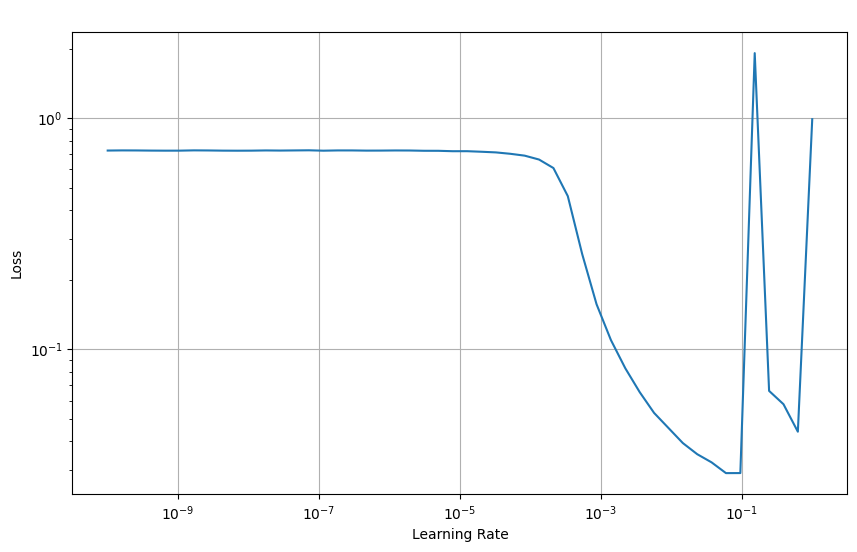

Lower bound: 5.96e-02
Upper bound: 1.53e-01


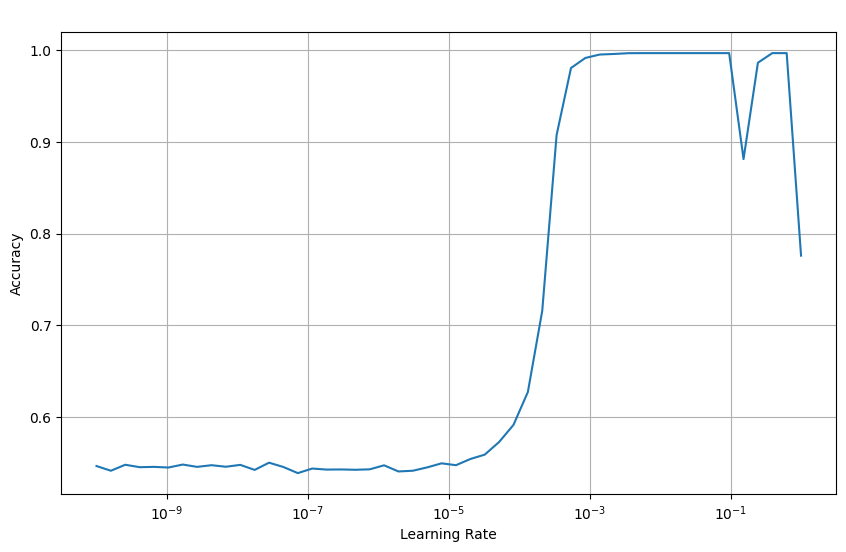

In [ ]:
#RMSP
best_lr_rmsp = []
best_acc_rmsp = []
best_loss_rmsp = []
best_history_rmsp = []
best_lrf_object_rmsp = None
best_model_index_rmsp = None

sequence_length = 43  # jumlah fitur (user)

for i in range(len(df.columns)):
    print(f"\n[Model ke-{i}]")

    # Siapkan fitur dan label
    feature = df.drop([df.columns[i]], axis=1).values
    label = df.iloc[:, i].values
    label = label.reshape(-1, 1, 1)
    label = np.repeat(label, sequence_length, axis=1)

    X_train, X_test, y_train, y_test = train_test_split(
        feature, label, test_size=0.4, random_state=42
    )

    # Buat model RNN
    model_rmsp = tf.keras.Sequential([
        tf.keras.layers.SimpleRNN(64, return_sequences=True, input_shape=(X_train.shape[1], 1)),
        tf.keras.layers.SimpleRNN(64, return_sequences=True),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    # Inisialisasi learning rate finder
    lrf = lr_finder(model_rmsp, begin_lr=1e-10, end_lr=1e0, num_epochs=50)
    lr_scheduler = LearningRateScheduler(lrf.lr_schedule)

    # Kompilasi model dengan initial learning rate
    model_rmsp.compile(optimizer=RMSprop(learning_rate=1e-4),  # nilai awal kecil
                     loss='binary_crossentropy',
                     metrics=['accuracy'])

    # Training model (output tetap ditampilkan)
    history_rmsp = model_rmsp.fit(
        X_train, y_train,
        epochs=50,
        batch_size=128,
        callbacks=[lr_scheduler],
        verbose=1  # tampilkan hasil evaluasi per epoch
    )

    # Update bound (wajib dilakukan sebelum ambil learning rate atau print bound)
    lrf.lr_plot(history_rmsp.history['loss'], please_plot=False)
    print(f"[Model ke-{i}]")
    print(f"  ➤ Lower bound: {lrf.lower_bound:.2e}")
    print(f"  ➤ Upper bound: {lrf.upper_bound:.2e}")

    # Simpan metrik terbaik
    max_acc_index = np.argmax(history_rmsp.history['accuracy'])
    max_accuracy = history_rmsp.history['accuracy'][max_acc_index]
    min_loss = min(history_rmsp.history['loss'])
    best_learning_rate = lrf.lr_vector(len(history_rmsp.history['accuracy']))[max_acc_index]

    best_lr_rmsp.append(best_learning_rate)
    best_acc_rmsp.append(max_accuracy)
    best_loss_rmsp.append(min_loss)
    best_history_rmsp.append(history_rmsp.history)

    # Simpan model dan lrf terbaik jika lebih baik dari sebelumnya
    if best_model_index_rmsp is None or max_accuracy > best_acc_rmsp[best_model_index_rmsp]:
        best_model_index_rmsp = i
        best_lrf_object_rmsp = lrf

# =============================
# Setelah semua model dilatih
# =============================

print(f"\n🔍 Best learning rate based on highest training accuracy:")
print(f"Model ke-{best_model_index_rmsp}")
print(f"Learning Rate: {best_lr_rmsp[best_model_index_rmsp]:.2e}")
print(f"Geometric Mean: {best_lrf_object_rmsp.get_lr():.2e}")
print(f"Accuracy: {best_acc_rmsp[best_model_index_rmsp]:.4f}")
print(f"Loss: {best_loss_rmsp[best_model_index_rmsp]:.4f}")

# Tampilkan plot hanya untuk model terbaik
best_lrf_object_rmsp.lr_plot(best_history_rmsp[best_model_index_rmsp]['loss'])
print(f"Lower bound: {best_lrf_object_rmsp.lower_bound:.2e}")
print(f"Upper bound: {best_lrf_object_rmsp.upper_bound:.2e}")
best_lrf_object_rmsp.accuracy_plot(best_history_rmsp[best_model_index_rmsp]['accuracy'])


In [ ]:
print(best_lr_rmsp[best_model_index_rmsp])

0.005689866029018305


In [ ]:
all_accXZZ= []
all_val_accXZZ = []
all_lossXZZ = []
all_val_lossXZZ = []

precXZZ = []
recXZZ  = []
f1XZZ   = []

sequence_length = 43  # kolom fitur (user)

# loop melalui kolom data frame
for i in range(len(df.columns)):
    feature = df.drop([df.columns[i]], axis=1).values
    label = df.iloc[:, i].values

    # reshape label agar sesuai dengan output
    label = label.reshape(-1, 1, 1)
    label = np.repeat(label, sequence_length, axis=1)

    X_train, X_test, y_train, y_test = train_test_split(
        feature, label, test_size=0.4, random_state=42
    )

    modelXZZ = tf.keras.Sequential([
        tf.keras.layers.SimpleRNN(64, return_sequences=True, input_shape=(X_train.shape[1], 1)),
        tf.keras.layers.SimpleRNN(64, return_sequences=True),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    optimizer = RMSprop(learning_rate=best_lr_rmsp[best_model_index_rmsp])

    modelXZZ.compile(optimizer=optimizer,
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

    # train model
    historyXZZ = modelXZZ.fit(X_train, y_train,
                          epochs=30, batch_size=128,
                          validation_data=(X_test, y_test),
                          verbose=0)

    # predict model
    Y_pred = modelXZZ.predict(X_test)
    Y_pred = (Y_pred >= 0.5).astype(int)
    y_test_reshaped = y_test.reshape(y_test.shape[0], -1, 1)

    all_accXZZ.append(historyXZZ.history['accuracy'])
    all_val_accXZZ.append(historyXZZ.history['val_accuracy'])
    all_lossXZZ.append(historyXZZ.history['loss'])
    all_val_lossXZZ.append(historyXZZ.history['val_loss'])

    prec = precision_score(y_test_reshaped[:, -1, :], Y_pred[:, -1, :], average='weighted')
    rec = recall_score(y_test_reshaped[:, -1, :], Y_pred[:, -1, :], average='weighted')
    f1 = f1_score(y_test_reshaped[:, -1, :],
                  Y_pred[:, -1, :], average='weighted')

    precXZZ.append(prec)
    recXZZ.append(rec)
    f1XZZ.append(f1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step


In [ ]:
print("=====================================")
print("Average Accuracy: {}".format(np.mean(all_accXZZ)))
print("Minimum Accuracy: {}".format(np.min(all_accXZZ)))
print("Maximum Accuracy: {}".format(np.max(all_accXZZ)))
print("=====================================")

print("=====================================")
print("Average Loss: {}".format(np.mean(all_lossXZZ)))
print("Minimum Loss: {}".format(np.min(all_lossXZZ)))
print("Maximum Loss: {}".format(np.max(all_lossXZZ)))
print("=====================================")

print("=====================================")
print("Average Precision: {}".format(np.mean(precXZZ)))
print("Minimum Precision: {}".format(np.min(precXZZ)))
print("Maximum Precision: {}".format(np.max(precXZZ)))
print("=====================================")

print("=====================================")
print("Average Recall: {}".format(np.mean(recXZZ)))
print("Minimum Recall: {}".format(np.min(recXZZ)))
print("Maximum Recall: {}".format(np.max(recXZZ)))
print("=====================================")

print("=====================================")
print("Average F1-Score: {}".format(np.mean(f1XZZ)))
print("Minimum F1-Score: {}".format(np.min(f1XZZ)))
print("Maximum F1-Score: {}".format(np.max(f1XZZ)))
print("=====================================")

Average Accuracy: 0.8368860588155009
Minimum Accuracy: 0.46202489733695984
Maximum Accuracy: 0.9969788789749146
Average Loss: 0.398141061573882
Minimum Loss: 0.022372394800186157
Maximum Loss: 1.176723837852478
Average Precision: 0.7618036513340758
Minimum Precision: 0.3407178395200754
Maximum Precision: 0.9909707008456011
Average Recall: 0.83710407239819
Minimum Recall: 0.5520361990950227
Maximum Recall: 0.995475113122172
Average F1-Score: 0.7868798884786522
Minimum F1-Score: 0.4302779573367808
Maximum F1-Score: 0.993217799940489
